####  Dataset Details ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import scipy.stats as stats
import pylab
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df_train = pd.read_csv('/home/sushil/Documents/code_ml/train.csv')

In [3]:
df_train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df_train1 = df_train.copy()

In [5]:
df_train1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [6]:
df_test = pd.read_csv('/home/sushil/Documents/code_ml/test.csv')

In [7]:
df_test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [8]:
df_test1 = df_test.copy()

In [9]:
df_test1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [10]:
df_train1.shape

(614, 13)

In [11]:
df_train1.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

In [12]:
len(df_train1)

614

In [13]:
len(df_train1['Gender'].unique())

3

In [14]:
len(df_train1['Married'].unique())

3

In [15]:
len(df_train1['Dependents'].unique())

5

In [16]:
len(df_train1['Education'].unique())

2

In [17]:
len(df_train1['Self_Employed'].unique())

3

In [18]:
len(df_train1['ApplicantIncome'].unique())

505

In [19]:
len(df_train1['CoapplicantIncome'].unique())

287

In [20]:
len(df_train1['LoanAmount'].unique())

204

In [21]:
len(df_train1['Loan_Amount_Term'].unique())

11

In [22]:
len(df_train1['Credit_History'].unique())

3

In [23]:
len(df_train1['Property_Area'].unique())

3

In [24]:
len(df_train1['Loan_Status'].unique())

2

In [25]:
for col in df_train1.columns[1:]:
    print(col, ': ',len(df_train1[col].unique()),'labels')

Gender :  3 labels
Married :  3 labels
Dependents :  5 labels
Education :  2 labels
Self_Employed :  3 labels
ApplicantIncome :  505 labels
CoapplicantIncome :  287 labels
LoanAmount :  204 labels
Loan_Amount_Term :  11 labels
Credit_History :  3 labels
Property_Area :  3 labels
Loan_Status :  2 labels


In [26]:
df_train1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df_train1.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [28]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df_train1['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [30]:
df_train1['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
df_train1['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [32]:
df_train1['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [33]:
df_train1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
df_train1['Credit_History'].unique()

array([ 1.,  0., nan])

In [35]:
df_train1['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [36]:
df_train1['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [37]:
df_train1['ApplicantIncome'].nunique()

505

In [38]:
df_train1['CoapplicantIncome'].nunique()

287

In [39]:
df_train1['LoanAmount'].nunique()

203

In [40]:
df_train1['Loan_Amount_Term'].nunique()

10

In [41]:
df_train1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
100*df_train1['Loan_Status'].value_counts()/len(df_train1['Loan_Status'])

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [43]:
100*df_train1['Gender'].value_counts()/len(df_train1['Gender'])

Male      79.641694
Female    18.241042
Name: Gender, dtype: float64

In [44]:
100*df_train1['Married'].value_counts()/len(df_train1['Married'])

Yes    64.820847
No     34.690554
Name: Married, dtype: float64

In [45]:
100*df_train1['Dependents'].value_counts()/len(df_train1['Dependents'])

0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

In [46]:
100*df_train1['Education'].value_counts()/len(df_train1['Education'])

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [47]:
100*df_train1['Self_Employed'].value_counts()/len(df_train1['Self_Employed'])

No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64

In [48]:
100*df_train1['Property_Area'].value_counts()/len(df_train1['Property_Area'])

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

In [49]:
100*df_train1['Credit_History'].value_counts()/len(df_train1['Credit_History'])

1.0    77.361564
0.0    14.495114
Name: Credit_History, dtype: float64

In [50]:
df_train1.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [51]:
df_train1.to_numpy()

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [52]:
df_train1.drop_duplicates().head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [53]:
df_train1.sort_index(axis = 1,ascending = True).head()

ApplicantIncome  CoapplicantIncome  Credit_History Dependents  \
0             5849                0.0             1.0          0   
1             4583             1508.0             1.0          1   
2             3000                0.0             1.0          0   
3             2583             2358.0             1.0          0   
4             6000                0.0             1.0          0   

      Education Gender  LoanAmount  Loan_Amount_Term   Loan_ID Loan_Status  \
0      Graduate   Male         NaN             360.0  LP001002           Y   
1      Graduate   Male       128.0             360.0  LP001003           N   
2      Graduate   Male        66.0             360.0  LP001005           Y   
3  Not Graduate   Male       120.0             360.0  LP001006           Y   
4      Graduate   Male       141.0             360.0  LP001008           Y   

  Married Property_Area Self_Employed  
0      No         Urban            No  
1     Yes         Rural            No  
2     Yes         Urban           Yes  
3     Yes         Urban            No  
4      No         Urban            No

In [54]:
pd.melt(df_train1).head()

variable     value
0  Loan_ID  LP001002
1  Loan_ID  LP001003
2  Loan_ID  LP001005
3  Loan_ID  LP001006
4  Loan_ID  LP001008

In [55]:
df_train1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [56]:
df_train1.sort_values('Gender').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
613  LP002990  Female      No          0      Graduate           Yes   
463  LP002489  Female      No          1  Not Graduate           NaN   
184  LP001639  Female     Yes          0      Graduate            No   
197  LP001669  Female      No          0  Not Graduate            No   
198  LP001671  Female     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
613             4583                0.0       133.0             360.0   
463             5191                0.0       132.0             360.0   
184             3625                0.0       108.0             360.0   
197             1907             2365.0       120.0               NaN   
198             3416             2816.0       113.0             360.0   

     Credit_History Property_Area Loan_Status  
613             0.0     Semiurban           N  
463             1.0     Semiurban           Y  
184             1.0     Semiurban           Y  
197             1.0         Urban           Y  
198             NaN     Semiurban           Y

In [57]:
df_train1.sort_values('Married').head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
0    LP001002    Male      No          0  Graduate            No   
326  LP002068    Male      No          0  Graduate            No   
323  LP002055  Female      No          0  Graduate            No   
318  LP002043  Female      No          1  Graduate            No   
312  LP002006  Female      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
326             4917                0.0       130.0             360.0   
323             3166             2985.0       132.0             360.0   
318             3541                0.0       112.0             360.0   
312             2507                0.0        56.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
326             0.0         Rural           Y  
323             NaN         Rural           Y  
318             NaN     Semiurban           Y  
312             1.0         Rural           Y

In [58]:
df_train1.sort_values('Dependents').head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
365  LP002181   Male      No          0  Not Graduate            No   
364  LP002180   Male      No          0      Graduate           Yes   
363  LP002178   Male     Yes          0      Graduate            No   
362  LP002175   Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
365             6216                0.0       133.0             360.0   
364             6822                0.0       141.0             360.0   
363             3013             3033.0        95.0             300.0   
362             4750             2333.0       130.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
365             1.0         Rural           N  
364             1.0         Rural           Y  
363             NaN         Urban           Y  
362             1.0         Urban           Y

In [59]:
df_train1.sort_values('Education').head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
0    LP001002    Male      No          0  Graduate            No   
382  LP002231  Female      No          0  Graduate            No   
381  LP002229    Male      No          0  Graduate            No   
380  LP002226    Male     Yes          0  Graduate           NaN   
379  LP002225    Male     Yes          2  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
382             6000                0.0       156.0             360.0   
381             5941             4232.0       296.0             360.0   
380             3333             2500.0       128.0             360.0   
379             5391                0.0       130.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
382             1.0         Urban           Y  
381             1.0     Semiurban           Y  
380             1.0     Semiurban           Y  
379             1.0         Urban           Y

In [60]:
df_train1.sort_values('Self_Employed').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
400  LP002288    Male     Yes          2  Not Graduate            No   
399  LP002287  Female      No          0      Graduate            No   
398  LP002284    Male      No          0  Not Graduate            No   
397  LP002281    Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
400             2889                0.0        45.0             180.0   
399             1500             1800.0       103.0             360.0   
398             3902             1666.0       109.0             360.0   
397             3033             1459.0        95.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
400             0.0         Urban           N  
399             0.0     Semiurban           N  
398             1.0         Rural           Y  
397             1.0         Urban           Y

In [61]:
df_train1.sort_values('ApplicantIncome').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
216  LP001722    Male     Yes          0      Graduate            No   
468  LP002502  Female     Yes          2  Not Graduate           NaN   
600  LP002949  Female      No         3+      Graduate           NaN   
500  LP002603  Female      No          0      Graduate            No   
188  LP001644     NaN     Yes          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
216              150             1800.0       135.0             360.0   
468              210             2917.0        98.0             360.0   
600              416            41667.0       350.0             180.0   
500              645             3683.0       113.0             480.0   
188              674             5296.0       168.0             360.0   

     Credit_History Property_Area Loan_Status  
216             1.0         Rural           N  
468             1.0     Semiurban           Y  
600             NaN         Urban           N  
500             1.0         Rural           Y  
188             1.0         Rural           Y

In [62]:
df_train1.sort_values('CoapplicantIncome').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
339  LP002114  Female      No          0      Graduate            No   
338  LP002113  Female      No         3+  Not Graduate            No   
333  LP002101    Male     Yes          0      Graduate           NaN   
332  LP002100    Male      No        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
339             4160                0.0        71.0             360.0   
338             1830                0.0         NaN             360.0   
333            63337                0.0       490.0             180.0   
332             2833                0.0        71.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
339             1.0     Semiurban           Y  
338             0.0         Urban           N  
333             1.0         Urban           Y  
332             1.0         Urban           Y

In [63]:
df_train1.sort_values('LoanAmount').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
568  LP002840  Female      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
94   LP001325    Male      No          0  Not Graduate            No   
133  LP001482    Male     Yes          0      Graduate           Yes   
555  LP002792    Male     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568             2378                0.0         9.0             360.0   
14              1299             1086.0        17.0             120.0   
94              3620                0.0        25.0             120.0   
133             3459                0.0        25.0             120.0   
555             5468             1032.0        26.0             360.0   

     Credit_History Property_Area Loan_Status  
568             1.0         Urban           N  
14              1.0         Urban           Y  
94              1.0     Semiurban           Y  
133             1.0     Semiurban           Y  
555             1.0     Semiurban           Y

In [64]:
df_train1.sort_values('Loan_Amount_Term').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
497  LP002588    Male     Yes          0      Graduate            No   
546  LP002768    Male      No          0  Not Graduate            No   
262  LP001870  Female      No          1      Graduate            No   
242  LP001806    Male      No          0      Graduate            No   
68   LP001238    Male     Yes         3+  Not Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
497             4625             2857.0       111.0              12.0   
546             3358                0.0        80.0              36.0   
262             3481                0.0       155.0              36.0   
242             2965             5701.0       155.0              60.0   
68              7100                0.0       125.0              60.0   

     Credit_History Property_Area Loan_Status  
497             NaN         Urban           Y  
546             1.0     Semiurban           N  
262             1.0     Semiurban           N  
242             1.0         Urban           Y  
68              1.0         Urban           Y

In [65]:
df_train1.sort_values('Credit_History').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
613  LP002990  Female      No          0      Graduate           Yes   
450  LP002446    Male     Yes          2  Not Graduate            No   
452  LP002448    Male     Yes          0      Graduate            No   
453  LP002449    Male     Yes          0      Graduate            No   
186  LP001641    Male     Yes          1      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
613             4583                0.0       133.0             360.0   
450             2309             1255.0       125.0             360.0   
452             3948             1733.0       149.0             360.0   
453             2483             2466.0        90.0             180.0   
186             2178                0.0        66.0             300.0   

     Credit_History Property_Area Loan_Status  
613             0.0     Semiurban           N  
450             0.0         Rural           N  
452             0.0         Rural           N  
453             0.0         Rural           Y  
186             0.0         Rural           N

In [66]:
df_train1.sort_values('Property_Area').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
306  LP001993  Female      No          0      Graduate            No   
431  LP002379    Male      No          0      Graduate            No   
170  LP001581    Male     Yes          0  Not Graduate           NaN   
428  LP002369    Male     Yes          0      Graduate            No   
172  LP001586    Male     Yes         3+  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
306             3762        1666.000000       135.0             360.0   
431             6500           0.000000       105.0             360.0   
170             1820        1769.000000        95.0             360.0   
428             2920          16.120001        87.0             360.0   
172             3522           0.000000        81.0             180.0   

     Credit_History Property_Area Loan_Status  
306             1.0         Rural           Y  
431             0.0         Rural           N  
170             1.0         Rural           Y  
428             1.0         Rural           Y  
172             1.0         Rural           N

In [67]:
df_train1.sort_values('Loan_Status').head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
613  LP002990  Female      No          0  Graduate           Yes   
489  LP002556    Male      No          0  Graduate            No   
186  LP001641    Male     Yes          1  Graduate           Yes   
487  LP002547    Male     Yes          1  Graduate            No   
486  LP002545    Male      No          2  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
613             4583                0.0       133.0             360.0   
489             2435                0.0        75.0             360.0   
186             2178                0.0        66.0             300.0   
487            18333                0.0       500.0             360.0   
486             3547                0.0        80.0             360.0   

     Credit_History Property_Area Loan_Status  
613             0.0     Semiurban           N  
489             1.0         Urban           N  
186             0.0         Rural           N  
487             1.0         Urban           N  
486             0.0         Rural           N

In [68]:
df_train1.sort_values('Gender',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
383  LP002234   Male      No          0      Graduate           Yes   
398  LP002284   Male      No          0  Not Graduate            No   
397  LP002281   Male     Yes          0      Graduate            No   
395  LP002272   Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
383             7167                0.0       128.0             360.0   
398             3902             1666.0       109.0             360.0   
397             3033             1459.0        95.0             360.0   
395             3276              484.0       135.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
383             1.0         Urban           Y  
398             1.0         Rural           Y  
397             1.0         Urban           Y  
395             NaN     Semiurban           Y

In [69]:
df_train1.sort_values('Married',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
226  LP001754    Male     Yes        NaN  Not Graduate           Yes   
544  LP002757  Female     Yes          0  Not Graduate            No   
301  LP001972    Male     Yes        NaN  Not Graduate            No   
300  LP001964    Male     Yes          0  Not Graduate            No   
299  LP001963    Male     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
226             4735                0.0       138.0             360.0   
544             3017              663.0       102.0             360.0   
301             2875             1750.0       105.0             360.0   
300             1800             2934.0        93.0             360.0   
299             2014             2925.0       113.0             360.0   

     Credit_History Property_Area Loan_Status  
226             1.0         Urban           N  
544             NaN     Semiurban           Y  
301             1.0     Semiurban           Y  
300             0.0         Urban           N  
299             1.0         Urban           N

In [70]:
df_train1.sort_values('Dependents',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
202  LP001682   Male     Yes         3+  Not Graduate            No   
61   LP001206   Male     Yes         3+      Graduate            No   
73   LP001250   Male     Yes         3+  Not Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
68   LP001238   Male     Yes         3+  Not Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
202             3992                0.0         NaN             180.0   
61              3029                0.0        99.0             360.0   
73              4755                0.0        95.0               NaN   
171            51763                0.0       700.0             300.0   
68              7100                0.0       125.0              60.0   

     Credit_History Property_Area Loan_Status  
202             1.0         Urban           N  
61              1.0         Urban           Y  
73              0.0     Semiurban           N  
171             1.0         Urban           Y  
68              1.0         Urban           Y

In [71]:
df_train1.sort_values('Education',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
170  LP001581    Male     Yes          0  Not Graduate           NaN   
259  LP001864    Male     Yes         3+  Not Graduate            No   
519  LP002684  Female      No          0  Not Graduate            No   
403  LP002300  Female      No          0  Not Graduate            No   
124  LP001439    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
170             1820             1769.0        95.0             360.0   
259             4931                0.0       128.0             360.0   
519             3400                0.0        95.0             360.0   
403             1963                0.0        53.0             360.0   
124             4300             2014.0       194.0             360.0   

     Credit_History Property_Area Loan_Status  
170             1.0         Rural           Y  
259             NaN     Semiurban           N  
519             1.0         Rural           N  
403             1.0     Semiurban           Y  
124             1.0         Rural           Y

In [72]:
df_train1.sort_values('Self_Employed',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
613  LP002990  Female      No          0      Graduate           Yes   
68   LP001238    Male     Yes         3+  Not Graduate           Yes   
81   LP001266    Male     Yes          1      Graduate           Yes   
79   LP001264    Male     Yes         3+  Not Graduate           Yes   
488  LP002555    Male     Yes          2      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
613             4583                0.0       133.0             360.0   
68              7100                0.0       125.0              60.0   
81              2395                0.0         NaN             360.0   
79              3333             2166.0       130.0             360.0   
488             4583             2083.0       160.0             360.0   

     Credit_History Property_Area Loan_Status  
613             0.0     Semiurban           N  
68              1.0         Urban           Y  
81              1.0     Semiurban           Y  
79              NaN     Semiurban           Y  
488             1.0     Semiurban           Y

In [73]:
df_train1.sort_values('ApplicantIncome',ascending=False).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
409  LP002317   Male     Yes         3+  Graduate            No   
333  LP002101   Male     Yes          0  Graduate           NaN   
171  LP001585    NaN     Yes         3+  Graduate            No   
155  LP001536   Male     Yes         3+  Graduate            No   
185  LP001640   Male     Yes          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409            81000                0.0       360.0             360.0   
333            63337                0.0       490.0             180.0   
171            51763                0.0       700.0             300.0   
155            39999                0.0       600.0             180.0   
185            39147             4750.0       120.0             360.0   

     Credit_History Property_Area Loan_Status  
409             0.0         Rural           N  
333             1.0         Urban           Y  
171             1.0         Urban           Y  
155             0.0     Semiurban           Y  
185             1.0     Semiurban           Y

In [74]:
df_train1.sort_values('CoapplicantIncome',ascending=False).head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
600  LP002949  Female      No         3+  Graduate           NaN   
581  LP002893    Male      No          0  Graduate            No   
417  LP002342    Male     Yes          2  Graduate           Yes   
402  LP002297    Male      No          0  Graduate            No   
177  LP001610    Male     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
600              416            41667.0       350.0             180.0   
581             1836            33837.0        90.0             360.0   
417             1600            20000.0       239.0             360.0   
402             2500            20000.0       103.0             360.0   
177             5516            11300.0       495.0             360.0   

     Credit_History Property_Area Loan_Status  
600             NaN         Urban           N  
581             1.0         Urban           N  
417             1.0         Urban           N  
402             1.0     Semiurban           Y  
177             0.0     Semiurban           N

In [75]:
df_train1.sort_values('LoanAmount',ascending=False).head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
171  LP001585     NaN     Yes         3+  Graduate            No   
130  LP001469    Male      No          0  Graduate           Yes   
155  LP001536    Male     Yes         3+  Graduate            No   
561  LP002813  Female     Yes          1  Graduate           Yes   
369  LP002191    Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
171            51763                0.0       700.0             300.0   
130            20166                0.0       650.0             480.0   
155            39999                0.0       600.0             180.0   
561            19484                0.0       600.0             360.0   
369            19730             5266.0       570.0             360.0   

     Credit_History Property_Area Loan_Status  
171             1.0         Urban           Y  
130             NaN         Urban           Y  
155             0.0     Semiurban           Y  
561             1.0     Semiurban           Y  
369             1.0         Rural           N

In [76]:
df_train1.sort_values('Loan_Amount_Term',ascending=False).head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
293  LP001945  Female      No        NaN  Graduate            No   
168  LP001579    Male      No          0  Graduate            No   
75   LP001255    Male      No          0  Graduate            No   
366  LP002187    Male      No          0  Graduate            No   
228  LP001760    Male     NaN        NaN  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
293             5417                0.0       143.0             480.0   
168             2237                0.0        63.0             480.0   
75              3750                0.0       113.0             480.0   
366             2500                0.0        96.0             480.0   
228             4758                0.0       158.0             480.0   

     Credit_History Property_Area Loan_Status  
293             0.0         Urban           N  
168             0.0     Semiurban           N  
75              1.0         Urban           N  
366             1.0     Semiurban           N  
228             1.0     Semiurban           Y

In [77]:
df_train1.sort_values('Credit_History',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
277  LP001904   Male     Yes          0      Graduate            No   
397  LP002281   Male     Yes          0      Graduate            No   
394  LP002266   Male     Yes          2      Graduate            No   
393  LP002265   Male     Yes          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
277             3103             1300.0        80.0             360.0   
397             3033             1459.0        95.0             360.0   
394             3100             1400.0       113.0             360.0   
393             1993             1625.0       113.0             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
277             1.0         Urban           Y  
397             1.0         Urban           Y  
394             1.0         Urban           Y  
393             1.0     Semiurban           Y

In [78]:
df_train1.sort_values('Property_Area',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
293  LP001945  Female      No        NaN      Graduate            No   
305  LP001990    Male      No          0  Not Graduate            No   
303  LP001977    Male     Yes          1      Graduate            No   
300  LP001964    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
293             5417                0.0       143.0             480.0   
305             2000                0.0         NaN             360.0   
303             1625             1803.0        96.0             360.0   
300             1800             2934.0        93.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
293             0.0         Urban           N  
305             1.0         Urban           N  
303             1.0         Urban           Y  
300             0.0         Urban           N

In [79]:
df_train1.sort_values('Loan_Status',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
297  LP001954  Female     Yes          1      Graduate            No   
311  LP002004    Male      No          0  Not Graduate            No   
310  LP002002  Female      No          0      Graduate            No   
309  LP001998    Male     Yes          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
297             4666                0.0       135.0             360.0   
311             2927             2405.0       111.0             360.0   
310             2917                0.0        84.0             360.0   
309             7667                0.0       185.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
297             1.0         Urban           Y  
311             1.0     Semiurban           Y  
310             1.0     Semiurban           Y  
309             NaN         Rural           Y

In [80]:
df_train1.reset_index().head()

index   Loan_ID Gender Married Dependents     Education Self_Employed  \
0      0  LP001002   Male      No          0      Graduate            No   
1      1  LP001003   Male     Yes          1      Graduate            No   
2      2  LP001005   Male     Yes          0      Graduate           Yes   
3      3  LP001006   Male     Yes          0  Not Graduate            No   
4      4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [81]:
df_train1.sample(frac=0.5).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
536  LP002734    Male     Yes          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
572  LP002855    Male     Yes          2      Graduate            No   
244  LP001811    Male     Yes          0  Not Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
536             6133             3906.0       324.0             360.0   
589             2726                0.0       106.0             360.0   
572            16666                0.0       275.0             360.0   
244             3406             4417.0       123.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
536             1.0         Urban           Y  
589             0.0     Semiurban           N  
572             1.0         Urban           Y  
244             1.0     Semiurban           Y  
613             0.0     Semiurban           N

In [82]:
df_train1.sample(n=10).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
371  LP002197   Male     Yes          2  Graduate            No   
570  LP002842   Male     Yes          1  Graduate            No   
514  LP002652   Male      No          0  Graduate            No   
211  LP001711   Male     Yes         3+  Graduate            No   
89   LP001310   Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
371             5185                0.0       155.0             360.0   
570             3417             1750.0       186.0             360.0   
514             5815             3666.0       311.0             360.0   
211             3430             1250.0       128.0             360.0   
89              5695             4167.0       175.0             360.0   

     Credit_History Property_Area Loan_Status  
371             1.0     Semiurban           Y  
570             1.0         Urban           Y  
514             1.0         Rural           N  
211             0.0     Semiurban           N  
89              1.0     Semiurban           Y

In [83]:
df_train1.nlargest(5, 'ApplicantIncome')

Loan_ID Gender Married Dependents Education Self_Employed  \
409  LP002317   Male     Yes         3+  Graduate            No   
333  LP002101   Male     Yes          0  Graduate           NaN   
171  LP001585    NaN     Yes         3+  Graduate            No   
155  LP001536   Male     Yes         3+  Graduate            No   
185  LP001640   Male     Yes          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
409            81000                0.0       360.0             360.0   
333            63337                0.0       490.0             180.0   
171            51763                0.0       700.0             300.0   
155            39999                0.0       600.0             180.0   
185            39147             4750.0       120.0             360.0   

     Credit_History Property_Area Loan_Status  
409             0.0         Rural           N  
333             1.0         Urban           Y  
171             1.0         Urban           Y  
155             0.0     Semiurban           Y  
185             1.0     Semiurban           Y

In [84]:
df_train1.nlargest(5, 'CoapplicantIncome')

Loan_ID  Gender Married Dependents Education Self_Employed  \
600  LP002949  Female      No         3+  Graduate           NaN   
581  LP002893    Male      No          0  Graduate            No   
402  LP002297    Male      No          0  Graduate            No   
417  LP002342    Male     Yes          2  Graduate           Yes   
177  LP001610    Male     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
600              416            41667.0       350.0             180.0   
581             1836            33837.0        90.0             360.0   
402             2500            20000.0       103.0             360.0   
417             1600            20000.0       239.0             360.0   
177             5516            11300.0       495.0             360.0   

     Credit_History Property_Area Loan_Status  
600             NaN         Urban           N  
581             1.0         Urban           N  
402             1.0     Semiurban           Y  
417             1.0         Urban           N  
177             0.0     Semiurban           N

In [85]:
df_train1.nlargest(5, 'LoanAmount')

Loan_ID  Gender Married Dependents Education Self_Employed  \
171  LP001585     NaN     Yes         3+  Graduate            No   
130  LP001469    Male      No          0  Graduate           Yes   
155  LP001536    Male     Yes         3+  Graduate            No   
561  LP002813  Female     Yes          1  Graduate           Yes   
369  LP002191    Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
171            51763                0.0       700.0             300.0   
130            20166                0.0       650.0             480.0   
155            39999                0.0       600.0             180.0   
561            19484                0.0       600.0             360.0   
369            19730             5266.0       570.0             360.0   

     Credit_History Property_Area Loan_Status  
171             1.0         Urban           Y  
130             NaN         Urban           Y  
155             0.0     Semiurban           Y  
561             1.0     Semiurban           Y  
369             1.0         Rural           N

In [86]:
df_train1.nlargest(5, 'Loan_Amount_Term')

Loan_ID Gender Married Dependents     Education Self_Employed  \
75   LP001255   Male      No          0      Graduate            No   
109  LP001384   Male     Yes         3+  Not Graduate            No   
130  LP001469   Male      No          0      Graduate           Yes   
168  LP001579   Male      No          0      Graduate            No   
179  LP001630   Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
75              3750                0.0       113.0             480.0   
109             2071              754.0        94.0             480.0   
130            20166                0.0       650.0             480.0   
168             2237                0.0        63.0             480.0   
179             2333             1451.0       102.0             480.0   

     Credit_History Property_Area Loan_Status  
75              1.0         Urban           N  
109             1.0     Semiurban           Y  
130             NaN         Urban           Y  
168             0.0     Semiurban           N  
179             0.0         Urban           N

In [87]:
df_train1.nlargest(5, 'Credit_History')

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [88]:
df_train1.nsmallest(5, 'ApplicantIncome')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
216  LP001722    Male     Yes          0      Graduate            No   
468  LP002502  Female     Yes          2  Not Graduate           NaN   
600  LP002949  Female      No         3+      Graduate           NaN   
500  LP002603  Female      No          0      Graduate            No   
188  LP001644     NaN     Yes          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
216              150             1800.0       135.0             360.0   
468              210             2917.0        98.0             360.0   
600              416            41667.0       350.0             180.0   
500              645             3683.0       113.0             480.0   
188              674             5296.0       168.0             360.0   

     Credit_History Property_Area Loan_Status  
216             1.0         Rural           N  
468             1.0     Semiurban           Y  
600             NaN         Urban           N  
500             1.0         Rural           Y  
188             1.0         Rural           Y

In [89]:
df_train1.nsmallest(5, 'CoapplicantIncome')

Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
4   LP001008   Male      No          0      Graduate            No   
15  LP001032   Male      No          0      Graduate            No   
16  LP001034   Male      No          1  Not Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0         NaN             360.0   
2              3000                0.0        66.0             360.0   
4              6000                0.0       141.0             360.0   
15             4950                0.0       125.0             360.0   
16             3596                0.0       100.0             240.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
2              1.0         Urban           Y  
4              1.0         Urban           Y  
15             1.0         Urban           Y  
16             NaN         Urban           Y

In [90]:
df_train1.nsmallest(5, 'LoanAmount')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
568  LP002840  Female      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
94   LP001325    Male      No          0  Not Graduate            No   
133  LP001482    Male     Yes          0      Graduate           Yes   
555  LP002792    Male     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568             2378                0.0         9.0             360.0   
14              1299             1086.0        17.0             120.0   
94              3620                0.0        25.0             120.0   
133             3459                0.0        25.0             120.0   
555             5468             1032.0        26.0             360.0   

     Credit_History Property_Area Loan_Status  
568             1.0         Urban           N  
14              1.0         Urban           Y  
94              1.0     Semiurban           Y  
133             1.0     Semiurban           Y  
555             1.0     Semiurban           Y

In [91]:
df_train1.nsmallest(5, 'Loan_Amount_Term')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
497  LP002588    Male     Yes          0      Graduate            No   
262  LP001870  Female      No          1      Graduate            No   
546  LP002768    Male      No          0  Not Graduate            No   
68   LP001238    Male     Yes         3+  Not Graduate           Yes   
242  LP001806    Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
497             4625             2857.0       111.0              12.0   
262             3481                0.0       155.0              36.0   
546             3358                0.0        80.0              36.0   
68              7100                0.0       125.0              60.0   
242             2965             5701.0       155.0              60.0   

     Credit_History Property_Area Loan_Status  
497             NaN         Urban           Y  
262             1.0     Semiurban           N  
546             1.0     Semiurban           N  
68              1.0         Urban           Y  
242             1.0         Urban           Y

In [92]:
df_train1.nsmallest(5, 'Credit_History')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
7   LP001014    Male     Yes         3+      Graduate            No   
17  LP001036  Female      No          0      Graduate            No   
20  LP001043    Male     Yes          0  Not Graduate            No   
22  LP001047    Male     Yes          0  Not Graduate            No   
23  LP001050     NaN     Yes          2  Not Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
7              3036             2504.0       158.0             360.0   
17             3510                0.0        76.0             360.0   
20             7660                0.0       104.0             360.0   
22             2600             1911.0       116.0             360.0   
23             3365             1917.0       112.0             360.0   

    Credit_History Property_Area Loan_Status  
7              0.0     Semiurban           N  
17             0.0         Urban           N  
20             0.0         Urban           N  
22             0.0     Semiurban           N  
23             0.0         Rural           N

In [93]:
df_train1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [94]:
df_train1['Gender'].nunique()

2

In [95]:
df_train1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [96]:
df_train1['Married'].nunique()

2

In [97]:
df_train1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [98]:
df_train1['Dependents'].nunique()

4

In [99]:
df_train1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [100]:
df_train1['Education'].nunique()

2

In [101]:
df_train1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [102]:
df_train1['Self_Employed'].nunique()

2

In [103]:
df_train1['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [104]:
df_train1['ApplicantIncome'].nunique()

505

In [105]:
df_train1['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [106]:
df_train1['CoapplicantIncome'].nunique()

287

In [107]:
df_train1['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [108]:
df_train1['LoanAmount'].nunique()

203

In [109]:
df_train1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [110]:
df_train1['Loan_Amount_Term'].nunique()

10

In [111]:
df_train1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [112]:
df_train1['Credit_History'].nunique()

2

In [113]:
df_train1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [114]:
df_train1['Property_Area'].nunique()

3

In [115]:
df_train1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [116]:
100*df_train1['Loan_Status'].value_counts()/len(df_train1['Loan_Status'])

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [117]:
df_train1['Loan_Status'].nunique()

2

In [118]:
df_train1.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [119]:
df_train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [120]:
df_train1.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [121]:
df_train1.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [122]:
df_train1[df_train1.Gender.isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
23              3365             1917.0       112.0             360.0   
126            23803                0.0       370.0             360.0   
171            51763                0.0       700.0             300.0   
188              674             5296.0       168.0             360.0   
314             2473             1843.0       159.0             360.0   

     Credit_History Property_Area Loan_Status  
23              0.0         Rural           N  
126             1.0         Rural           Y  
171             1.0         Urban           Y  
188             1.0         Rural           Y  
314             1.0         Rural           N

In [123]:
df_train1[df_train1.Married.isnull()].head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
104  LP001357    Male     NaN        NaN  Graduate            No   
228  LP001760    Male     NaN        NaN  Graduate            No   
435  LP002393  Female     NaN        NaN  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
104             3816              754.0       160.0             360.0   
228             4758                0.0       158.0             480.0   
435            10047                0.0         NaN             240.0   

     Credit_History Property_Area Loan_Status  
104             1.0         Urban           Y  
228             1.0     Semiurban           Y  
435             1.0     Semiurban           Y

In [124]:
df_train1[df_train1.Dependents.isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
102  LP001350   Male     Yes        NaN      Graduate            No   
104  LP001357   Male     NaN        NaN      Graduate            No   
120  LP001426   Male     Yes        NaN      Graduate            No   
226  LP001754   Male     Yes        NaN  Not Graduate           Yes   
228  LP001760   Male     NaN        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
102            13650                0.0         NaN             360.0   
104             3816              754.0       160.0             360.0   
120             5667             2667.0       180.0             360.0   
226             4735                0.0       138.0             360.0   
228             4758                0.0       158.0             480.0   

     Credit_History Property_Area Loan_Status  
102             1.0         Urban           Y  
104             1.0         Urban           Y  
120             1.0         Rural           Y  
226             1.0         Urban           N  
228             1.0     Semiurban           Y

In [125]:
df_train1[df_train1.Education.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [126]:
df_train1[df_train1.Self_Employed.isnull()].head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
11  LP001027    Male     Yes          2  Graduate           NaN   
19  LP001041    Male     Yes          0  Graduate           NaN   
24  LP001052    Male     Yes          1  Graduate           NaN   
29  LP001087  Female      No          2  Graduate           NaN   
30  LP001091    Male     Yes          1  Graduate           NaN   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
11             2500             1840.0       109.0             360.0   
19             2600             3500.0       115.0               NaN   
24             3717             2925.0       151.0             360.0   
29             3750             2083.0       120.0             360.0   
30             4166             3369.0       201.0             360.0   

    Credit_History Property_Area Loan_Status  
11             1.0         Urban           Y  
19             1.0         Urban           Y  
24             NaN     Semiurban           N  
29             1.0     Semiurban           Y  
30             NaN         Urban           N

In [127]:
df_train1[df_train1.ApplicantIncome.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [128]:
df_train1[df_train1.CoapplicantIncome.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [129]:
df_train1[df_train1.LoanAmount.isnull()].head()

Loan_ID Gender Married Dependents Education Self_Employed  \
0   LP001002   Male      No          0  Graduate            No   
35  LP001106   Male     Yes          0  Graduate            No   
63  LP001213   Male     Yes          1  Graduate            No   
81  LP001266   Male     Yes          1  Graduate           Yes   
95  LP001326   Male      No          0  Graduate           NaN   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0         NaN             360.0   
35             2275             2067.0         NaN             360.0   
63             4945                0.0         NaN             360.0   
81             2395                0.0         NaN             360.0   
95             6782                0.0         NaN             360.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
35             1.0         Urban           Y  
63             0.0         Rural           N  
81             1.0     Semiurban           Y  
95             NaN         Urban           N

In [130]:
df_train1[df_train1.Loan_Amount_Term.isnull()].head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
19  LP001041    Male     Yes          0      Graduate           NaN   
36  LP001109    Male     Yes          0      Graduate            No   
44  LP001136    Male     Yes          0  Not Graduate           Yes   
45  LP001137  Female      No          0      Graduate            No   
73  LP001250    Male     Yes         3+  Not Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
19             2600             3500.0       115.0               NaN   
36             1828             1330.0       100.0               NaN   
44             4695                0.0        96.0               NaN   
45             3410                0.0        88.0               NaN   
73             4755                0.0        95.0               NaN   

    Credit_History Property_Area Loan_Status  
19             1.0         Urban           Y  
36             0.0         Urban           N  
44             1.0         Urban           Y  
45             1.0         Urban           Y  
73             0.0     Semiurban           N

In [131]:
df_train1[df_train1.Credit_History.isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
16  LP001034   Male      No          1  Not Graduate            No   
24  LP001052   Male     Yes          1      Graduate           NaN   
30  LP001091   Male     Yes          1      Graduate           NaN   
42  LP001123   Male     Yes          0      Graduate            No   
79  LP001264   Male     Yes         3+  Not Graduate           Yes   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
16             3596                0.0       100.0             240.0   
24             3717             2925.0       151.0             360.0   
30             4166             3369.0       201.0             360.0   
42             2400                0.0        75.0             360.0   
79             3333             2166.0       130.0             360.0   

    Credit_History Property_Area Loan_Status  
16             NaN         Urban           Y  
24             NaN     Semiurban           N  
30             NaN         Urban           N  
42             NaN         Urban           Y  
79             NaN     Semiurban           Y

In [132]:
df_train1[df_train1.Property_Area.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [133]:
df_train1[df_train1.Loan_Status.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [134]:
cont_mis = [var for var in df_train1.columns if df_train1[var].isnull().mean()>0 and df_train1[var].dtypes !='O']

In [135]:
cont_mis

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [136]:
categorical_missing = [var for var in df_train1.columns if df_train1[var].isnull().mean()>0 and df_train1[var].dtypes == 'O']

In [137]:
categorical_missing

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [138]:
df_train1_na = df_train1.isnull().mean()
df_train1_na = pd.DataFrame(df_train1_na.reset_index())
df_train1_na.columns = ['variable','na_percentage']
df_train1_na.head()

variable  na_percentage
0     Loan_ID       0.000000
1      Gender       0.021173
2     Married       0.004886
3  Dependents       0.024430
4   Education       0.000000

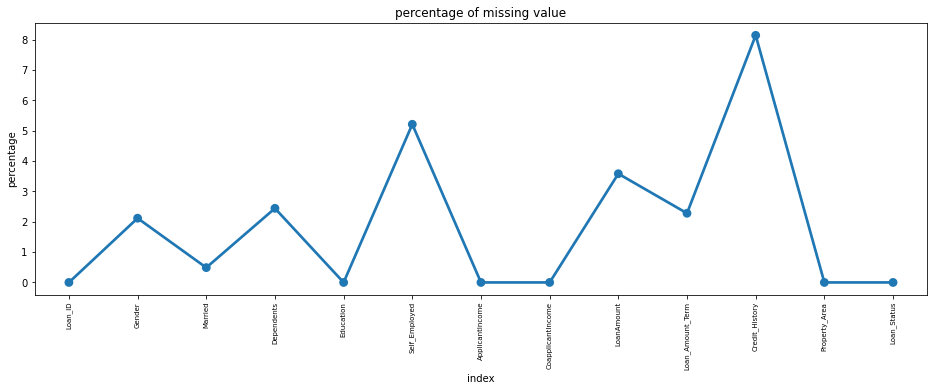

In [139]:
missing1 = pd.DataFrame((df_train1.isnull().sum())*100/df_train1.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data = missing1)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("percentage of missing value")
plt.ylabel("percentage")
plt.show()

In [140]:
# df_train1_na = df_train1.isnull().sum()
# df_train1_na = pd.DataFrame(df_train1_na.reset_index())
# df_train1_na.columns = ['variable','na_sum']
# df_train1_na.head()

In [141]:
df_train1_na[df_train1_na.na_percentage!=0].head()

variable  na_percentage
1         Gender       0.021173
2        Married       0.004886
3     Dependents       0.024430
5  Self_Employed       0.052117
8     LoanAmount       0.035831

In [142]:
print("total number of column :" ,df_train1_na.shape[0])
print("column with na :" ,df_train1_na[df_train1_na.na_percentage!=0].shape[0])

total number of column : 13
column with na : 7


In [143]:
# df_train1_na.index = df_train1_na['variable']
# df_train1_na[df_train1_na.na_percentage!=0].sort_values(by = 'na_percentage',ascending = 'False').plot.bar()

In [144]:
df_train1.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [145]:
df_train1.min()

Loan_ID              LP001002
Education            Graduate
ApplicantIncome           150
CoapplicantIncome           0
LoanAmount                  9
Loan_Amount_Term           12
Credit_History              0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [146]:
df_train1.sum()

Loan_ID              LP001002LP001003LP001005LP001006LP001008LP0010...
Education            GraduateGraduateGraduateNot GraduateGraduateGr...
ApplicantIncome                                                3317724
CoapplicantIncome                                               995445
LoanAmount                                                       86676
Loan_Amount_Term                                                205200
Credit_History                                                     475
Property_Area        UrbanRuralUrbanUrbanUrbanUrbanUrbanSemiurbanUr...
Loan_Status          YNYYYYYNYNYYYNYYYNNYNYNNNYYYNYNNNYNYNYYYNYYYYY...
dtype: object

In [147]:
mean = df_train1.mean()

In [148]:
mean

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [149]:
median = df_train1.median()

In [150]:
median

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [151]:
df_train1.mode()

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002   Male     Yes          0  Graduate            No   
1    LP001003    NaN     NaN        NaN       NaN           NaN   
2    LP001005    NaN     NaN        NaN       NaN           NaN   
3    LP001006    NaN     NaN        NaN       NaN           NaN   
4    LP001008    NaN     NaN        NaN       NaN           NaN   
..        ...    ...     ...        ...       ...           ...   
609  LP002978    NaN     NaN        NaN       NaN           NaN   
610  LP002979    NaN     NaN        NaN       NaN           NaN   
611  LP002983    NaN     NaN        NaN       NaN           NaN   
612  LP002984    NaN     NaN        NaN       NaN           NaN   
613  LP002990    NaN     NaN        NaN       NaN           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2500.0                0.0       120.0             360.0   
1                NaN                NaN         NaN               NaN   
2                NaN                NaN         NaN               NaN   
3                NaN                NaN         NaN               NaN   
4                NaN                NaN         NaN               NaN   
..               ...                ...         ...               ...   
609              NaN                NaN         NaN               NaN   
610              NaN                NaN         NaN               NaN   
611              NaN                NaN         NaN               NaN   
612              NaN                NaN         NaN               NaN   
613              NaN                NaN         NaN               NaN   

     Credit_History Property_Area Loan_Status  
0               1.0     Semiurban           Y  
1               NaN           NaN         NaN  
2               NaN           NaN         NaN  
3               NaN           NaN         NaN  
4               NaN           NaN         NaN  
..              ...           ...         ...  
609             NaN           NaN         NaN  
610             NaN           NaN         NaN  
611             NaN           NaN         NaN  
612             NaN           NaN         NaN  
613             NaN           NaN         NaN  

[614 rows x 13 columns]

In [152]:
var = df_train1.var()

In [153]:
var

ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.325190e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.331362e-01
dtype: float64

In [154]:
std = df_train1.std()

In [155]:
std

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [156]:
skew = df_train1.skew()

In [157]:
skew

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [158]:
kurt = df_train.kurt()

In [159]:
kurt

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [160]:
df_train1.quantile([0.25,0.75])

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0.25           2877.5               0.00       100.0             360.0   
0.75           5795.0            2297.25       168.0             360.0   

      Credit_History  
0.25             1.0  
0.75             1.0

In [161]:
df_train1['Education'].max()

'Not Graduate'

In [162]:
df_train1['Education'].min()

'Graduate'

In [163]:
df_train1['Property_Area'].max()

'Urban'

In [164]:
df_train1['Property_Area'].min()

'Rural'

In [165]:
range = (df_train1['ApplicantIncome'].max()-df_train1['ApplicantIncome'].min())

In [166]:
range

80850

In [167]:
range = (df_train1['CoapplicantIncome'].max()-df_train1['CoapplicantIncome'].min())
range

41667.0

In [168]:
range = (df_train1['LoanAmount'].max()-df_train1['LoanAmount'].min())
range

691.0

In [169]:
range = (df_train1['Loan_Amount_Term'].max()-df_train1['Loan_Amount_Term'].min())
range

468.0

In [170]:
range = (df_train1['Credit_History'].max()-df_train1['Credit_History'].min())
range

1.0

In [171]:
statistics.mode(df_train1['Gender'])

'Male'

In [172]:
statistics.mode(df_train1['Married'])

'Yes'

In [173]:
statistics.mode(df_train1['Dependents'])

'0'

In [174]:
statistics.mode(df_train1['Education'])

'Graduate'

In [175]:
statistics.mode(df_train1['Self_Employed'])

'No'

In [176]:
statistics.mode(df_train1['ApplicantIncome'])

2500

In [177]:
statistics.mode(df_train1['CoapplicantIncome'])

0.0

In [178]:
statistics.mode(df_train1['LoanAmount'])

120.0

In [179]:
statistics.mode(df_train1['Loan_Amount_Term'])

360.0

In [180]:
statistics.mode(df_train1['Credit_History'])

1.0

In [181]:
statistics.mode(df_train1['Property_Area'])

'Semiurban'

In [182]:
statistics.mode(df_train1['Loan_Status'])

'Y'

In [183]:
missing= df_train1[df_train1.isnull().any(axis=1)]
missing.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
11  LP001027   Male     Yes          2      Graduate           NaN   
16  LP001034   Male      No          1  Not Graduate            No   
19  LP001041   Male     Yes          0      Graduate           NaN   
23  LP001050    NaN     Yes          2  Not Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0         NaN             360.0   
11             2500             1840.0       109.0             360.0   
16             3596                0.0       100.0             240.0   
19             2600             3500.0       115.0               NaN   
23             3365             1917.0       112.0             360.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
11             1.0         Urban           Y  
16             NaN         Urban           Y  
19             1.0         Urban           Y  
23             0.0         Rural           N

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

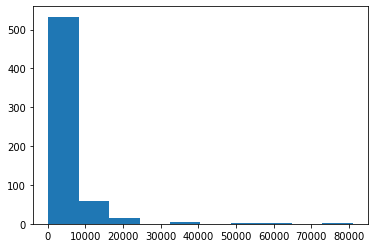

In [184]:
plt.hist(df_train1.ApplicantIncome)

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

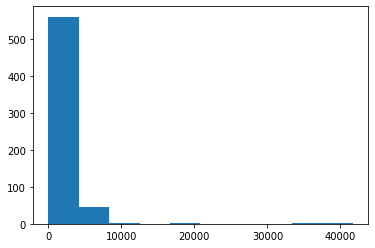

In [185]:
plt.hist(df_train1.CoapplicantIncome)

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

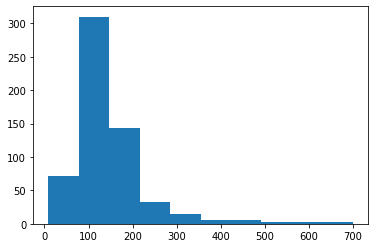

In [186]:
plt.hist(df_train1.LoanAmount)

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

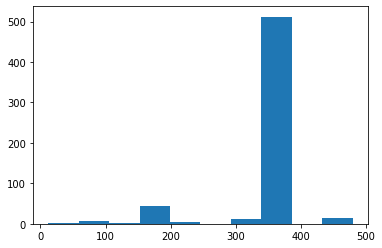

In [187]:
plt.hist(df_train1.Loan_Amount_Term)

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

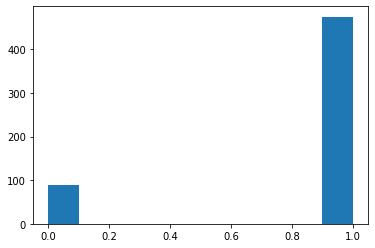

In [188]:
plt.hist(df_train1.Credit_History)

<AxesSubplot:xlabel='ApplicantIncome'>

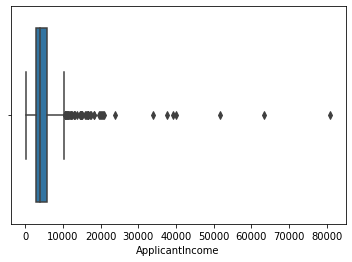

In [189]:
sns.boxplot(df_train1.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

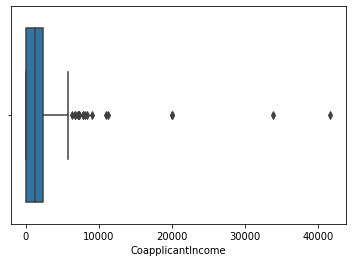

In [190]:
sns.boxplot(df_train1.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount'>

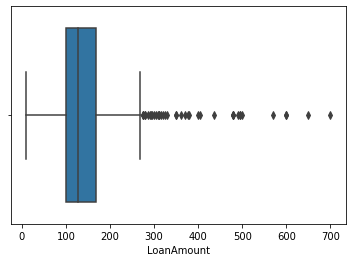

In [191]:
sns.boxplot(df_train1.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term'>

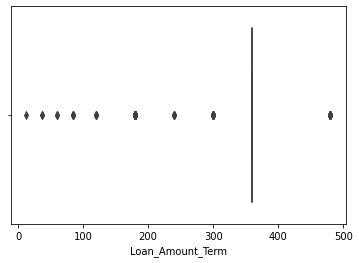

In [192]:
sns.boxplot(df_train1.Loan_Amount_Term)

<AxesSubplot:xlabel='Credit_History'>

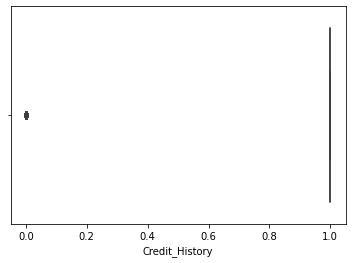

In [193]:
sns.boxplot(df_train1.Credit_History)

<AxesSubplot:>

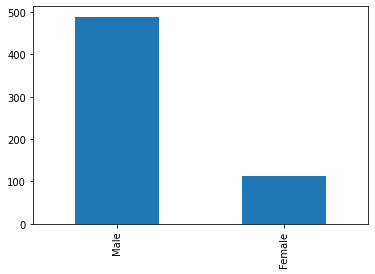

In [194]:
df_train1['Gender'].value_counts().plot.bar()

<AxesSubplot:>

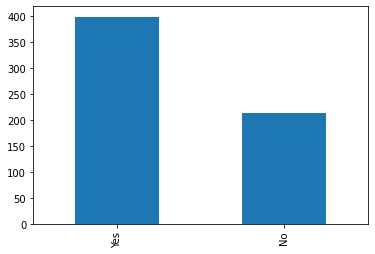

In [195]:
df_train1['Married'].value_counts().plot.bar()

<AxesSubplot:>

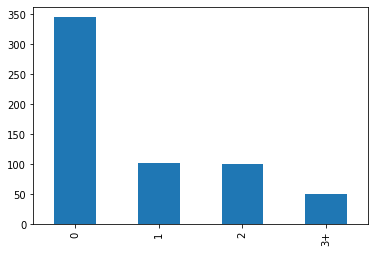

In [196]:
df_train1['Dependents'].value_counts().plot.bar()

<AxesSubplot:>

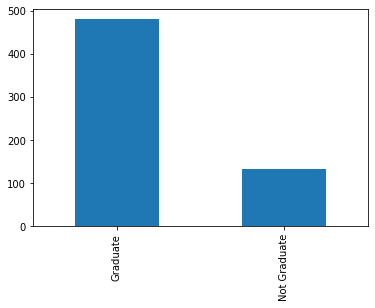

In [197]:
df_train1['Education'].value_counts().plot.bar()

<AxesSubplot:>

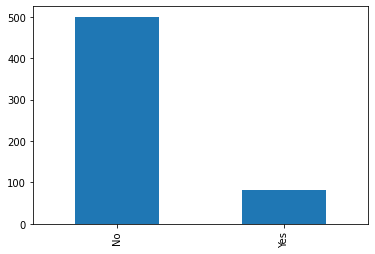

In [198]:
df_train1['Self_Employed'].value_counts().plot.bar()

<AxesSubplot:>

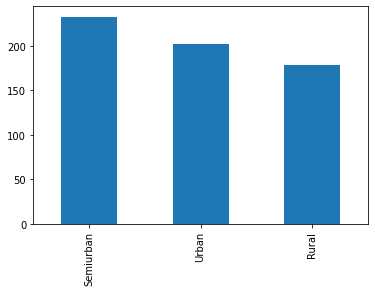

In [199]:
df_train1['Property_Area'].value_counts().plot.bar()

<AxesSubplot:>

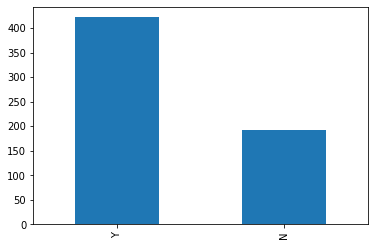

In [200]:
df_train1['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

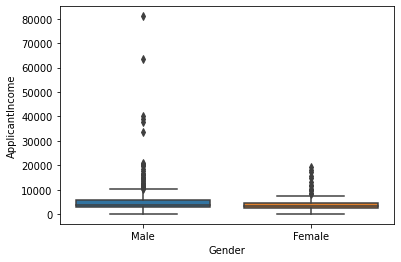

In [201]:
sns.boxplot(x = 'Gender', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

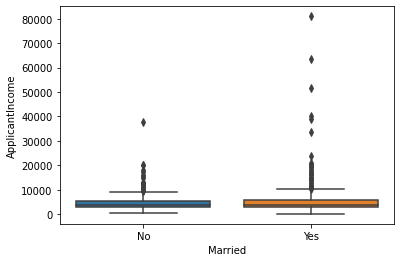

In [202]:
sns.boxplot(x = 'Married', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

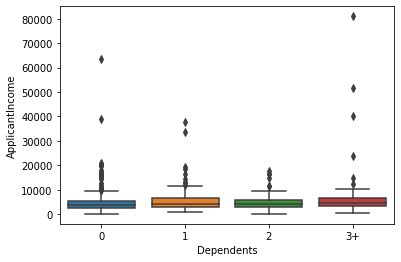

In [203]:
sns.boxplot(x = 'Dependents', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

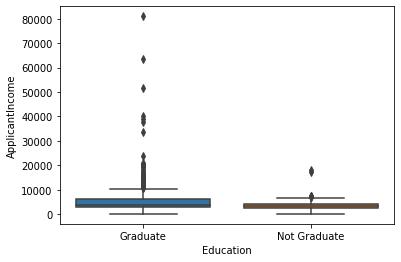

In [204]:
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

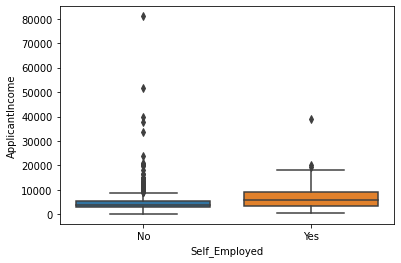

In [205]:
sns.boxplot(x = 'Self_Employed', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

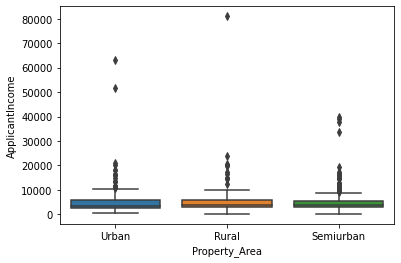

In [206]:
sns.boxplot(x = 'Property_Area', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

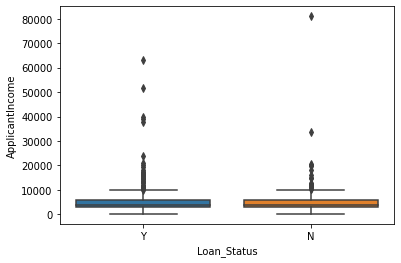

In [207]:
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

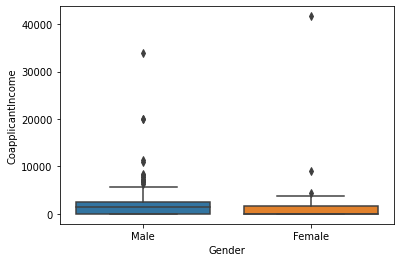

In [208]:
sns.boxplot(x = 'Gender', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

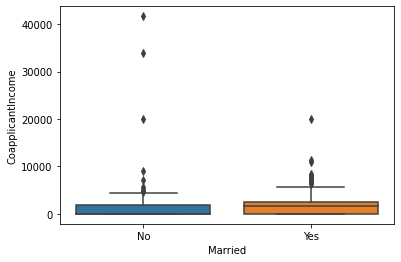

In [209]:
sns.boxplot(x = 'Married', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Dependents', ylabel='CoapplicantIncome'>

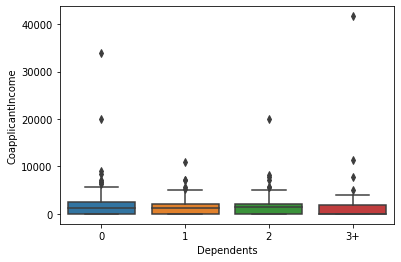

In [210]:
sns.boxplot(x = 'Dependents', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

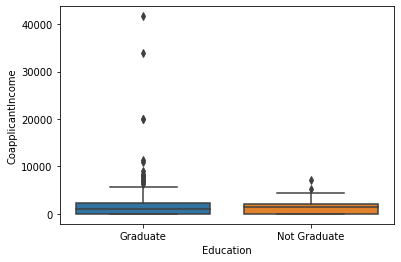

In [211]:
sns.boxplot(x = 'Education', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Self_Employed', ylabel='CoapplicantIncome'>

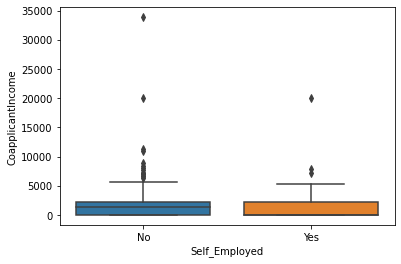

In [212]:
sns.boxplot(x = 'Self_Employed', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Property_Area', ylabel='CoapplicantIncome'>

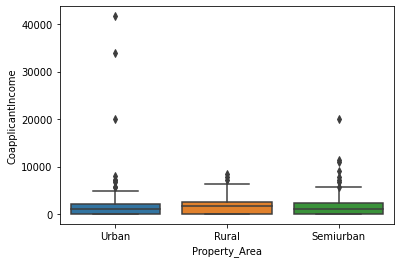

In [213]:
sns.boxplot(x = 'Property_Area', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

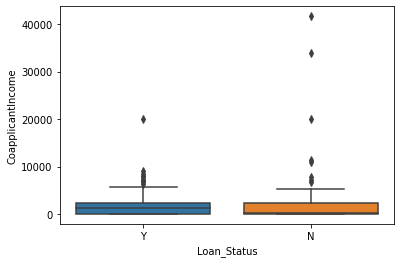

In [214]:
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = df_train1)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

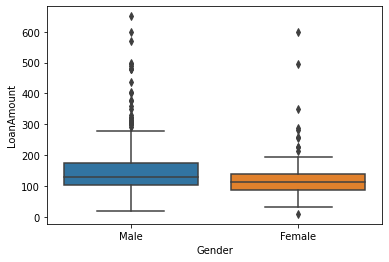

In [215]:
sns.boxplot(x = 'Gender', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

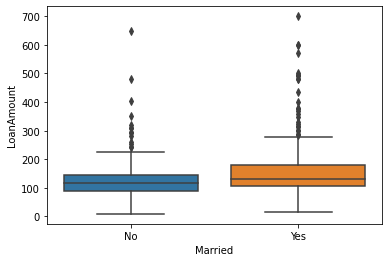

In [216]:
sns.boxplot(x = 'Married', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

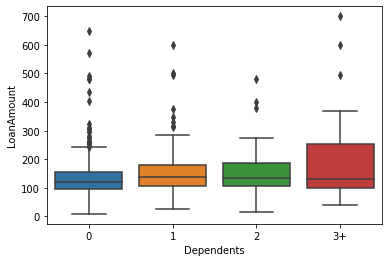

In [217]:
sns.boxplot(x = 'Dependents', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

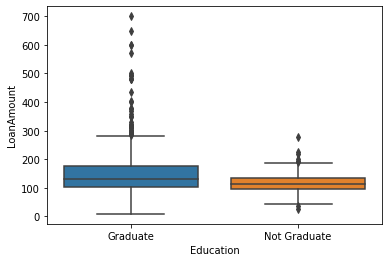

In [218]:
sns.boxplot(x = 'Education', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

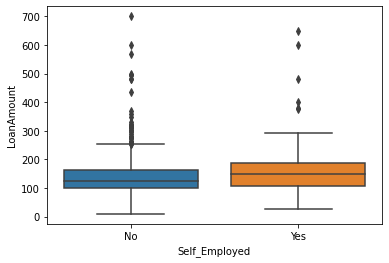

In [219]:
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

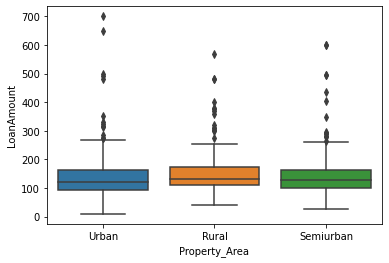

In [220]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

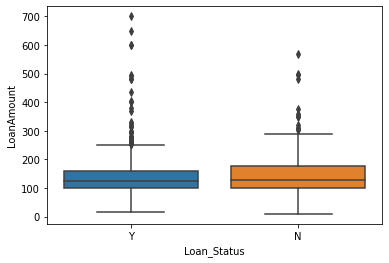

In [221]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = df_train1)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

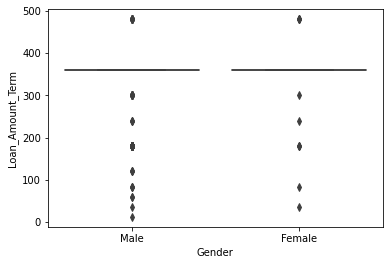

In [222]:
sns.boxplot(x = 'Gender', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

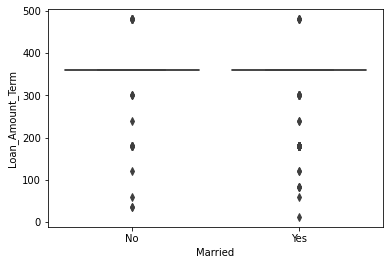

In [223]:
sns.boxplot(x = 'Married', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

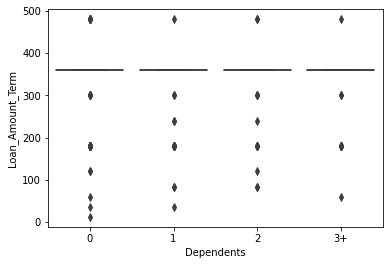

In [224]:
sns.boxplot(x = 'Dependents', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

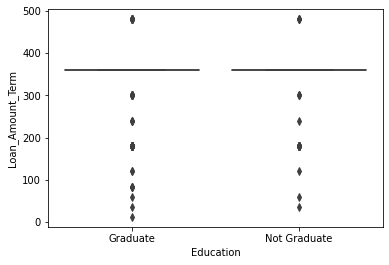

In [225]:
sns.boxplot(x = 'Education', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

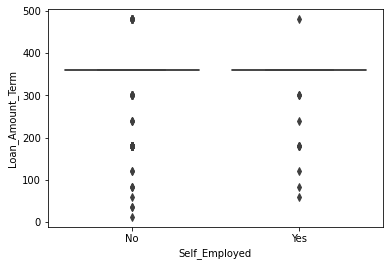

In [226]:
sns.boxplot(x = 'Self_Employed', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

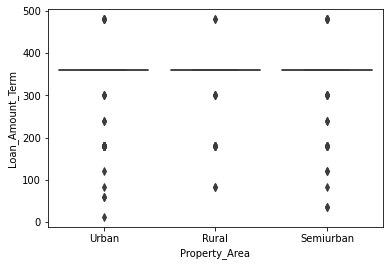

In [227]:
sns.boxplot(x = 'Property_Area', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

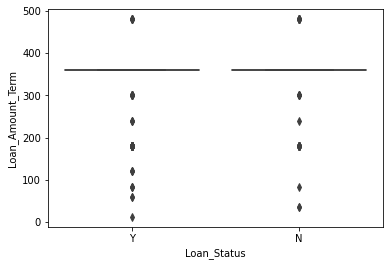

In [228]:
sns.boxplot(x = 'Loan_Status', y = 'Loan_Amount_Term', data = df_train1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

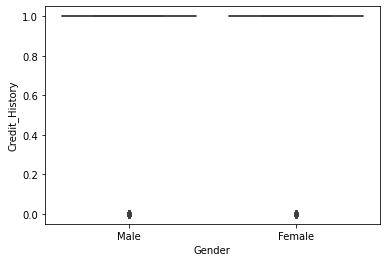

In [229]:
sns.boxplot(x = 'Gender', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

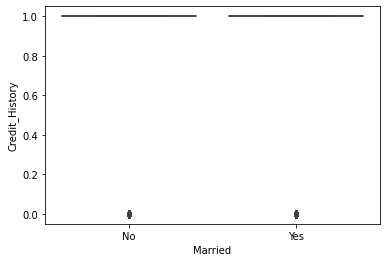

In [230]:
sns.boxplot(x = 'Married', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

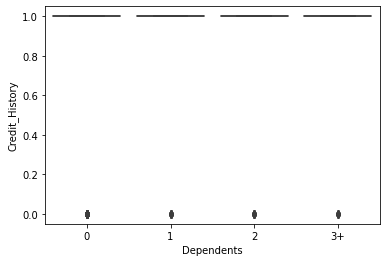

In [231]:
sns.boxplot(x = 'Dependents', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

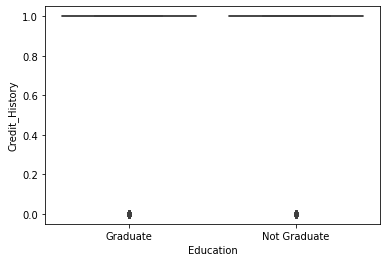

In [232]:
sns.boxplot(x = 'Education', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

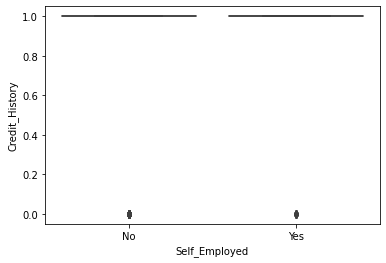

In [233]:
sns.boxplot(x = 'Self_Employed', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

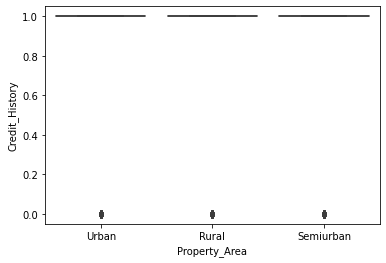

In [234]:
sns.boxplot(x = 'Property_Area', y = 'Credit_History', data = df_train1)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

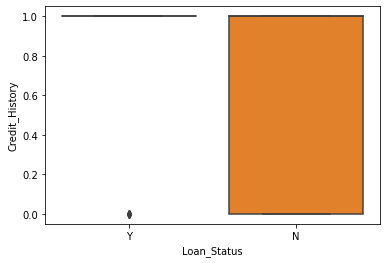

In [235]:
sns.boxplot(x = 'Loan_Status', y = 'Credit_History', data = df_train1)

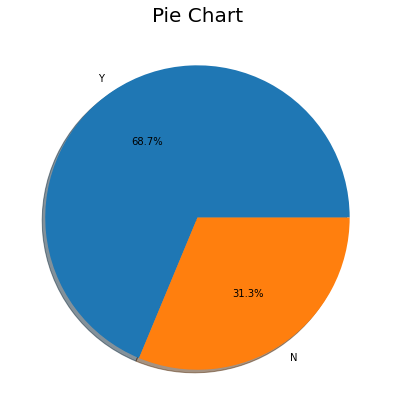

In [236]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Loan_Status'].value_counts().values,
        labels=df_train1['Loan_Status'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

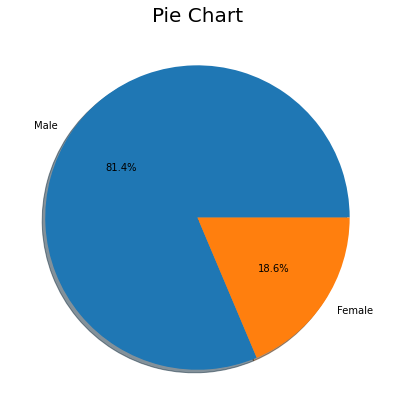

In [237]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Gender'].value_counts().values,
        labels=df_train1['Gender'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

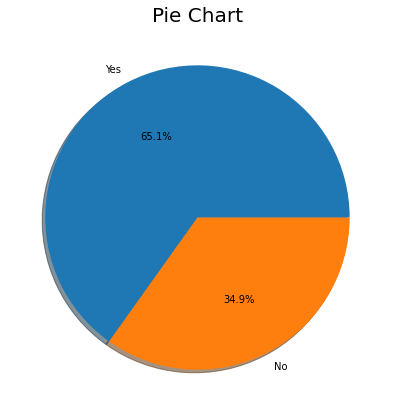

In [238]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Married'].value_counts().values,
        labels=df_train1['Married'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

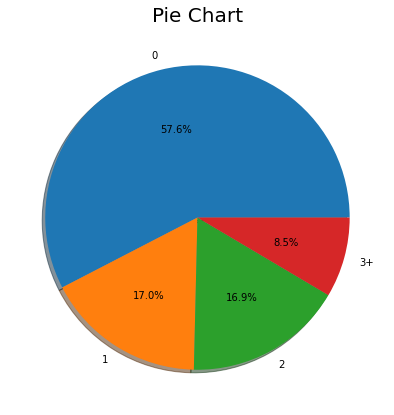

In [239]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Dependents'].value_counts().values,
        labels=df_train1['Dependents'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

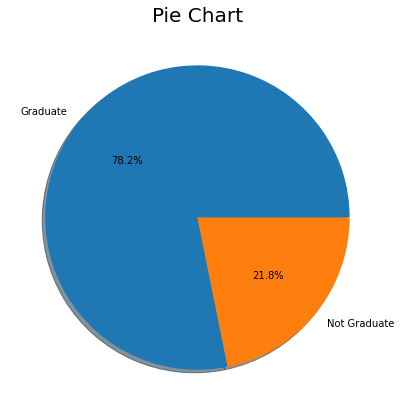

In [240]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Education'].value_counts().values,
        labels=df_train1['Education'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

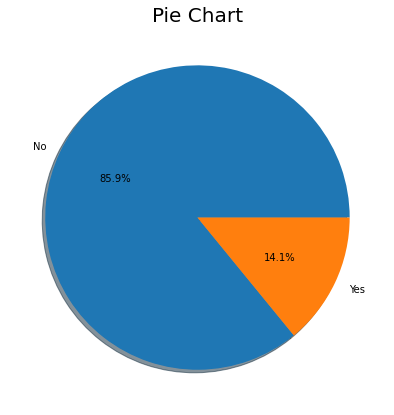

In [241]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Self_Employed'].value_counts().values,
        labels=df_train1['Self_Employed'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

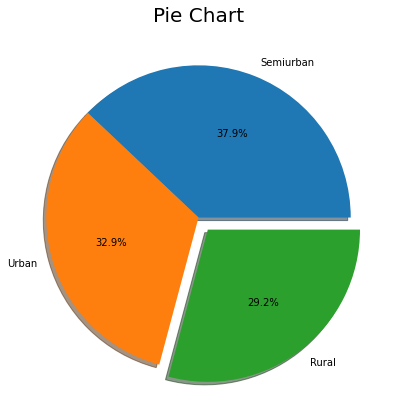

In [242]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Property_Area'].value_counts().values,
        labels=df_train1['Property_Area'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.1])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

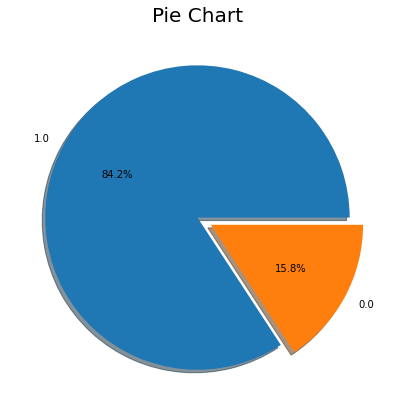

In [243]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Credit_History'].value_counts().values,
        labels=df_train1['Credit_History'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0.1])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

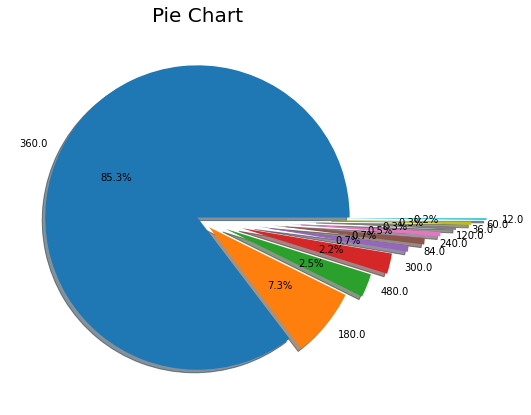

In [244]:
plt.figure(figsize=(7,7))
plt.pie(df_train1['Loan_Amount_Term'].value_counts().values,
        labels=df_train1['Loan_Amount_Term'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

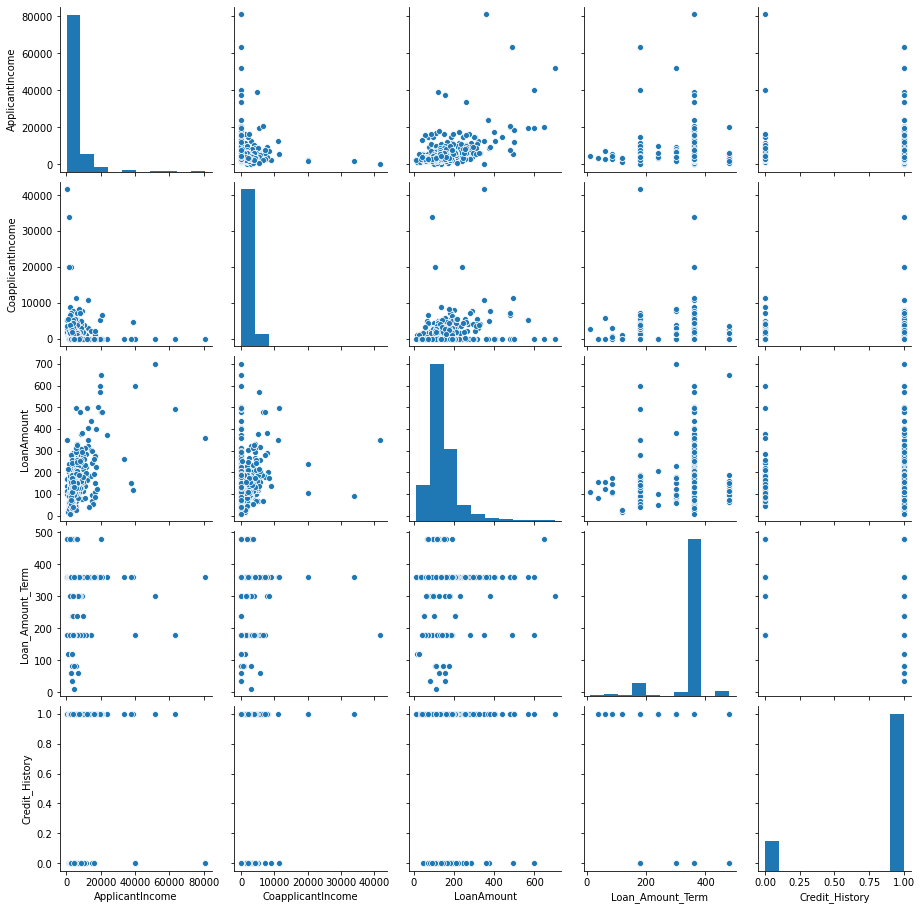

In [245]:
sns.pairplot(df_train1)

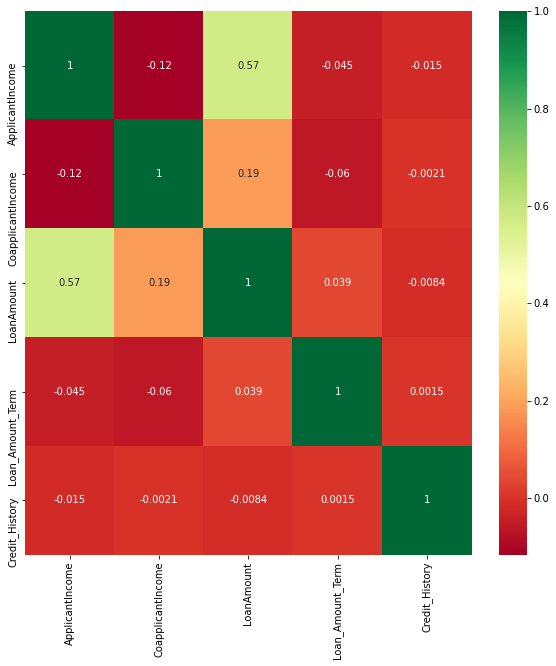

In [246]:
corrmat = df_train1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_train1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Test DataSet Details

In [247]:
df_test1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [248]:
df_test1.shape

(367, 12)

In [249]:
df_test1.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.110335    0.493451   
CoapplicantIncome        -0.110335           1.000000    0.150850   
LoanAmount                0.493451           0.150850    1.000000   
Loan_Amount_Term          0.023249          -0.010984    0.094950   
Credit_History            0.099553          -0.071235   -0.012578   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.023249        0.099553  
CoapplicantIncome         -0.010984       -0.071235  
LoanAmount                 0.094950       -0.012578  
Loan_Amount_Term           1.000000       -0.053593  
Credit_History            -0.053593        1.000000

In [250]:
df_test1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [251]:
len(df_test1)

367

In [252]:
len(df_test1['Gender'].unique())

3

In [253]:
len(df_test1['Married'].unique())

2

In [254]:
len(df_test1['Dependents'].unique())

5

In [255]:
len(df_test1['Education'].unique())

2

In [256]:
len(df_test1['Self_Employed'].unique())

3

In [257]:
len(df_test1['ApplicantIncome'].unique())

314

In [258]:
len(df_test1['CoapplicantIncome'].unique())

194

In [259]:
len(df_test1['LoanAmount'].unique())

145

In [260]:
len(df_test1['Loan_Amount_Term'].unique())

13

In [261]:
len(df_test1['Credit_History'].unique())

3

In [262]:
len(df_test1['Property_Area'].unique())

3

In [263]:
for col in df_test1.columns[1:]:
    print(col, ': ',len(df_test1[col].unique()),'labels')

Gender :  3 labels
Married :  2 labels
Dependents :  5 labels
Education :  2 labels
Self_Employed :  3 labels
ApplicantIncome :  314 labels
CoapplicantIncome :  194 labels
LoanAmount :  145 labels
Loan_Amount_Term :  13 labels
Credit_History :  3 labels
Property_Area :  3 labels


In [264]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [265]:
df_test1.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [266]:
df_test1.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [267]:
df_test1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [268]:
df_test1.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [269]:
df_test1.isnull().mean()

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [270]:
df_test1['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [271]:
df_test1['Gender'].nunique()

2

In [272]:
df_test1['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [273]:
df_test1['Married'].nunique()

2

In [274]:
df_test1['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [275]:
df_test1['Dependents'].nunique()

4

In [276]:
df_test1['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [277]:
df_test1['Education'].nunique()

2

In [278]:
df_test1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [279]:
df_test1['Self_Employed'].nunique()

2

In [280]:
df_test1['ApplicantIncome'].unique()

array([ 5720,  3076,  5000,  2340,  3276,  2165,  2226,  3881, 13633,
        2400,  3091,  2185,  4166, 12173,  4666,  5667,  4583,  3786,
        9226,  1300,  1888,  2083,  3909,  3765,  5400,     0,  4363,
        7500,  3772,  2942,  2478,  6250,  3268,  2783,  2740,  3150,
        7350,  2267,  5833,  3643,  5629,  3644,  1750,  6500,  3666,
        4260,  4163,  2356,  6792,  8000,  2419,  3500,  4116,  5293,
        2750,  4402,  3613,  2779,  4720,  2415,  7016,  4968,  2101,
        4490,  2917,  4700,  3445,  7666,  2458,  3250,  4463,  4083,
        3900,  4750,  3583,  3189,  6356,  3413,  7950,  3829, 72529,
        4136,  8449,  4456,  4635,  3571,  3066,  3235,  5058,  3188,
       13518,  4364,  4766,  4609,  6260,  3333,  9719,  6835,  4452,
        2262,  3901,  2687,  2243,  3417,  1596,  4513,  4500,  4523,
        4742,  4082,  2922,  4167,  4243,  1516,  1762,   724,  3125,
        2333,  3350,  2500, 12500,  4667,  3073,  3321,  3391,  3343,
        3620,  4000,

In [281]:
df_test1['ApplicantIncome'].nunique()

314

In [282]:
df_test1['CoapplicantIncome'].unique()

array([    0,  1500,  1800,  2546,  3422,  2400,  1516,  2916,   333,
        7916,  3470,  1620,  4380, 24000,  1250,  3750,   833,  2382,
         820,  1683,  2708,  1541,  4029,  2792,  1963,   818,  2024,
        2600,  3900,  1475,  1902,  3338,   250,  1707,  3077,  1000,
        3539,  3664,  1721,   292,  3583,  5105,  1775,  2094,  3435,
        2367,  4053,  1103,  8000,  1917,  2015,  2286,  2500,  1646,
        2333,  4200,  3250,  2233,  1287,  1760,  1350,  3396,  4754,
        4123,  2900,  2666,  3510,  3803,  1560,  6414,  2088,  1270,
        1517,  2925,  2999,   528,   717,  4309,  1456,  2360,  2474,
        4246,  2291,  2529,  4256,  2370,  2017,  3167,  2935,  2845,
        1820,  4614,  3333,  2632,  2945,  3917,   750,  1184,  3967,
        2912,  1998,  2690,  1600,   700,  1442,   542,  1300,  2374,
        1152,  2417,  1083,  4027,  3719,  2130,  2458,  2183,  3148,
        2139,  2166,  2168,  1768,  3809,  2755, 14507,  2988,  1594,
        1788,  2774,

In [283]:
df_test1['CoapplicantIncome'].nunique()

194

In [284]:
df_test1['LoanAmount'].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50.,  nan,
       163., 360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119.,
       165.,  93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,
        70., 132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,
        72., 214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235.,
       336.,  96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,
        66.,  64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99.,
       240., 460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,
        67., 181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,
        76.,  98.])

In [285]:
df_test1['LoanAmount'].nunique()

144

In [286]:
df_test1['Loan_Amount_Term'].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [287]:
df_test1['Loan_Amount_Term'].nunique()

12

In [288]:
df_test1['Credit_History'].unique()

array([ 1., nan,  0.])

In [289]:
df_test1['Credit_History'].nunique()

2

In [290]:
df_test1['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [291]:
df_test1['Property_Area'].nunique()

3

In [292]:
df_test1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [293]:
100*df_test1['Gender'].value_counts()/len(df_test1['Gender'])

Male      77.929155
Female    19.073569
Name: Gender, dtype: float64

In [294]:
100*df_test1['Married'].value_counts()/len(df_test1['Married'])

Yes    63.487738
No     36.512262
Name: Married, dtype: float64

In [295]:
100*df_test1['Dependents'].value_counts()/len(df_test1['Dependents'])

0     54.495913
2     16.076294
1     15.803815
3+    10.899183
Name: Dependents, dtype: float64

In [296]:
100*df_test1['Education'].value_counts()/len(df_test1['Education'])

Graduate        77.111717
Not Graduate    22.888283
Name: Education, dtype: float64

In [297]:
100*df_test1['Self_Employed'].value_counts()/len(df_test1['Self_Employed'])

No     83.651226
Yes    10.081744
Name: Self_Employed, dtype: float64

In [298]:
100*df_test1['Property_Area'].value_counts()/len(df_test1['Property_Area'])

Urban        38.147139
Semiurban    31.607629
Rural        30.245232
Name: Property_Area, dtype: float64

In [299]:
100*df_test1['Credit_History'].value_counts()/len(df_test1['Credit_History'])

1.0    76.021798
0.0    16.076294
Name: Credit_History, dtype: float64

In [300]:
df_test1.tail()

Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Semiurban  
365             1.0         Rural  
366             1.0         Rural

In [301]:
df_test1.to_numpy()

array([['LP001015', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP001022', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ['LP001031', 'Male', 'Yes', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['LP002980', 'Male', 'No', ..., 360.0, nan, 'Semiurban'],
       ['LP002986', 'Male', 'Yes', ..., 360.0, 1.0, 'Rural'],
       ['LP002989', 'Male', 'No', ..., 180.0, 1.0, 'Rural']], dtype=object)

In [302]:
df_test1.sort_index(axis = 1,ascending = True).head()

ApplicantIncome  CoapplicantIncome  Credit_History Dependents  \
0             5720                  0             1.0          0   
1             3076               1500             1.0          1   
2             5000               1800             1.0          2   
3             2340               2546             NaN          2   
4             3276                  0             1.0          0   

      Education Gender  LoanAmount  Loan_Amount_Term   Loan_ID Married  \
0      Graduate   Male       110.0             360.0  LP001015     Yes   
1      Graduate   Male       126.0             360.0  LP001022     Yes   
2      Graduate   Male       208.0             360.0  LP001031     Yes   
3      Graduate   Male       100.0             360.0  LP001035     Yes   
4  Not Graduate   Male        78.0             360.0  LP001051      No   

  Property_Area Self_Employed  
0         Urban            No  
1         Urban            No  
2         Urban            No  
3         Urban            No  
4         Urban            No

In [303]:
pd.melt(df_test1).tail()

variable      value
4399  Property_Area      Urban
4400  Property_Area      Urban
4401  Property_Area  Semiurban
4402  Property_Area      Rural
4403  Property_Area      Rural

In [304]:
df_test1.sort_values('Gender').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
315  LP002766  Female     Yes          0      Graduate            No   
295  LP002612  Female     Yes          0      Graduate            No   
298  LP002635  Female     Yes          2  Not Graduate            No   
79   LP001419  Female     Yes          0      Graduate            No   
145  LP001797  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
315             7859                879       165.0             180.0   
295             2666                  0        84.0             480.0   
298             3729                  0       117.0             360.0   
79              7950                  0       185.0             360.0   
145            12941                  0       150.0             300.0   

     Credit_History Property_Area  
315             1.0     Semiurban  
295             1.0     Semiurban  
298             1.0     Semiurban  
79              1.0         Urban  
145             1.0         Urban

In [305]:
df_test1.sort_values('Married').head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
366  LP002989   Male      No          0      Graduate           Yes   
126  LP001662   Male      No          0      Graduate            No   
128  LP001667   Male      No          0      Graduate            No   
283  LP002568   Male      No          0  Not Graduate            No   
131  LP001718   Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
366             9200                  0        98.0             180.0   
126             6500                  0        71.0             360.0   
128             3073                  0        70.0             180.0   
283             9000                  0       122.0             360.0   
131             3391                  0       132.0             360.0   

     Credit_History Property_Area  
366             1.0         Rural  
126             0.0         Urban  
128             1.0         Urban  
283             1.0         Rural  
131             1.0         Rural

In [306]:
df_test1.sort_values('Dependents').head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
0    LP001015    Male     Yes          0  Graduate            No   
199  LP002102    Male     Yes          0  Graduate           Yes   
200  LP002105    Male     Yes          0  Graduate           Yes   
203  LP002117  Female     Yes          0  Graduate            No   
204  LP002118  Female      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
199             1900               1442        88.0             360.0   
200             8706                  0       108.0             480.0   
203             3159               2374       108.0             360.0   
204             1937               1152        78.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
199             1.0         Rural  
200             1.0         Rural  
203             1.0     Semiurban  
204             1.0     Semiurban

In [307]:
df_test1.sort_values('Education').head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
0    LP001015    Male     Yes          0  Graduate            No   
234  LP002311  Female     Yes          0  Graduate            No   
233  LP002310  Female      No          1  Graduate            No   
232  LP002306    Male     Yes          0  Graduate            No   
231  LP002298     NaN      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
234             2157               1788       104.0             360.0   
233             7600                  0        92.0             360.0   
232             1173               1594        28.0             180.0   
231             2860               2988       138.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
234             1.0         Urban  
233             1.0     Semiurban  
232             1.0         Rural  
231             1.0         Urban

In [308]:
df_test1.sort_values('Self_Employed').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
238  LP002326    Male     Yes          2  Not Graduate            No   
237  LP002325    Male     Yes          2  Not Graduate            No   
236  LP002321  Female      No          0      Graduate            No   
235  LP002316    Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
238             2513               1110       107.0             360.0   
237             6166              13983       102.0             360.0   
236             2274               5211       117.0             360.0   
235             2231               2774       176.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
238             1.0     Semiurban  
237             1.0         Rural  
236             0.0     Semiurban  
235             0.0         Urban

In [309]:
df_test1.sort_values('ApplicantIncome').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
116  LP001607  Female      No          0  Not Graduate            No   
25   LP001153    Male      No          0      Graduate            No   
303  LP002657     NaN     Yes          1  Not Graduate           Yes   
119  LP001622    Male     Yes          2      Graduate            No   
166  LP001933    Male      No          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
116                0               1760       180.0             360.0   
25                 0              24000       148.0             360.0   
303              570               2125        68.0             360.0   
119              724               3510       213.0             360.0   
166             1141               2017       120.0             360.0   

     Credit_History Property_Area  
116             1.0     Semiurban  
25              0.0         Rural  
303             1.0         Rural  
119             0.0         Rural  
166             0.0         Urban

In [310]:
df_test1.sort_values('CoapplicantIncome').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
170  LP001961  Female      No          0      Graduate            No   
171  LP001973    Male     Yes          2  Not Graduate            No   
172  LP001975    Male     Yes          0      Graduate            No   
177  LP002009  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
170             3958                  0       110.0             360.0   
171             4483                  0       130.0             360.0   
172             5225                  0       143.0             360.0   
177             2918                  0        65.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
170             1.0         Rural  
171             1.0         Rural  
172             1.0         Rural  
177             NaN         Rural

In [311]:
df_test1.sort_values('LoanAmount').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
21   LP001124  Female      No         3+  Not Graduate            No   
232  LP002306    Male     Yes          0      Graduate            No   
53   LP001298    Male     Yes          2      Graduate            No   
334  LP002849    Male     Yes          0      Graduate            No   
323  LP002791    Male      No          1      Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
21              2083                  0        28.0             180.0   
232             1173               1594        28.0             180.0   
53              4116               1000        30.0             180.0   
334             1516               1951        35.0             360.0   
323            16000               5000        40.0             360.0   

     Credit_History Property_Area  
21              1.0         Urban  
232             1.0         Rural  
53              1.0         Urban  
334             1.0     Semiurban  
323             1.0     Semiurban

In [312]:
df_test1.sort_values('Loan_Amount_Term').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
325  LP002802    Male      No          0      Graduate            No   
144  LP001794    Male     Yes          2      Graduate           Yes   
216  LP002186    Male     Yes          0  Not Graduate            No   
72   LP001375    Male     Yes          1      Graduate           NaN   
190  LP002062  Female     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
325             2875               2416        95.0               6.0   
144            10890                  0       260.0              12.0   
216             2747               2458       118.0              36.0   
72              4083               1775       139.0              60.0   
190             4333                  0       132.0              84.0   

     Credit_History Property_Area  
325             0.0     Semiurban  
144             1.0         Rural  
216             1.0     Semiurban  
72              1.0         Urban  
190             1.0         Rural

In [313]:
df_test1.sort_values('Credit_History').head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
278  LP002551   Male     Yes         3+  Not Graduate           NaN   
301  LP002651   Male     Yes          1      Graduate           NaN   
243  LP002346   Male     Yes          0      Graduate           NaN   
69   LP001361   Male     Yes          0      Graduate            No   
147  LP001817   Male      No          0  Not Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
278             3634                910       176.0             360.0   
301             6300                  0       125.0             360.0   
243             2539               1704       125.0             360.0   
69              2458               5105       188.0             360.0   
147             8703                  0       199.0             360.0   

     Credit_History Property_Area  
278             0.0     Semiurban  
301             0.0         Urban  
243             0.0         Rural  
69              0.0         Rural  
147             0.0         Rural

In [314]:
df_test1.sort_values('Property_Area').head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
183  LP002042  Female     Yes          1      Graduate            No   
174  LP001995    Male     Yes          0  Not Graduate            No   
175  LP001999    Male     Yes          2      Graduate           NaN   
177  LP002009  Female      No          0      Graduate            No   
178  LP002016    Male     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
183             4000               3917       173.0             360.0   
174             2431               1820       110.0             360.0   
175             4912               4614       160.0             360.0   
177             2918                  0        65.0             360.0   
178             5128                  0       143.0             360.0   

     Credit_History Property_Area  
183             1.0         Rural  
174             0.0         Rural  
175             1.0         Rural  
177             NaN         Rural  
178             1.0         Rural

In [315]:
df_test1.sort_values('Gender',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
221  LP002240   Male     Yes          0  Not Graduate            No   
232  LP002306   Male     Yes          0      Graduate            No   
230  LP002294   Male      No          0      Graduate            No   
229  LP002286   Male     Yes         3+  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
221             3500               2168       149.0             360.0   
232             1173               1594        28.0             180.0   
230            14911              14507       130.0             360.0   
229             5180                  0       125.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
221             1.0         Rural  
232             1.0         Rural  
230             1.0     Semiurban  
229             0.0         Urban

In [316]:
df_test1.sort_values('Married',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
144  LP001794   Male     Yes          2      Graduate           Yes   
222  LP002245   Male     Yes          2  Not Graduate            No   
221  LP002240   Male     Yes          0  Not Graduate            No   
220  LP002212   Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
144            10890                  0       260.0              12.0   
222             2896                  0        80.0             480.0   
221             3500               2168       149.0             360.0   
220             2166               2166       108.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
144             1.0         Rural  
222             1.0         Urban  
221             1.0         Rural  
220             NaN         Urban

In [317]:
df_test1.sort_values('Dependents',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
81   LP001428   Male     Yes         3+      Graduate            No   
260  LP002417   Male     Yes         3+  Not Graduate            No   
355  LP002932   Male     Yes         3+      Graduate            No   
354  LP002921   Male     Yes         3+  Not Graduate            No   
328  LP002806   Male     Yes         3+      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
81             72529                  0       360.0             360.0   
260             2792               2619       171.0             360.0   
355             7603               1213       197.0             360.0   
354             5316                187       158.0             180.0   
328             6958               1411       150.0             360.0   

     Credit_History Property_Area  
81              1.0         Urban  
260             1.0     Semiurban  
355             1.0         Urban  
354             0.0     Semiurban  
328             1.0         Rural

In [318]:
df_test1.sort_values('Education',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
103  LP001548   Male     Yes          2  Not Graduate            No   
49   LP001270   Male     Yes         3+  Not Graduate           Yes   
307  LP002735   Male     Yes          2  Not Graduate            No   
159  LP001881   Male     Yes          0  Not Graduate            No   
240  LP002333   Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
103             2687                  0        50.0             180.0   
49              8000                250       187.0             360.0   
307             3859                  0       121.0             360.0   
159             7895                  0       143.0             360.0   
240             3844                  0       105.0             360.0   

     Credit_History Property_Area  
103             1.0         Rural  
49              1.0     Semiurban  
307             1.0         Rural  
159             1.0         Rural  
240             1.0         Urban

In [319]:
df_test1.sort_values('Self_Employed',ascending=False).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
366  LP002989   Male      No          0  Graduate           Yes   
340  LP002860   Male     Yes          0  Graduate           Yes   
37   LP001210   Male     Yes          0  Graduate           Yes   
38   LP001211   Male      No          0  Graduate           Yes   
218  LP002195   Male     Yes          1  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
366             9200                  0        98.0             180.0   
340             2623               4831       122.0             180.0   
37              2267               2792        90.0             360.0   
38              5833                  0       116.0             360.0   
218             3507               3148       212.0             360.0   

     Credit_History Property_Area  
366             1.0         Rural  
340             1.0     Semiurban  
37              1.0         Urban  
38              1.0         Urban  
218             1.0         Rural

In [320]:
df_test1.sort_values('ApplicantIncome',ascending=False).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
81   LP001428   Male     Yes         3+  Graduate            No   
143  LP001791   Male     Yes          0  Graduate           Yes   
279  LP002553    NaN      No          0  Graduate            No   
272  LP002485   Male      No          1  Graduate            No   
263  LP002433   Male     Yes          1  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
81             72529                  0       360.0             360.0   
143            32000                  0       550.0             360.0   
279            29167                  0       185.0             360.0   
272            24797                  0       240.0             360.0   
263            18840                  0       234.0             360.0   

     Credit_History Property_Area  
81              1.0         Urban  
143             NaN     Semiurban  
279             1.0     Semiurban  
272             1.0     Semiurban  
263             1.0         Rural

In [321]:
df_test1.sort_values('CoapplicantIncome',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
25   LP001153    Male      No          0      Graduate            No   
351  LP002901    Male      No          0      Graduate            No   
230  LP002294    Male      No          0      Graduate            No   
237  LP002325    Male     Yes          2  Not Graduate            No   
284  LP002570  Female     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
25                 0              24000       148.0             360.0   
351             2283              15000       106.0             360.0   
230            14911              14507       130.0             360.0   
237             6166              13983       102.0             360.0   
284            10000              11666       460.0             360.0   

     Credit_History Property_Area  
25              0.0         Rural  
351             NaN         Rural  
230             1.0     Semiurban  
237             1.0         Rural  
284             1.0         Urban

In [322]:
df_test1.sort_values('LoanAmount',ascending=False).head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
143  LP001791    Male     Yes          0  Graduate           Yes   
284  LP002570  Female     Yes          2  Graduate            No   
194  LP002077    Male     Yes          1  Graduate            No   
91   LP001483    Male     Yes         3+  Graduate            No   
81   LP001428    Male     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
143            32000                  0       550.0             360.0   
284            10000              11666       460.0             360.0   
194            10000               2690       412.0             360.0   
91             13518                  0       390.0             360.0   
81             72529                  0       360.0             360.0   

     Credit_History Property_Area  
143             NaN     Semiurban  
284             1.0         Urban  
194             1.0     Semiurban  
91              1.0         Rural  
81              1.0         Urban

In [323]:
df_test1.sort_values('Loan_Amount_Term',ascending=False).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
200  LP002105    Male     Yes          0      Graduate           Yes   
295  LP002612  Female     Yes          0      Graduate            No   
222  LP002245    Male     Yes          2  Not Graduate            No   
266  LP002442  Female     Yes          1  Not Graduate            No   
250  LP002383    Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
200             8706                  0       108.0             480.0   
295             2666                  0        84.0             480.0   
222             2896                  0        80.0             480.0   
266             3835               1400       112.0             480.0   
250             3242                437       142.0             480.0   

     Credit_History Property_Area  
200             1.0         Rural  
295             1.0     Semiurban  
222             1.0         Urban  
266             0.0         Urban  
250             0.0         Urban

In [324]:
df_test1.sort_values('Credit_History',ascending=False).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
230  LP002294   Male      No          0      Graduate            No   
239  LP002329   Male      No          0      Graduate            No   
238  LP002326   Male     Yes          2  Not Graduate            No   
237  LP002325   Male     Yes          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
230            14911              14507       130.0             360.0   
239             4333                  0        66.0             480.0   
238             2513               1110       107.0             360.0   
237             6166              13983       102.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
230             1.0     Semiurban  
239             1.0         Urban  
238             1.0     Semiurban  
237             1.0         Rural

In [325]:
df_test1.sort_values('Property_Area',ascending=False).head()

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001015   Male     Yes          0  Graduate            No   
184  LP002045   Male     Yes         3+  Graduate            No   
337  LP002856   Male     Yes          0  Graduate            No   
149  LP001822   Male      No          0  Graduate            No   
150  LP001827   Male      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
184            10166                750       150.0               NaN   
337             2292               1558       119.0             360.0   
149             5900                  0       150.0             360.0   
150             3071               4309       180.0             360.0   

     Credit_History Property_Area  
0               1.0         Urban  
184             1.0         Urban  
337             1.0         Urban  
149             1.0         Urban  
150             1.0         Urban

In [326]:
df_test1.reset_index().head()

index   Loan_ID Gender Married Dependents     Education Self_Employed  \
0      0  LP001015   Male     Yes          0      Graduate            No   
1      1  LP001022   Male     Yes          1      Graduate            No   
2      2  LP001031   Male     Yes          2      Graduate            No   
3      3  LP001035   Male     Yes          2      Graduate            No   
4      4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [327]:
df_test1.drop_duplicates().head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [328]:
df_test1.sample(frac=0.5).head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
147  LP001817   Male      No          0  Not Graduate           Yes   
269  LP002471   Male      No          0      Graduate            No   
300  LP002644   Male     Yes          1      Graduate           Yes   
197  LP002096   Male     Yes          0  Not Graduate            No   
131  LP001718   Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
147             8703                  0       199.0             360.0   
269             3508                  0        99.0             360.0   
300             7500                  0        75.0             360.0   
197             2000               1600       115.0             360.0   
131             3391                  0       132.0             360.0   

     Credit_History Property_Area  
147             0.0         Rural  
269             1.0         Rural  
300             1.0         Urban  
197             1.0         Rural  
131             1.0         Rural

In [329]:
df_test1.sample(n=10).head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
16   LP001105    Male     Yes          2      Graduate            No   
119  LP001622    Male     Yes          2      Graduate            No   
260  LP002417    Male     Yes         3+  Not Graduate            No   
225  LP002257  Female      No          0      Graduate            No   
336  LP002853  Female      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
16              4583               2916       200.0             360.0   
119              724               3510       213.0             360.0   
260             2792               2619       171.0             360.0   
225             2545                  0        74.0             360.0   
336             3015               2000       145.0             360.0   

     Credit_History Property_Area  
16              1.0         Urban  
119             0.0         Rural  
260             1.0     Semiurban  
225             1.0         Urban  
336             NaN         Urban

In [330]:
df_test1.nlargest(5, 'ApplicantIncome')

Loan_ID Gender Married Dependents Education Self_Employed  \
81   LP001428   Male     Yes         3+  Graduate            No   
143  LP001791   Male     Yes          0  Graduate           Yes   
279  LP002553    NaN      No          0  Graduate            No   
272  LP002485   Male      No          1  Graduate            No   
263  LP002433   Male     Yes          1  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
81             72529                  0       360.0             360.0   
143            32000                  0       550.0             360.0   
279            29167                  0       185.0             360.0   
272            24797                  0       240.0             360.0   
263            18840                  0       234.0             360.0   

     Credit_History Property_Area  
81              1.0         Urban  
143             NaN     Semiurban  
279             1.0     Semiurban  
272             1.0     Semiurban  
263             1.0         Rural

In [331]:
df_test1.nlargest(5, 'CoapplicantIncome')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
25   LP001153    Male      No          0      Graduate            No   
351  LP002901    Male      No          0      Graduate            No   
230  LP002294    Male      No          0      Graduate            No   
237  LP002325    Male     Yes          2  Not Graduate            No   
284  LP002570  Female     Yes          2      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
25                 0              24000       148.0             360.0   
351             2283              15000       106.0             360.0   
230            14911              14507       130.0             360.0   
237             6166              13983       102.0             360.0   
284            10000              11666       460.0             360.0   

     Credit_History Property_Area  
25              0.0         Rural  
351             NaN         Rural  
230             1.0     Semiurban  
237             1.0         Rural  
284             1.0         Urban

In [332]:
df_test1.nlargest(5, 'LoanAmount')

Loan_ID  Gender Married Dependents Education Self_Employed  \
143  LP001791    Male     Yes          0  Graduate           Yes   
284  LP002570  Female     Yes          2  Graduate            No   
194  LP002077    Male     Yes          1  Graduate            No   
91   LP001483    Male     Yes         3+  Graduate            No   
81   LP001428    Male     Yes         3+  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
143            32000                  0       550.0             360.0   
284            10000              11666       460.0             360.0   
194            10000               2690       412.0             360.0   
91             13518                  0       390.0             360.0   
81             72529                  0       360.0             360.0   

     Credit_History Property_Area  
143             NaN     Semiurban  
284             1.0         Urban  
194             1.0     Semiurban  
91              1.0         Rural  
81              1.0         Urban

In [333]:
df_test1.nlargest(5, 'Loan_Amount_Term')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
82   LP001445    Male     Yes          2  Not Graduate            No   
101  LP001542  Female     Yes          0      Graduate            No   
200  LP002105    Male     Yes          0      Graduate           Yes   
222  LP002245    Male     Yes          2  Not Graduate            No   
239  LP002329    Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
82              4136                  0       149.0             480.0   
101             2262                  0         NaN             480.0   
200             8706                  0       108.0             480.0   
222             2896                  0        80.0             480.0   
239             4333                  0        66.0             480.0   

     Credit_History Property_Area  
82              0.0         Rural  
101             0.0     Semiurban  
200             1.0         Rural  
222             1.0         Urban  
239             1.0         Urban

In [334]:
df_test1.nlargest(5, 'Credit_History')

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   
5  LP001054   Male     Yes          0  Not Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
4             3276                  0        78.0             360.0   
5             2165               3422       152.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
4             1.0         Urban  
5             1.0         Urban

In [335]:
df_test1.nsmallest(5, 'ApplicantIncome')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
25   LP001153    Male      No          0      Graduate            No   
116  LP001607  Female      No          0  Not Graduate            No   
303  LP002657     NaN     Yes          1  Not Graduate           Yes   
119  LP001622    Male     Yes          2      Graduate            No   
166  LP001933    Male      No          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
25                 0              24000       148.0             360.0   
116                0               1760       180.0             360.0   
303              570               2125        68.0             360.0   
119              724               3510       213.0             360.0   
166             1141               2017       120.0             360.0   

     Credit_History Property_Area  
25              0.0         Rural  
116             1.0     Semiurban  
303             1.0         Rural  
119             0.0         Rural  
166             0.0         Urban

In [336]:
df_test1.nsmallest(5, 'CoapplicantIncome')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP001015    Male     Yes          0      Graduate            No   
4  LP001051    Male      No          0  Not Graduate            No   
6  LP001055  Female      No          1  Not Graduate            No   
7  LP001056    Male     Yes          2  Not Graduate            No   
8  LP001059    Male     Yes          2      Graduate           NaN   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
4             3276                  0        78.0             360.0   
6             2226                  0        59.0             360.0   
7             3881                  0       147.0             360.0   
8            13633                  0       280.0             240.0   

   Credit_History Property_Area  
0             1.0         Urban  
4             1.0         Urban  
6             1.0     Semiurban  
7             0.0         Rural  
8             1.0         Urban

In [337]:
df_test1.nsmallest(5, 'LoanAmount')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
21   LP001124  Female      No         3+  Not Graduate            No   
232  LP002306    Male     Yes          0      Graduate            No   
53   LP001298    Male     Yes          2      Graduate            No   
334  LP002849    Male     Yes          0      Graduate            No   
12   LP001083    Male      No         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
21              2083                  0        28.0             180.0   
232             1173               1594        28.0             180.0   
53              4116               1000        30.0             180.0   
334             1516               1951        35.0             360.0   
12              4166                  0        40.0             180.0   

     Credit_History Property_Area  
21              1.0         Urban  
232             1.0         Rural  
53              1.0         Urban  
334             1.0     Semiurban  
12              NaN         Urban

In [338]:
df_test1.nsmallest(5, 'Loan_Amount_Term')

Loan_ID Gender Married Dependents     Education Self_Employed  \
325  LP002802   Male      No          0      Graduate            No   
144  LP001794   Male     Yes          2      Graduate           Yes   
216  LP002186   Male     Yes          0  Not Graduate            No   
72   LP001375   Male     Yes          1      Graduate           NaN   
134  LP001737   Male      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
325             2875               2416        95.0               6.0   
144            10890                  0       260.0              12.0   
216             2747               2458       118.0              36.0   
72              4083               1775       139.0              60.0   
134             4000                  0        83.0              84.0   

     Credit_History Property_Area  
325             0.0     Semiurban  
144             1.0         Rural  
216             1.0     Semiurban  
72              1.0         Urban  
134             1.0         Urban

In [339]:
df_test1.nsmallest(5, 'Credit_History')

Loan_ID Gender Married Dependents     Education Self_Employed  \
7   LP001056   Male     Yes          2  Not Graduate            No   
13  LP001094   Male     Yes          2      Graduate           NaN   
25  LP001153   Male      No          0      Graduate            No   
35  LP001203   Male      No          0      Graduate            No   
55  LP001313   Male      No          0      Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
7              3881                  0       147.0             360.0   
13            12173                  0       166.0             360.0   
25                0              24000       148.0             360.0   
35             3150                  0       176.0             360.0   
55             2750                  0       130.0             360.0   

    Credit_History Property_Area  
7              0.0         Rural  
13             0.0     Semiurban  
25             0.0         Rural  
35             0.0     Semiurban  
55             0.0         Urban

In [340]:
df_test1['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [341]:
df_test1['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [342]:
df_test1['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [343]:
df_test1['Education'].value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [344]:
df_test1['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [345]:
df_test1['ApplicantIncome'].value_counts()

3500     6
5000     6
3333     5
7500     4
4333     4
        ..
2366     1
2083     1
13633    1
3909     1
2875     1
Name: ApplicantIncome, Length: 314, dtype: int64

In [346]:
df_test1['CoapplicantIncome'].value_counts()

0       156
2000      3
700       3
2600      2
1083      2
       ... 
3900      1
2360      1
820       1
1966      1
4347      1
Name: CoapplicantIncome, Length: 194, dtype: int64

In [347]:
df_test1['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

In [348]:
df_test1['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [349]:
df_test1['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [350]:
df_test1['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [351]:
df_test1[df_test1.Gender.isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
22   LP001128    NaN      No          0      Graduate            No   
51   LP001287    NaN     Yes         3+  Not Graduate            No   
106  LP001563    NaN      No          0      Graduate            No   
138  LP001769    NaN      No        NaN      Graduate            No   
209  LP002165    NaN      No          1  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
22              3909                  0       101.0             360.0   
51              3500                833       120.0             360.0   
106             1596               1760       119.0             360.0   
138             3333               1250       110.0             360.0   
209             2038               4027       100.0             360.0   

     Credit_History Property_Area  
22              1.0         Urban  
51              1.0     Semiurban  
106             0.0         Urban  
138             1.0     Semiurban  
209             1.0         Rural

In [352]:
df_test1[df_test1.Married.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []

In [353]:
df_test1[df_test1.Dependents.isnull()].head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
46   LP001237    Male     Yes        NaN  Not Graduate            No   
70   LP001366  Female      No        NaN      Graduate            No   
111  LP001587    Male     Yes        NaN      Graduate            No   
138  LP001769     NaN      No        NaN      Graduate            No   
202  LP002111    Male     Yes        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
46              4163               1475       162.0             360.0   
70              3250                  0        95.0             360.0   
111             4082                  0        93.0             360.0   
138             3333               1250       110.0             360.0   
202             3016               1300       100.0             360.0   

     Credit_History Property_Area  
46              1.0         Urban  
70              1.0     Semiurban  
111             1.0     Semiurban  
138             1.0     Semiurban  
202             NaN         Urban

In [354]:
df_test1[df_test1.Education.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []

In [355]:
df_test1[df_test1.Self_Employed.isnull()].head()

Loan_ID Gender Married Dependents Education Self_Employed  \
8   LP001059   Male     Yes          2  Graduate           NaN   
11  LP001082   Male     Yes          1  Graduate           NaN   
13  LP001094   Male     Yes          2  Graduate           NaN   
36  LP001208   Male     Yes          2  Graduate           NaN   
72  LP001375   Male     Yes          1  Graduate           NaN   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
8             13633                  0       280.0             240.0   
11             2185               1516       162.0             360.0   
13            12173                  0       166.0             360.0   
36             7350               4029       185.0             180.0   
72             4083               1775       139.0              60.0   

    Credit_History Property_Area  
8              1.0         Urban  
11             1.0     Semiurban  
13             0.0     Semiurban  
36             1.0         Urban  
72             1.0         Urban

In [356]:
df_test1[df_test1.ApplicantIncome.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []

In [357]:
df_test1[df_test1.CoapplicantIncome.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []

In [358]:
df_test1[df_test1.LoanAmount.isnull()].head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
78   LP001415    Male     Yes          1      Graduate            No   
101  LP001542  Female     Yes          0      Graduate            No   
188  LP002057    Male     Yes          0  Not Graduate            No   
247  LP002360    Male     Yes        NaN      Graduate            No   
289  LP002593    Male     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
78              3413               4053         NaN             360.0   
101             2262                  0         NaN             480.0   
188            13083                  0         NaN             360.0   
247            10000                  0         NaN             360.0   
289             8333               4000         NaN             360.0   

     Credit_History Property_Area  
78              1.0     Semiurban  
101             0.0     Semiurban  
188             1.0         Rural  
247             1.0         Urban  
289             1.0         Urban

In [359]:
df_test1[df_test1.Loan_Amount_Term.isnull()].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
45   LP001232   Male     Yes          0      Graduate            No   
48   LP001268   Male      No          0      Graduate            No   
117  LP001611   Male     Yes          1      Graduate            No   
129  LP001695   Male     Yes          1  Not Graduate            No   
184  LP002045   Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
45              4260               3900       185.0               NaN   
48              6792               3338       187.0               NaN   
117             1516               2900        80.0               NaN   
129             3321               2088        70.0               NaN   
184            10166                750       150.0               NaN   

     Credit_History Property_Area  
45              NaN         Urban  
48              1.0         Urban  
117             0.0         Rural  
129             1.0     Semiurban  
184             1.0         Urban

In [360]:
df_test1[df_test1.Credit_History.isnull()].head()

Loan_ID Gender Married Dependents Education Self_Employed  \
3   LP001035   Male     Yes          2  Graduate            No   
12  LP001083   Male      No         3+  Graduate            No   
26  LP001163   Male     Yes          2  Graduate            No   
28  LP001174   Male     Yes          0  Graduate            No   
45  LP001232   Male     Yes          0  Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
3              2340               2546       100.0             360.0   
12             4166                  0        40.0             180.0   
26             4363               1250       140.0             360.0   
28             3772                833        57.0             360.0   
45             4260               3900       185.0               NaN   

    Credit_History Property_Area  
3              NaN         Urban  
12             NaN         Urban  
26             NaN         Urban  
28             NaN     Semiurban  
45             NaN         Urban

In [361]:
df_test1[df_test1.Property_Area.isnull()].head()

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []

In [362]:
cont_mis_test = [var for var in df_test1.columns if df_test1[var].isnull().mean()>0 and df_test1[var].dtypes !='O']

In [363]:
cont_mis_test

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [364]:
categorical_missing_test = [var for var in df_test1.columns if df_test1[var].isnull().mean()>0 and df_test1[var].dtypes == 'O']

In [365]:
categorical_missing_test

['Gender', 'Dependents', 'Self_Employed']

In [366]:
df_test1_na = df_test1.isnull().mean()
df_test1_na = pd.DataFrame(df_test1_na.reset_index())
df_test1_na.columns = ['variable','na_percentage']
df_test1_na.head()

variable  na_percentage
0     Loan_ID       0.000000
1      Gender       0.029973
2     Married       0.000000
3  Dependents       0.027248
4   Education       0.000000

In [367]:
# df_test1_na = df_test1.isnull().sum()
# df_test1_na = pd.DataFrame(df_test1_na.reset_index())
# df_test1_na.columns = ['variable','na_sum']
# df_test1_na.head()

In [368]:
df_test1_na[df_test1_na.na_percentage!=0]

variable  na_percentage
1             Gender       0.029973
3         Dependents       0.027248
5      Self_Employed       0.062670
8         LoanAmount       0.013624
9   Loan_Amount_Term       0.016349
10    Credit_History       0.079019

In [369]:
print("total number of column :" ,df_test1_na.shape[0])
print("column with na :" ,df_test1_na[df_test1_na.na_percentage!=0].shape[0])

total number of column : 12
column with na : 6


In [370]:
# df_train1_na.index = df_train1_na['variable']
# df_train1_na[df_train1_na.na_percentage!=0].sort_values(by = 'na_percentage',ascending = 'False').plot.bar()

In [371]:
df_test1.max()

Loan_ID                  LP002989
Married                       Yes
Education            Not Graduate
ApplicantIncome             72529
CoapplicantIncome           24000
LoanAmount                    550
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
dtype: object

In [372]:
df_test1.min()

Loan_ID              LP001015
Married                    No
Education            Graduate
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 28
Loan_Amount_Term            6
Credit_History              0
Property_Area           Rural
dtype: object

In [373]:
df_test1.sum()

Loan_ID              LP001015LP001022LP001031LP001035LP001051LP0010...
Married              YesYesYesYesNoYesNoYesYesNoNoYesNoYesNoNoYesYe...
Education            GraduateGraduateGraduateGraduateNot GraduateNo...
ApplicantIncome                                                1763655
CoapplicantIncome                                               576035
LoanAmount                                                       49280
Loan_Amount_Term                                                123656
Credit_History                                                     279
Property_Area        UrbanUrbanUrbanUrbanUrbanUrbanSemiurbanRuralUr...
dtype: object

In [374]:
range_test = (df_test1['ApplicantIncome'].max()-df_test1['ApplicantIncome'].min())

In [375]:
range_test

72529

In [376]:
range_test = (df_test1['CoapplicantIncome'].max()-df_test1['CoapplicantIncome'].min())

In [377]:
range_test

24000

In [378]:
range_test = (df_test1['LoanAmount'].max()-df_test1['LoanAmount'].min())

In [379]:
range_test

522.0

In [380]:
range_test = (df_test1['Loan_Amount_Term'].max()-df_test1['Loan_Amount_Term'].min())

In [381]:
range_test

474.0

In [382]:
range_test = (df_test1['Credit_History'].max()-df_test1['Credit_History'].min())

In [383]:
range_test

1.0

In [384]:
df_test1.mean()

ApplicantIncome      4805.599455
CoapplicantIncome    1569.577657
LoanAmount            136.132597
Loan_Amount_Term      342.537396
Credit_History          0.825444
dtype: float64

In [385]:
df_test1.median()

ApplicantIncome      3786.0
CoapplicantIncome    1025.0
LoanAmount            125.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [386]:
df_test1.var()

ApplicantIncome      2.411483e+07
CoapplicantIncome    5.448639e+06
LoanAmount           3.765866e+03
Loan_Amount_Term     4.245388e+03
Credit_History       1.445139e-01
dtype: float64

In [387]:
df_test1.std()

ApplicantIncome      4910.685399
CoapplicantIncome    2334.232099
LoanAmount             61.366652
Loan_Amount_Term       65.156643
Credit_History          0.380150
dtype: float64

In [388]:
df_test1_std = df_test1.std()
df_test1_std = pd.DataFrame(df_test1_std.reset_index())
df_test1_std.columns = ['variable','std']
df_test1_std.head()

variable          std
0    ApplicantIncome  4910.685399
1  CoapplicantIncome  2334.232099
2         LoanAmount    61.366652
3   Loan_Amount_Term    65.156643
4     Credit_History     0.380150

In [389]:
df_test1_skew = df_test1.skew()
df_test1_skew = pd.DataFrame(df_test1_skew.reset_index())
df_test1_skew.columns = ['variable','skew']
df_test1_skew.head()

variable      skew
0    ApplicantIncome  8.441375
1  CoapplicantIncome  4.257357
2         LoanAmount  2.223512
3   Loan_Amount_Term -2.679318
4     Credit_History -1.722379

In [390]:
df_test1_kurt = df_test1.kurt()
df_test1_kurt = pd.DataFrame(df_test1_kurt.reset_index())
df_test1_kurt.columns = ['variable','kurt']
df_test1_kurt.head()

variable        kurt
0    ApplicantIncome  103.127490
1  CoapplicantIncome   30.191142
2         LoanAmount    9.407853
3   Loan_Amount_Term    8.654022
4     Credit_History    0.972306

In [391]:
df_test1.quantile([0.25,0.75])

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0.25           2864.0                0.0      100.25             360.0   
0.75           5060.0             2430.5      158.00             360.0   

      Credit_History  
0.25             1.0  
0.75             1.0

In [392]:
df_test1.mode()

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001015   Male     Yes          0  Graduate            No   
1    LP001022    NaN     NaN        NaN       NaN           NaN   
2    LP001031    NaN     NaN        NaN       NaN           NaN   
3    LP001035    NaN     NaN        NaN       NaN           NaN   
4    LP001051    NaN     NaN        NaN       NaN           NaN   
..        ...    ...     ...        ...       ...           ...   
362  LP002971    NaN     NaN        NaN       NaN           NaN   
363  LP002975    NaN     NaN        NaN       NaN           NaN   
364  LP002980    NaN     NaN        NaN       NaN           NaN   
365  LP002986    NaN     NaN        NaN       NaN           NaN   
366  LP002989    NaN     NaN        NaN       NaN           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3500.0                0.0       150.0             360.0   
1             5000.0                NaN         NaN               NaN   
2                NaN                NaN         NaN               NaN   
3                NaN                NaN         NaN               NaN   
4                NaN                NaN         NaN               NaN   
..               ...                ...         ...               ...   
362              NaN                NaN         NaN               NaN   
363              NaN                NaN         NaN               NaN   
364              NaN                NaN         NaN               NaN   
365              NaN                NaN         NaN               NaN   
366              NaN                NaN         NaN               NaN   

     Credit_History Property_Area  
0               1.0         Urban  
1               NaN           NaN  
2               NaN           NaN  
3               NaN           NaN  
4               NaN           NaN  
..              ...           ...  
362             NaN           NaN  
363             NaN           NaN  
364             NaN           NaN  
365             NaN           NaN  
366             NaN           NaN  

[367 rows x 12 columns]

In [393]:
statistics.mode(df_test1['Gender'])

'Male'

In [394]:
statistics.mode(df_test1['Married'])

'Yes'

In [395]:
statistics.mode(df_test1['Dependents'])

'0'

In [396]:
statistics.mode(df_test1['Education'])

'Graduate'

In [397]:
statistics.mode(df_test1['Self_Employed'])

'No'

In [398]:
statistics.mode(df_test1['ApplicantIncome'])

5000

In [399]:
statistics.mode(df_test1['CoapplicantIncome'])

0

In [400]:
statistics.mode(df_test1['LoanAmount'])

150.0

In [401]:
statistics.mode(df_test1['Loan_Amount_Term'])

360.0

In [402]:
statistics.mode(df_test1['Credit_History'])

1.0

In [403]:
statistics.mode(df_test1['Property_Area'])

'Urban'

In [404]:
df_test1['Income'] = df_test1['CoapplicantIncome']+df_test1['ApplicantIncome']

In [405]:
df_test1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  Income  
0             1.0         Urban    5720  
1             1.0         Urban    4576  
2             1.0         Urban    6800  
3             NaN         Urban    4886  
4             1.0         Urban    3276

In [406]:
df_test1 = df_test1.drop(['CoapplicantIncome','ApplicantIncome'],axis = 1)

In [407]:
df_test1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  LoanAmount  \
0  LP001015   Male     Yes          0      Graduate            No       110.0   
1  LP001022   Male     Yes          1      Graduate            No       126.0   
2  LP001031   Male     Yes          2      Graduate            No       208.0   
3  LP001035   Male     Yes          2      Graduate            No       100.0   
4  LP001051   Male      No          0  Not Graduate            No        78.0   

   Loan_Amount_Term  Credit_History Property_Area  Income  
0             360.0             1.0         Urban    5720  
1             360.0             1.0         Urban    4576  
2             360.0             1.0         Urban    6800  
3             360.0             NaN         Urban    4886  
4             360.0             1.0         Urban    3276

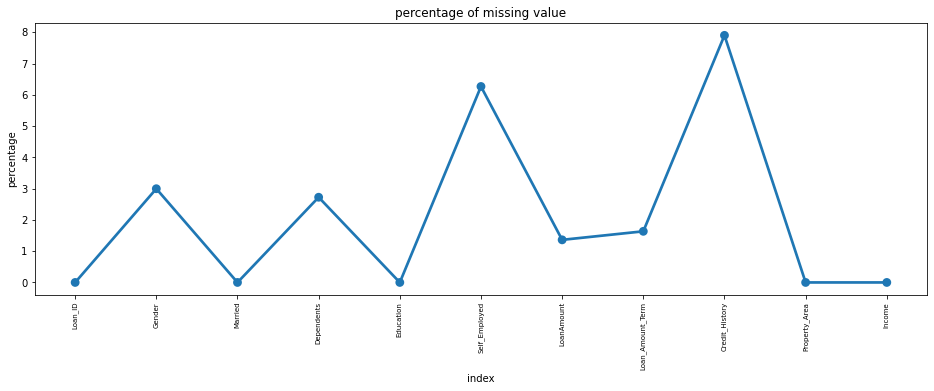

In [408]:
missing_test = pd.DataFrame((df_test1.isnull().sum())*100/df_test1.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data = missing_test)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("percentage of missing value")
plt.ylabel("percentage")
plt.show()

(array([ 46., 160., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

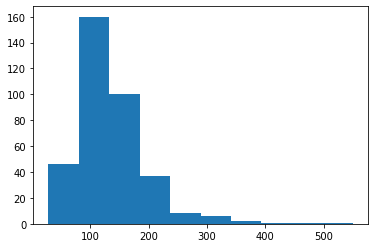

In [409]:
plt.hist(df_test1.LoanAmount)

(array([  3.,   4.,   1.,  22.,   4.,   0.,   7., 312.,   0.,   8.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <BarContainer object of 10 artists>)

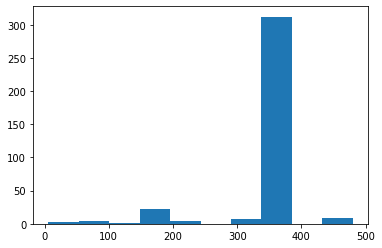

In [410]:
plt.hist(df_test1.Loan_Amount_Term)

(array([ 59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

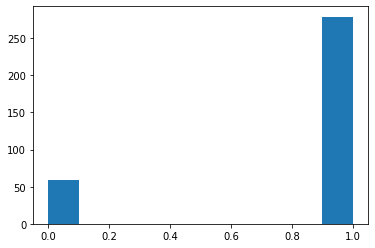

In [411]:
plt.hist(df_test1.Credit_History)

(array([324.,  31.,   6.,   4.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1760. ,  8836.9, 15913.8, 22990.7, 30067.6, 37144.5, 44221.4,
        51298.3, 58375.2, 65452.1, 72529. ]),
 <BarContainer object of 10 artists>)

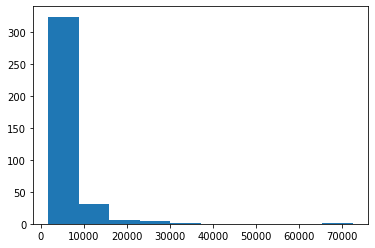

In [412]:
plt.hist(df_test1.Income)

<AxesSubplot:xlabel='LoanAmount'>

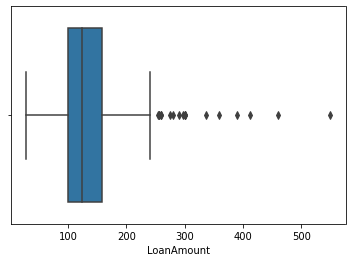

In [413]:
sns.boxplot(df_test1.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term'>

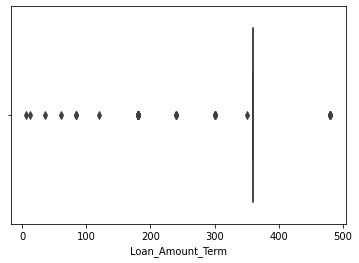

In [414]:
sns.boxplot(df_test1.Loan_Amount_Term)

<AxesSubplot:xlabel='Credit_History'>

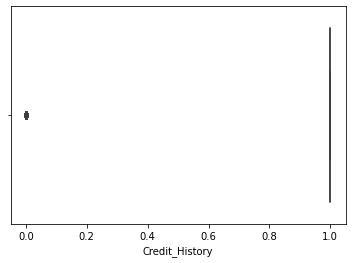

In [415]:
sns.boxplot(df_test1.Credit_History)

<AxesSubplot:xlabel='Income'>

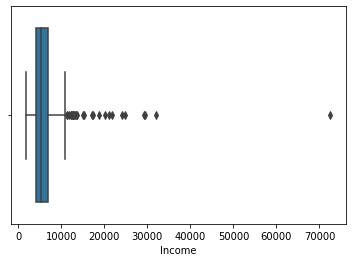

In [416]:
sns.boxplot(df_test1.Income)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

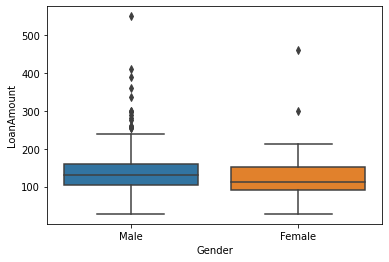

In [417]:
sns.boxplot(x = 'Gender', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

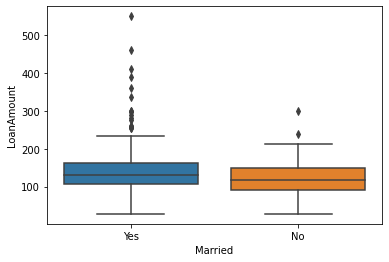

In [418]:
sns.boxplot(x = 'Married', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

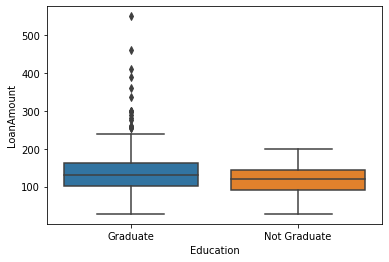

In [419]:
sns.boxplot(x = 'Education', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

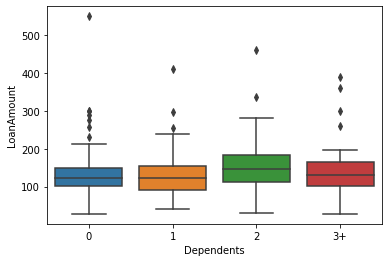

In [420]:
sns.boxplot(x = 'Dependents', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

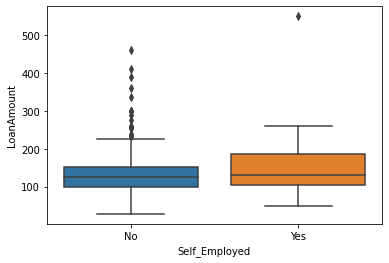

In [421]:
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

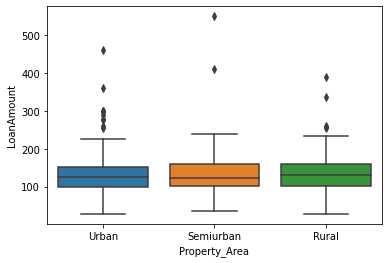

In [422]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

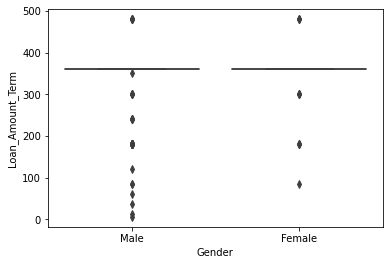

In [423]:
sns.boxplot(x = 'Gender', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

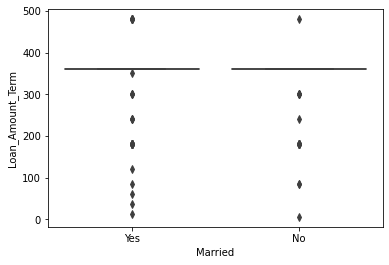

In [424]:
sns.boxplot(x = 'Married', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

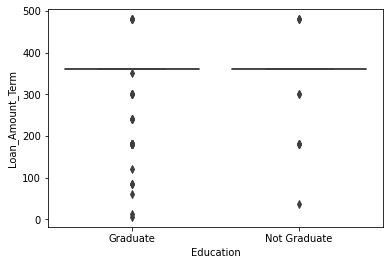

In [425]:
sns.boxplot(x = 'Education', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

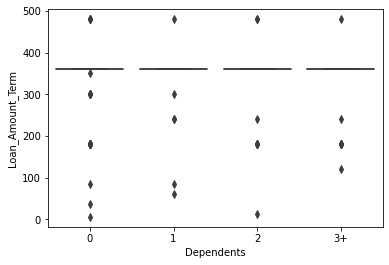

In [426]:
sns.boxplot(x = 'Dependents', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

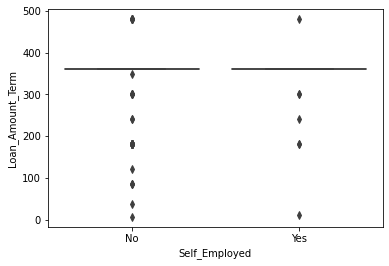

In [427]:
sns.boxplot(x = 'Self_Employed', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

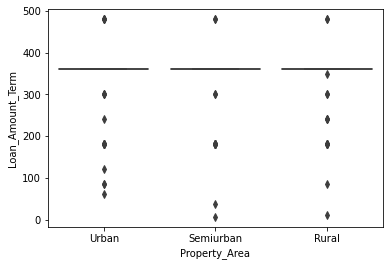

In [428]:
sns.boxplot(x = 'Property_Area', y = 'Loan_Amount_Term', data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

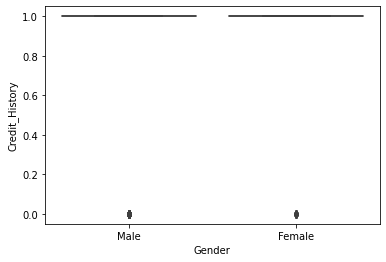

In [429]:
sns.boxplot(x = 'Gender', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

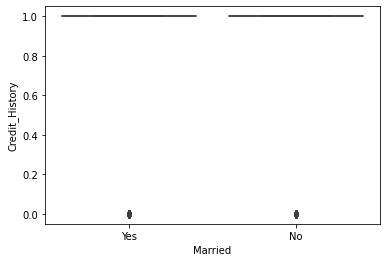

In [430]:
sns.boxplot(x = 'Married', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

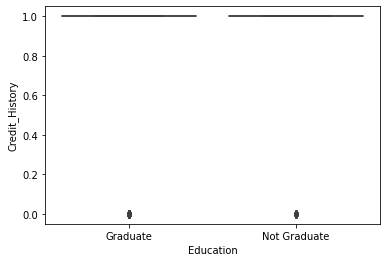

In [431]:
sns.boxplot(x = 'Education', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

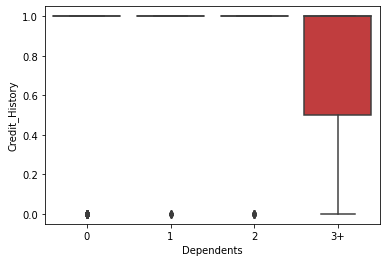

In [432]:
sns.boxplot(x = 'Dependents', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

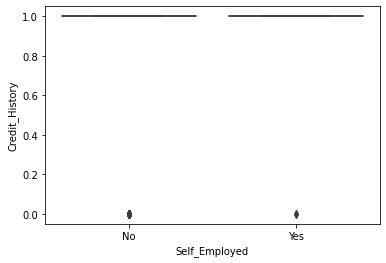

In [433]:
sns.boxplot(x = 'Self_Employed', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

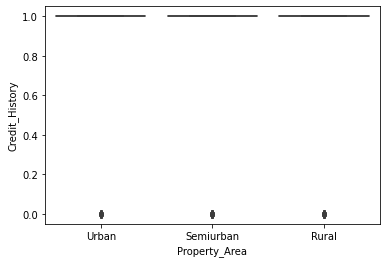

In [434]:
sns.boxplot(x = 'Property_Area', y = 'Credit_History', data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

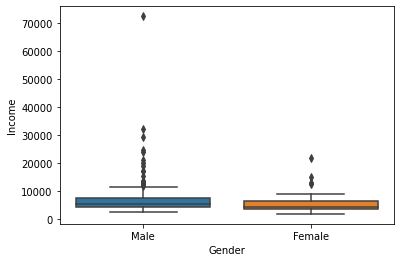

In [435]:
sns.boxplot(x = 'Gender', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Income'>

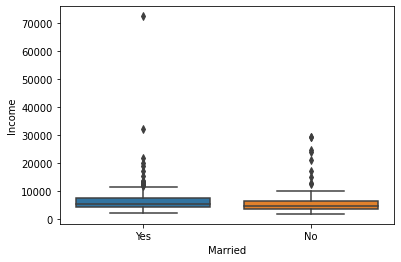

In [436]:
sns.boxplot(x = 'Married', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Income'>

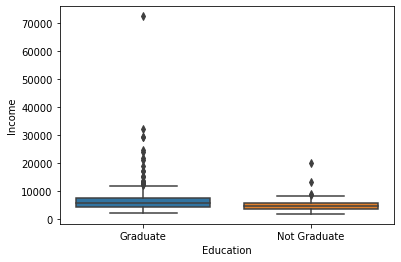

In [437]:
sns.boxplot(x = 'Education', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

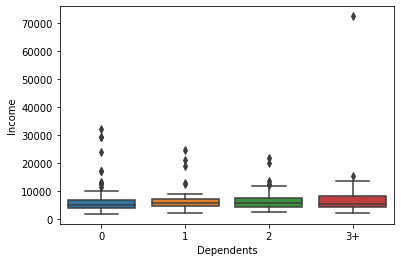

In [438]:
sns.boxplot(x = 'Dependents', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

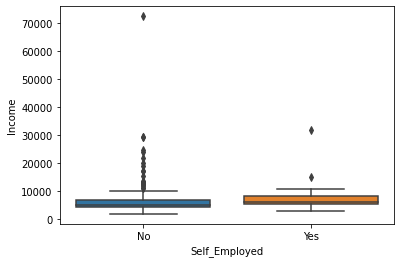

In [439]:
sns.boxplot(x = 'Self_Employed', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Income'>

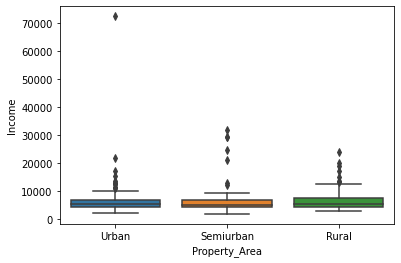

In [440]:
sns.boxplot(x = 'Property_Area', y = 'Income', data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

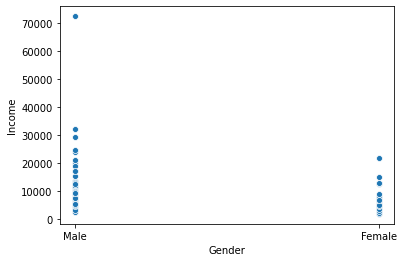

In [441]:
sns.scatterplot(x = 'Gender' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Income'>

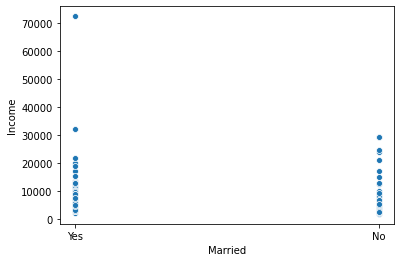

In [442]:
sns.scatterplot(x = 'Married' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Income'>

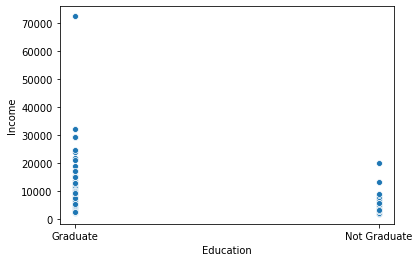

In [443]:
sns.scatterplot(x = 'Education' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

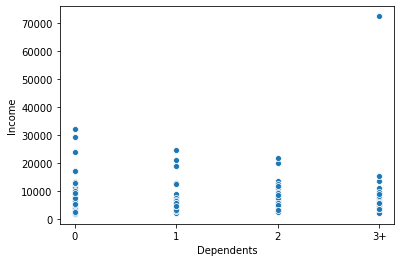

In [444]:
sns.scatterplot(x = 'Dependents' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

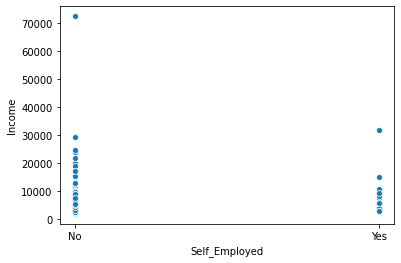

In [445]:
sns.scatterplot(x = 'Self_Employed' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Income'>

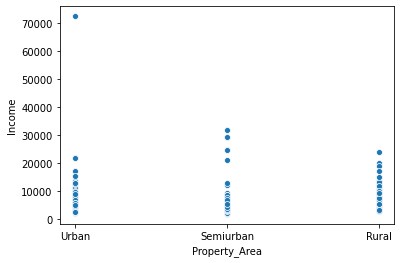

In [446]:
sns.scatterplot(x = 'Property_Area' , y = 'Income' , data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

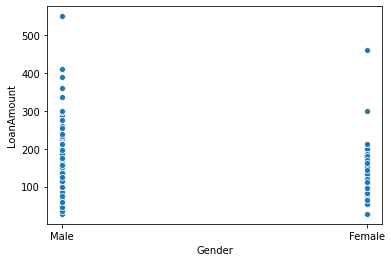

In [447]:
sns.scatterplot(x = 'Gender' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

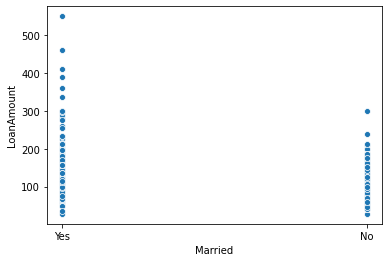

In [448]:
sns.scatterplot(x = 'Married' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

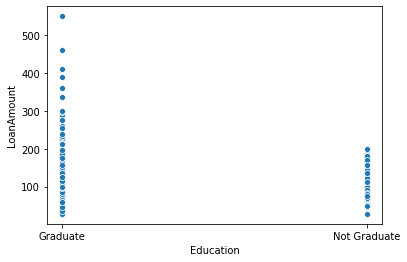

In [449]:
sns.scatterplot(x = 'Education' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

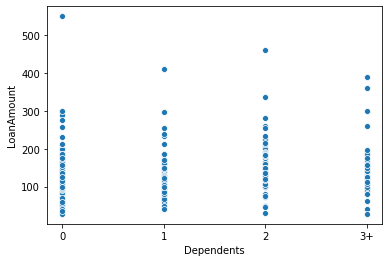

In [450]:
sns.scatterplot(x = 'Dependents' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

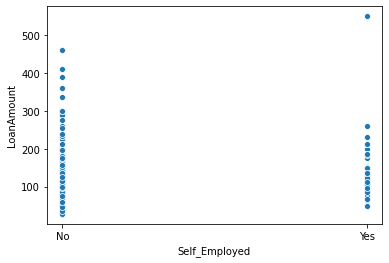

In [451]:
sns.scatterplot(x = 'Self_Employed' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

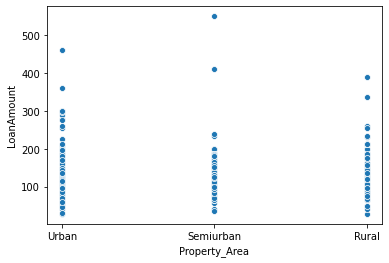

In [452]:
sns.scatterplot(x = 'Property_Area' , y = 'LoanAmount' , data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

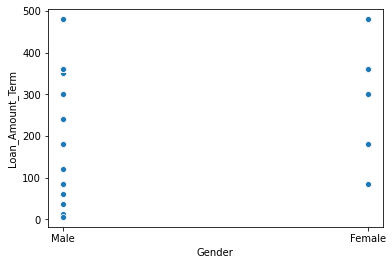

In [453]:
sns.scatterplot(x = 'Gender' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

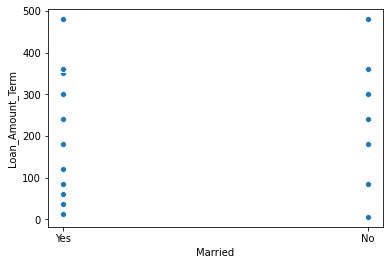

In [454]:
sns.scatterplot(x = 'Married' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

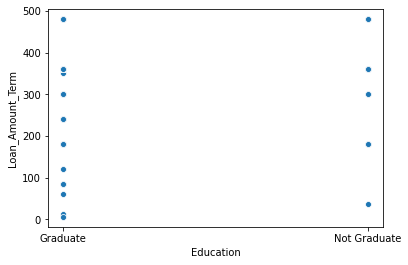

In [455]:
sns.scatterplot(x = 'Education' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

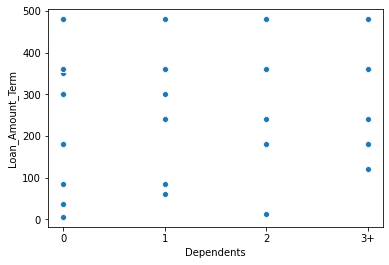

In [456]:
sns.scatterplot(x = 'Dependents' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

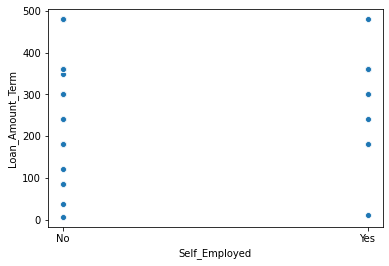

In [457]:
sns.scatterplot(x = 'Self_Employed' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

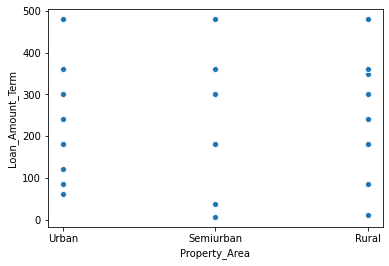

In [458]:
sns.scatterplot(x = 'Property_Area' , y = 'Loan_Amount_Term' , data = df_test1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

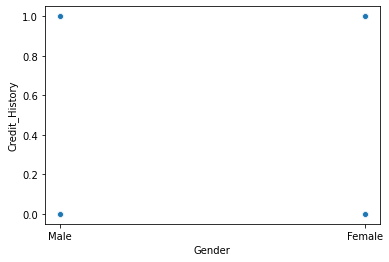

In [459]:
sns.scatterplot(x = 'Gender' , y = 'Credit_History' , data = df_test1)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

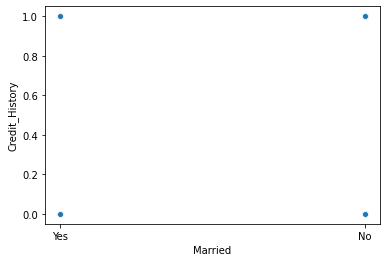

In [460]:
sns.scatterplot(x = 'Married' , y = 'Credit_History' , data = df_test1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

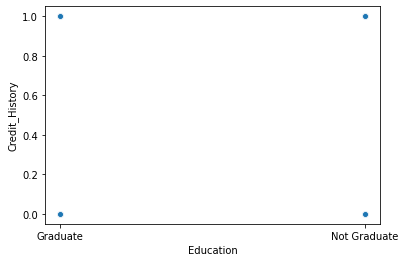

In [461]:
sns.scatterplot(x = 'Education',y = 'Credit_History',data = df_test1)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

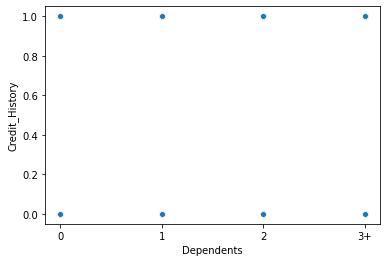

In [462]:
sns.scatterplot(x = 'Dependents' , y = 'Credit_History' , data = df_test1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

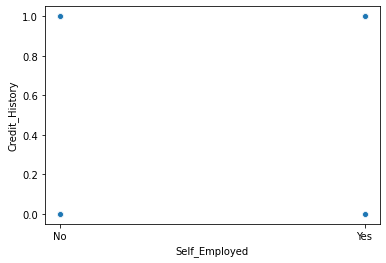

In [463]:
sns.scatterplot(x = 'Self_Employed' , y = 'Credit_History' , data = df_test1)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

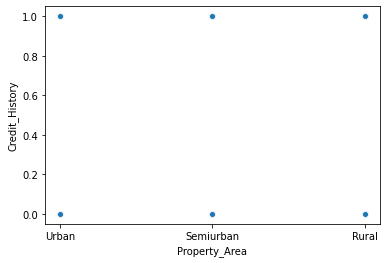

In [464]:
sns.scatterplot(x = 'Property_Area' , y = 'Credit_History' , data = df_test1)

<AxesSubplot:>

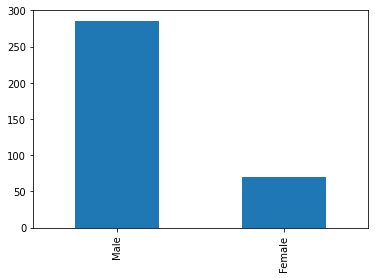

In [465]:
df_test1['Gender'].value_counts().plot.bar()

<AxesSubplot:>

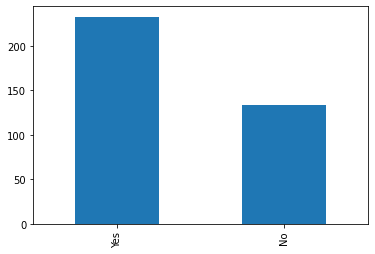

In [466]:
df_test1['Married'].value_counts().plot.bar()

<AxesSubplot:>

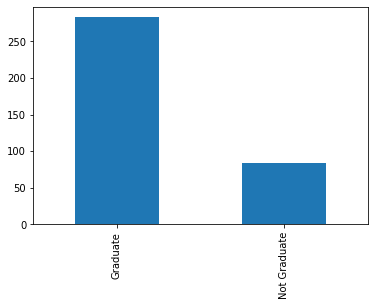

In [467]:
df_test1['Education'].value_counts().plot.bar()

<AxesSubplot:>

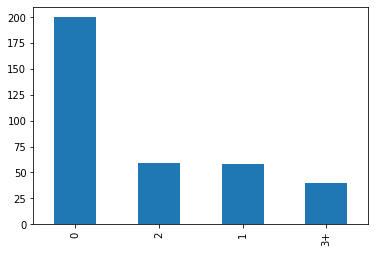

In [468]:
df_test1['Dependents'].value_counts().plot.bar()

<AxesSubplot:>

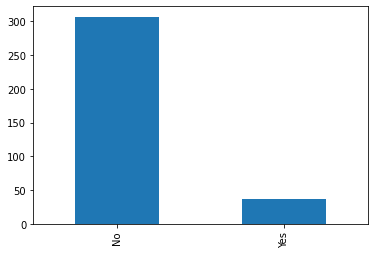

In [469]:
df_test1['Self_Employed'].value_counts().plot.bar()

<AxesSubplot:>

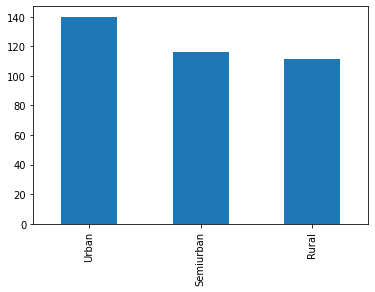

In [470]:
df_test1['Property_Area'].value_counts().plot.bar()

<AxesSubplot:>

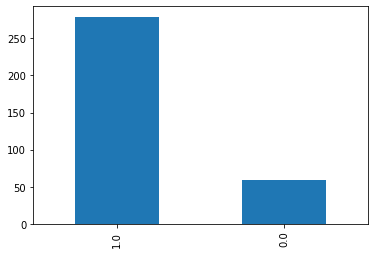

In [471]:
df_test1['Credit_History'].value_counts().plot.bar()

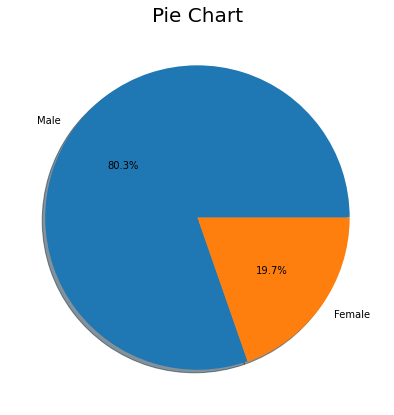

In [472]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Gender'].value_counts().values,
        labels=df_test1['Gender'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

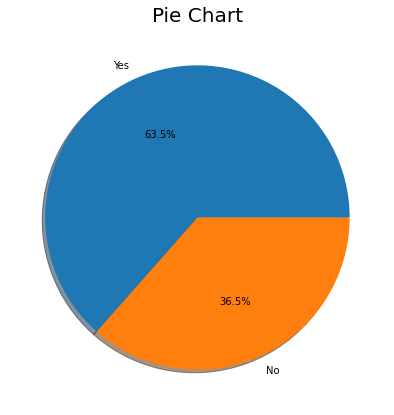

In [473]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Married'].value_counts().values,
        labels=df_test1['Married'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

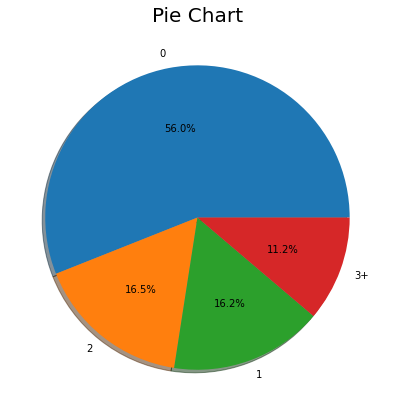

In [474]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Dependents'].value_counts().values,
        labels=df_test1['Dependents'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

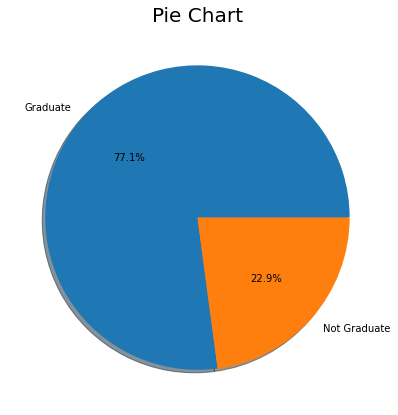

In [475]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Education'].value_counts().values,
        labels=df_test1['Education'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

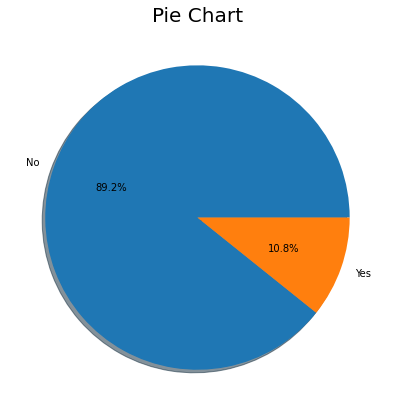

In [476]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Self_Employed'].value_counts().values,
        labels=df_test1['Self_Employed'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

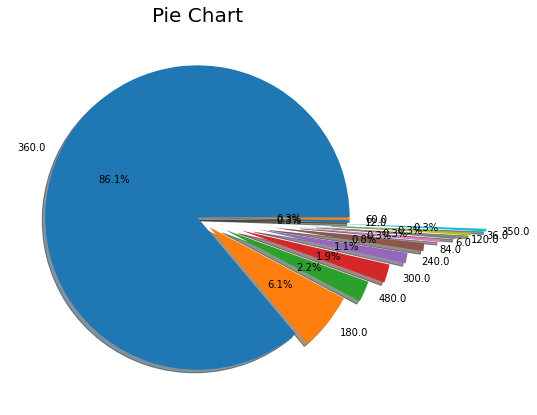

In [477]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Loan_Amount_Term'].value_counts().values,
        labels=df_test1['Loan_Amount_Term'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

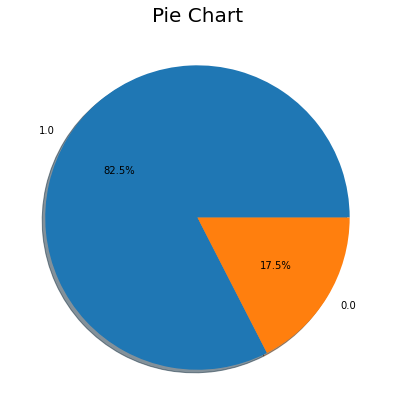

In [478]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Credit_History'].value_counts().values,
        labels=df_test1['Credit_History'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

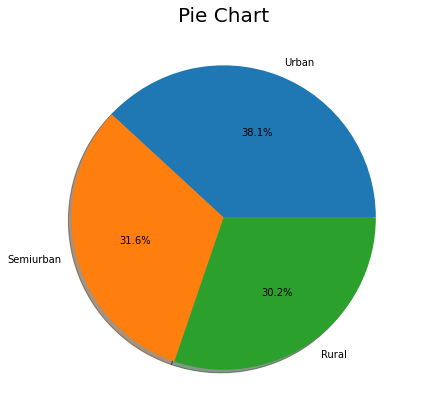

In [479]:
plt.figure(figsize=(7,7))
plt.pie(df_test1['Property_Area'].value_counts().values,
        labels=df_test1['Property_Area'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

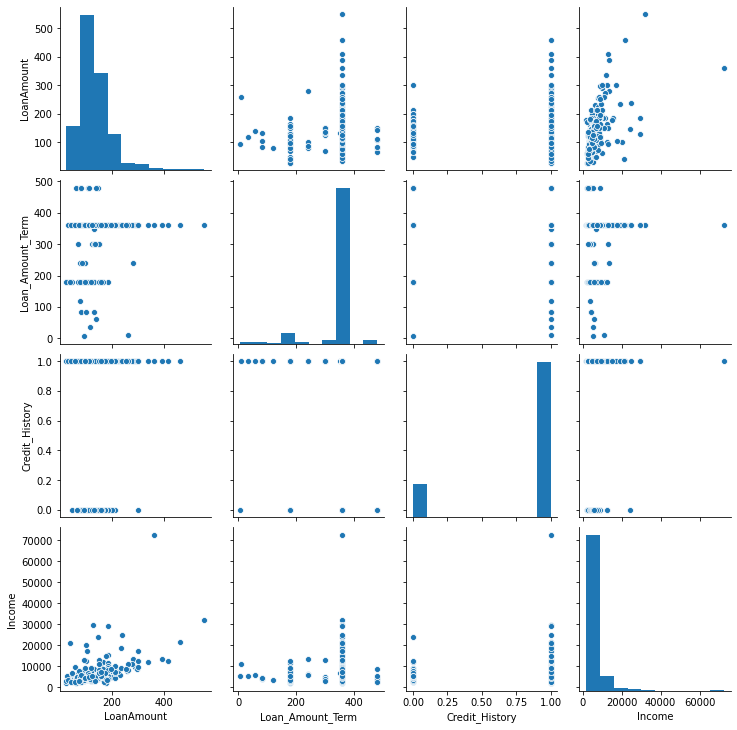

In [480]:
sns.pairplot(df_test1)

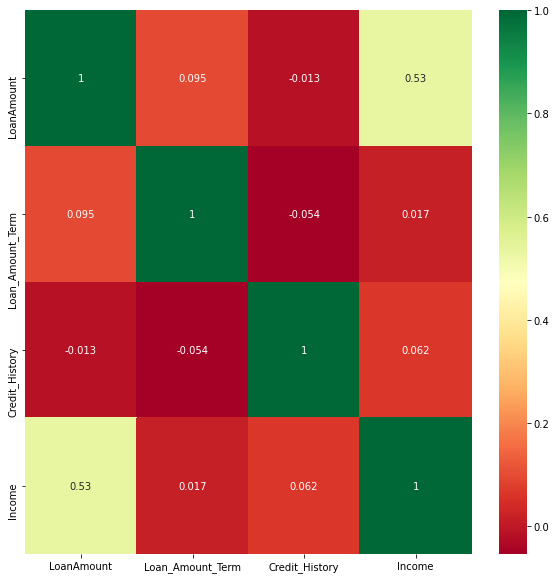

In [481]:
corrmat = df_test1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_test1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Filling Test null value

In [482]:
df_test1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  LoanAmount  \
0  LP001015   Male     Yes          0      Graduate            No       110.0   
1  LP001022   Male     Yes          1      Graduate            No       126.0   
2  LP001031   Male     Yes          2      Graduate            No       208.0   
3  LP001035   Male     Yes          2      Graduate            No       100.0   
4  LP001051   Male      No          0  Not Graduate            No        78.0   

   Loan_Amount_Term  Credit_History Property_Area  Income  
0             360.0             1.0         Urban    5720  
1             360.0             1.0         Urban    4576  
2             360.0             1.0         Urban    6800  
3             360.0             NaN         Urban    4886  
4             360.0             1.0         Urban    3276

In [483]:
df_test_new = df_test1.drop('Loan_ID',axis = 1)

In [484]:
df_test_new.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male     Yes          0      Graduate            No       110.0   
1   Male     Yes          1      Graduate            No       126.0   
2   Male     Yes          2      Graduate            No       208.0   
3   Male     Yes          2      Graduate            No       100.0   
4   Male      No          0  Not Graduate            No        78.0   

   Loan_Amount_Term  Credit_History Property_Area  Income  
0             360.0             1.0         Urban    5720  
1             360.0             1.0         Urban    4576  
2             360.0             1.0         Urban    6800  
3             360.0             NaN         Urban    4886  
4             360.0             1.0         Urban    3276

In [485]:
df_test_new['LoanAmount'].replace(np.nan,df_test_new['LoanAmount'].median(),inplace = True)

In [486]:
df_test_new['Loan_Amount_Term'].replace(np.nan,df_test_new['Loan_Amount_Term'].median(),inplace = True)

In [487]:
df_test_new['Credit_History'].replace(np.nan,df_test_new['Credit_History'].median(),inplace = True)

In [488]:
df_test_new['Gender'].replace(np.nan,df_test_new['Gender'].mode().values[0],inplace = True)

In [489]:
df_test_new['Dependents'].replace(np.nan,df_test_new['Dependents'].mode().values[0],inplace = True)

In [490]:
df_test_new['Self_Employed'].replace(np.nan,df_test_new['Self_Employed'].mode().values[0],inplace = True)

In [491]:
df_test_new.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Income              0
dtype: int64

In [492]:
df_test_new.isnull().mean()

Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
LoanAmount          0.0
Loan_Amount_Term    0.0
Credit_History      0.0
Property_Area       0.0
Income              0.0
dtype: float64

In [493]:
df_test_new.count()

Gender              367
Married             367
Dependents          367
Education           367
Self_Employed       367
LoanAmount          367
Loan_Amount_Term    367
Credit_History      367
Property_Area       367
Income              367
dtype: int64

In [494]:
df_test_new.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Income                int64
dtype: object

In [495]:
df_test_new.mean()

LoanAmount           135.980926
Loan_Amount_Term     342.822888
Credit_History         0.839237
Income              6375.177112
dtype: float64

In [496]:
df_test_new.median()

LoanAmount           125.0
Loan_Amount_Term     360.0
Credit_History         1.0
Income              5205.0
dtype: float64

In [497]:
df_test_new.max()

Gender                      Male
Married                      Yes
Dependents                    3+
Education           Not Graduate
Self_Employed                Yes
LoanAmount                   550
Loan_Amount_Term             480
Credit_History                 1
Property_Area              Urban
Income                     72529
dtype: object

In [498]:
df_test_new.min()

Gender                Female
Married                   No
Dependents                 0
Education           Graduate
Self_Employed             No
LoanAmount                28
Loan_Amount_Term           6
Credit_History             0
Property_Area          Rural
Income                  1760
dtype: object

In [499]:
df_test_new.skew()

LoanAmount          2.244601
Loan_Amount_Term   -2.709537
Credit_History     -1.854721
Income              6.994904
dtype: float64

In [500]:
df_test_new.kurt()

LoanAmount           9.588775
Loan_Amount_Term     8.866289
Credit_History       1.447852
Income              75.185085
dtype: float64

In [501]:
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [502]:
df_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [503]:
df_test_new['Self_Employed'].value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [504]:
df_test_new['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [505]:
100*df_test_new['Gender'].value_counts()/len(df_test_new['Gender'])

Male      80.926431
Female    19.073569
Name: Gender, dtype: float64

In [506]:
100*df_test_new['Dependents'].value_counts()/len(df_test_new['Dependents'])

0     57.220708
2     16.076294
1     15.803815
3+    10.899183
Name: Dependents, dtype: float64

In [507]:
100*df_test_new['Self_Employed'].value_counts()/len(df_test_new['Self_Employed'])

No     89.918256
Yes    10.081744
Name: Self_Employed, dtype: float64

In [508]:
100*df_test_new['Credit_History'].value_counts()/len(df_test_new['Credit_History'])

1.0    83.923706
0.0    16.076294
Name: Credit_History, dtype: float64

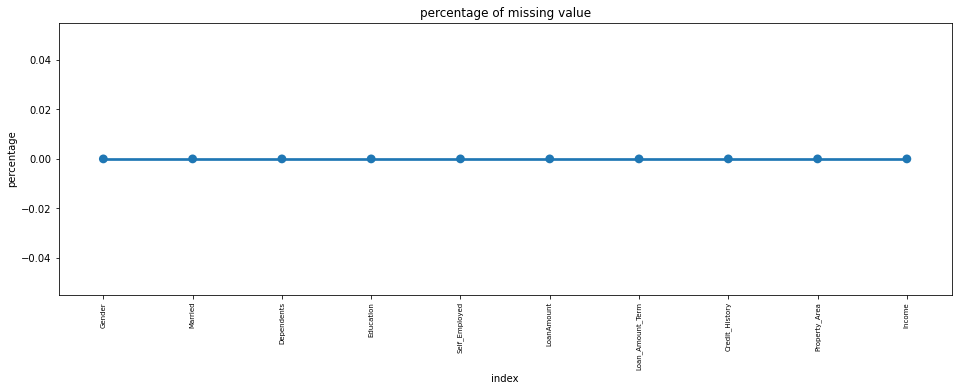

In [509]:
missing_test1 = pd.DataFrame((df_test_new.isnull().sum())*100/df_test_new.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data = missing_test1)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("percentage of missing value")
plt.ylabel("percentage")
plt.show()

In [510]:
df_test_new.corr()

LoanAmount  Loan_Amount_Term  Credit_History    Income
LoanAmount          1.000000          0.091867       -0.012932  0.528952
Loan_Amount_Term    0.091867          1.000000       -0.048189  0.018149
Credit_History     -0.012932         -0.048189        1.000000  0.063631
Income              0.528952          0.018149        0.063631  1.000000

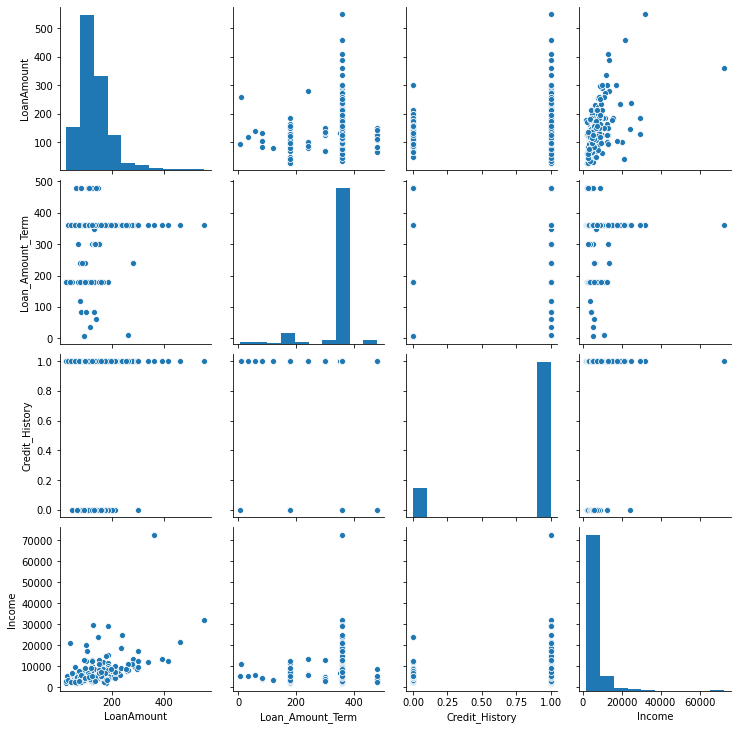

In [511]:
sns.pairplot(df_test_new)

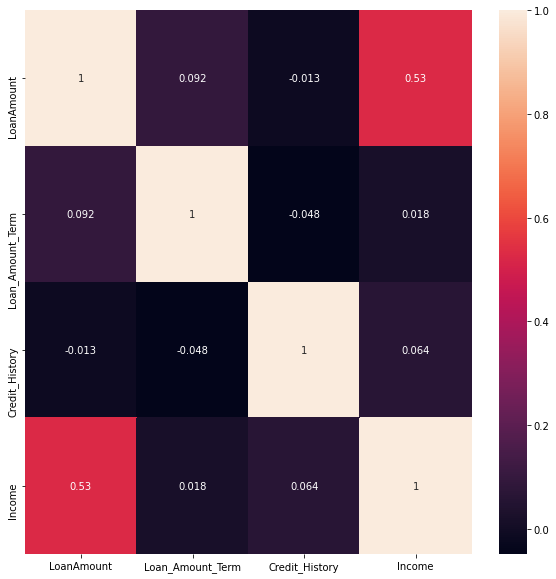

In [512]:
corrmat = df_test_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_test_new[top_corr_features].corr(),annot=True)

(array([ 46., 165., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

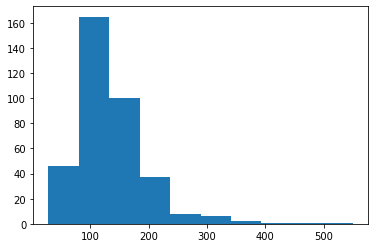

In [513]:
plt.hist(df_test_new.LoanAmount)

(array([  3.,   4.,   1.,  22.,   4.,   0.,   7., 318.,   0.,   8.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <BarContainer object of 10 artists>)

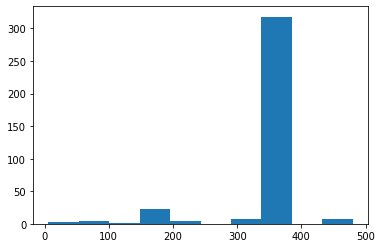

In [514]:
plt.hist(df_test_new.Loan_Amount_Term)

(array([ 59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 308.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

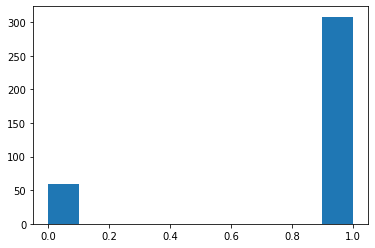

In [515]:
plt.hist(df_test_new.Credit_History)

<AxesSubplot:xlabel='LoanAmount'>

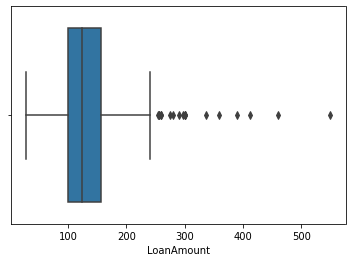

In [516]:
sns.boxplot(df_test_new.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term'>

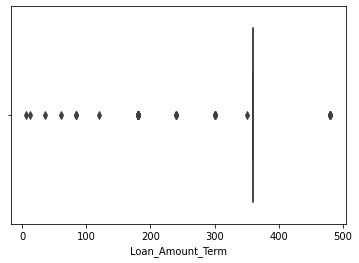

In [517]:
sns.boxplot(df_test_new.Loan_Amount_Term)

<AxesSubplot:xlabel='Credit_History'>

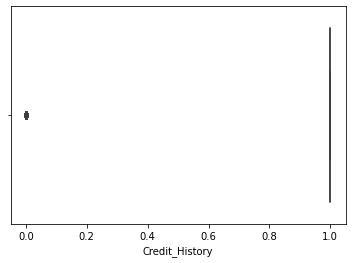

In [518]:
sns.boxplot(df_test_new.Credit_History)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

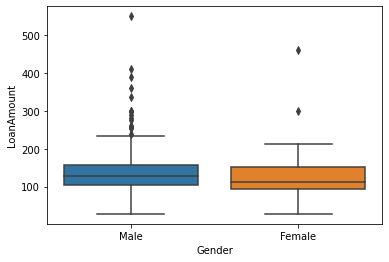

In [519]:
sns.boxplot(data = df_test_new , x = 'Gender' , y = 'LoanAmount')

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

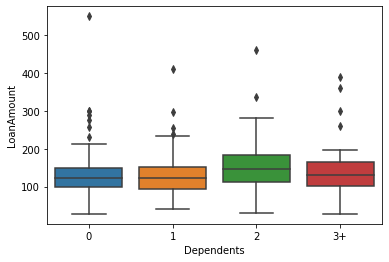

In [520]:
sns.boxplot(data = df_test_new , x = 'Dependents' , y = 'LoanAmount')

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

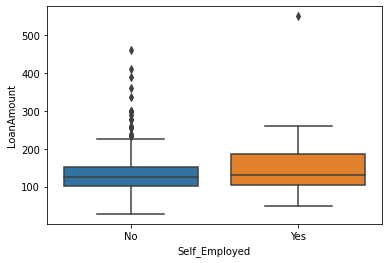

In [521]:
sns.boxplot(data = df_test_new , x = 'Self_Employed' , y = 'LoanAmount')

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

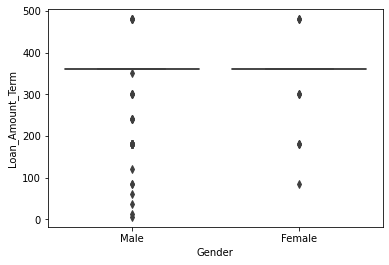

In [522]:
sns.boxplot(data = df_test_new , x = 'Gender' , y = 'Loan_Amount_Term')

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

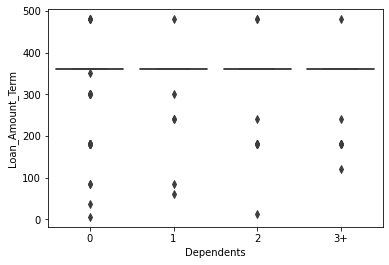

In [523]:
sns.boxplot(data = df_test_new , x = 'Dependents' , y = 'Loan_Amount_Term')

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

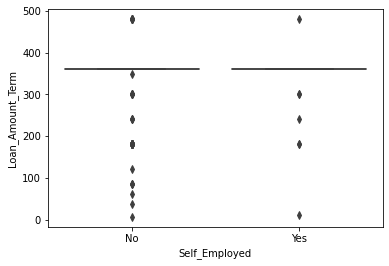

In [524]:
sns.boxplot(data = df_test_new , x = 'Self_Employed' , y = 'Loan_Amount_Term')

<AxesSubplot:xlabel='Gender', ylabel='Income'>

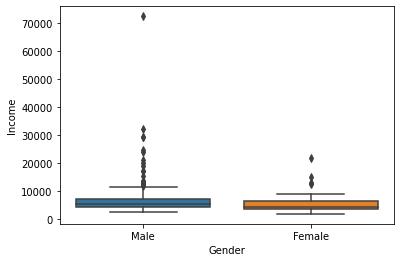

In [525]:
sns.boxplot(data = df_test_new , x = 'Gender' , y = 'Income')

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

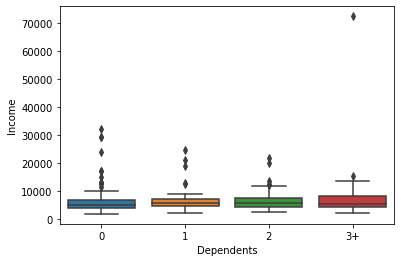

In [526]:
sns.boxplot(data = df_test_new , x = 'Dependents' , y = 'Income')

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

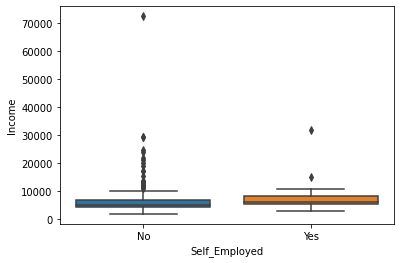

In [527]:
sns.boxplot(data = df_test_new , x = 'Self_Employed' , y = 'Income')

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

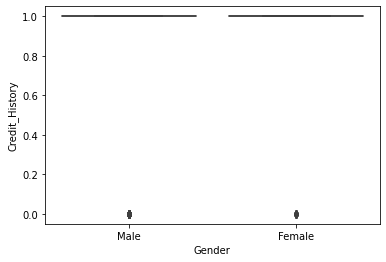

In [528]:
sns.boxplot(data = df_test_new , x = 'Gender' , y = 'Credit_History')

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

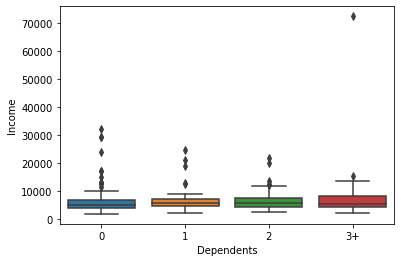

In [529]:
sns.boxplot(data = df_test_new , x = 'Dependents' , y = 'Income')

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

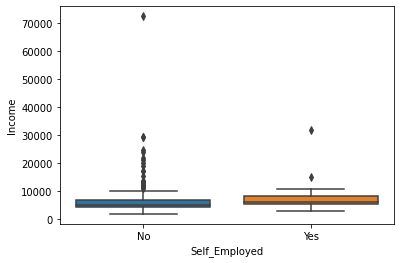

In [530]:
sns.boxplot(data = df_test_new , x = 'Self_Employed' , y = 'Income')

<AxesSubplot:>

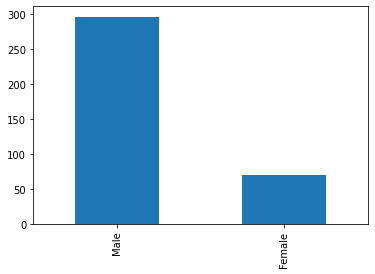

In [531]:
df_test_new['Gender'].value_counts().plot.bar()

<AxesSubplot:>

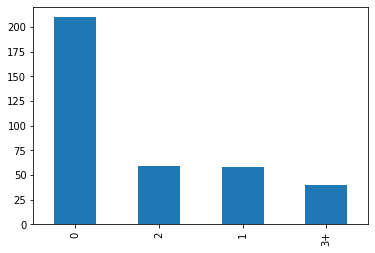

In [532]:
df_test_new['Dependents'].value_counts().plot.bar()

<AxesSubplot:>

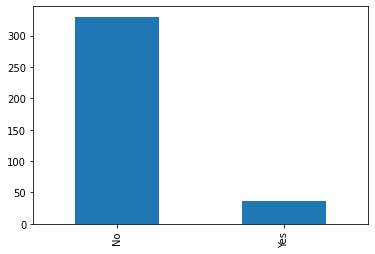

In [533]:
df_test_new['Self_Employed'].value_counts().plot.bar()

<AxesSubplot:>

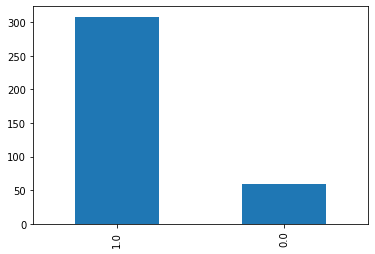

In [534]:
df_test_new['Credit_History'].value_counts().plot.bar()

In [535]:
df_test_new.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male     Yes          0      Graduate            No       110.0   
1   Male     Yes          1      Graduate            No       126.0   
2   Male     Yes          2      Graduate            No       208.0   
3   Male     Yes          2      Graduate            No       100.0   
4   Male      No          0  Not Graduate            No        78.0   

   Loan_Amount_Term  Credit_History Property_Area  Income  
0             360.0             1.0         Urban    5720  
1             360.0             1.0         Urban    4576  
2             360.0             1.0         Urban    6800  
3             360.0             1.0         Urban    4886  
4             360.0             1.0         Urban    3276

In [536]:
T1 = pd.get_dummies(df_test_new,drop_first = True)

In [537]:
T1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       110.0             360.0             1.0    5720            1   
1       126.0             360.0             1.0    4576            1   
2       208.0             360.0             1.0    6800            1   
3       100.0             360.0             1.0    4886            1   
4        78.0             360.0             1.0    3276            1   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0            1             0             0              0   
1            1             1             0              0   
2            1             0             1              0   
3            1             0             1              0   
4            0             0             0              0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
4                       1                  0                        0   

   Property_Area_Urban  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [538]:
T1.shape

(367, 13)

In [539]:
T1['Education_Not_Graduate'] = T1['Education_Not Graduate']
T1['Dependents_3'] = T1['Dependents_3+']

In [540]:
T1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       110.0             360.0             1.0    5720            1   
1       126.0             360.0             1.0    4576            1   
2       208.0             360.0             1.0    6800            1   
3       100.0             360.0             1.0    4886            1   
4        78.0             360.0             1.0    3276            1   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0            1             0             0              0   
1            1             1             0              0   
2            1             0             1              0   
3            1             0             1              0   
4            0             0             0              0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
4                       1                  0                        0   

   Property_Area_Urban  Education_Not_Graduate  Dependents_3  
0                    1                       0             0  
1                    1                       0             0  
2                    1                       0             0  
3                    1                       0             0  
4                    1                       1             0

In [541]:
T1 = T1.drop(['Education_Not Graduate','Dependents_3+'],axis = 1,inplace = False)

In [542]:
T1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       110.0             360.0             1.0    5720            1   
1       126.0             360.0             1.0    4576            1   
2       208.0             360.0             1.0    6800            1   
3       100.0             360.0             1.0    4886            1   
4        78.0             360.0             1.0    3276            1   

   Married_Yes  Dependents_1  Dependents_2  Self_Employed_Yes  \
0            1             0             0                  0   
1            1             1             0                  0   
2            1             0             1                  0   
3            1             0             1                  0   
4            0             0             0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Education_Not_Graduate  \
0                        0                    1                       0   
1                        0                    1                       0   
2                        0                    1                       0   
3                        0                    1                       0   
4                        0                    1                       1   

   Dependents_3  
0             0  
1             0  
2             0  
3             0  
4             0

In [543]:
T2 = T1[['Credit_History','Income','LoanAmount','Loan_Amount_Term','Property_Area_Semiurban','Education_Not_Graduate','Property_Area_Urban','Married_Yes','Dependents_2','Dependents_1','Dependents_3']]

In [544]:
T2.head()

Credit_History  Income  LoanAmount  Loan_Amount_Term  \
0             1.0    5720       110.0             360.0   
1             1.0    4576       126.0             360.0   
2             1.0    6800       208.0             360.0   
3             1.0    4886       100.0             360.0   
4             1.0    3276        78.0             360.0   

   Property_Area_Semiurban  Education_Not_Graduate  Property_Area_Urban  \
0                        0                       0                    1   
1                        0                       0                    1   
2                        0                       0                    1   
3                        0                       0                    1   
4                        0                       1                    1   

   Married_Yes  Dependents_2  Dependents_1  Dependents_3  
0            1             0             0             0  
1            1             0             1             0  
2            1             1             0             0  
3            1             1             0             0  
4            0             0             0             0

In [545]:
T2.shape

(367, 11)

#### Train_EDA_And_Feature Engg.

In [546]:
cont_mis = [var for var in df_train1.columns if df_train1[var].isnull().mean()>0 and df_train1[var].dtypes !='O']

In [547]:
cont_mis

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [548]:
100*df_train1['Loan_Status'].value_counts()/len(df_train1['Loan_Status'])

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [549]:
df_train1.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [550]:
median1 = df_train1.LoanAmount.median()

In [551]:
median1

128.0

In [552]:
median2 = df_train1.Loan_Amount_Term.median()

In [553]:
median2

360.0

In [554]:
median3 = df_train1.Credit_History.median()

In [555]:
median3

1.0

In [556]:
df_train1[df_train1['LoanAmount'].isnull()].index

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')

In [557]:
df_train1[df_train1['Loan_Amount_Term'].isnull()].index

Int64Index([19, 36, 44, 45, 73, 112, 165, 197, 223, 232, 335, 367, 421, 423], dtype='int64')

In [558]:
df_train1[df_train1['Credit_History'].isnull()].index

Int64Index([ 16,  24,  30,  42,  79,  83,  86,  95, 117, 125, 129, 130, 156,
            181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318,
            323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490,
            491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600],
           dtype='int64')

In [559]:
def impute_nan(df_train1,variable1,variable2,variable3,median1,median2,median3):
    df_train1[variable1]=df_train1[variable1].fillna(median1)
    df_train1[variable2]=df_train1[variable2].fillna(median2)
    df_train1[variable3]=df_train1[variable3].fillna(median3)

In [560]:
impute_nan(df_train1,"LoanAmount",'Loan_Amount_Term','Credit_History',median1,median2,median3)

In [561]:
df_train1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [562]:
categorical_missing

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [563]:
df_train1['Gender'].mode()[0]

'Male'

In [564]:
df_train1['Married'].mode()[0]

'Yes'

In [565]:
df_train1['Dependents'].mode()[0]

'0'

In [566]:
df_train1['Self_Employed'].mode()[0]

'No'

In [567]:
def impute_nan_cat(df_train1,variable):
    most_frequent_category=df_train1[variable].mode()[0]
    df_train1[variable].fillna(most_frequent_category,inplace=True)

In [568]:
for feature in ['Gender','Married','Dependents','Self_Employed']:
    impute_nan_cat(df_train1,feature)

In [569]:
df_train1.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [570]:
df_train_new = df_train1.copy()

In [571]:
df_train_new.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [572]:
df_train_new.drop_duplicates(inplace = True)

In [573]:
cont_mis1 = [var for var in df_train_new.columns if df_train_new[var].isnull().mean()>0 and df_train_new[var].dtypes !='O']

In [574]:
cont_mis1

[]

In [575]:
cat_mis1 = [var for var in df_train_new.columns if df_train_new[var].isnull().mean()>0 and df_train_new[var].dtypes =='O']

In [576]:
cat_mis1

[]

In [577]:
df_train_new['Income'] = df_train_new['ApplicantIncome']+df_train_new['CoapplicantIncome']

In [578]:
df_train_new['Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Income, Length: 614, dtype: float64

In [579]:
df_train_new.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Income  
0             1.0         Urban           Y  5849.0  
1             1.0         Rural           N  6091.0  
2             1.0         Urban           Y  3000.0  
3             1.0         Urban           Y  4941.0  
4             1.0         Urban           Y  6000.0

In [580]:
df_train_new = df_train_new.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1)

In [581]:
df_train_new.head()

Loan_ID Gender Married Dependents     Education Self_Employed  LoanAmount  \
0  LP001002   Male      No          0      Graduate            No       128.0   
1  LP001003   Male     Yes          1      Graduate            No       128.0   
2  LP001005   Male     Yes          0      Graduate           Yes        66.0   
3  LP001006   Male     Yes          0  Not Graduate            No       120.0   
4  LP001008   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Income  
0             360.0             1.0         Urban           Y  5849.0  
1             360.0             1.0         Rural           N  6091.0  
2             360.0             1.0         Urban           Y  3000.0  
3             360.0             1.0         Urban           Y  4941.0  
4             360.0             1.0         Urban           Y  6000.0

In [582]:
df_train_new.shape

(614, 12)

In [583]:
100*df_train_new['Loan_Status'].value_counts()/len(df_train_new['Loan_Status'])

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [584]:
100*df_train_new['Gender'].value_counts()/len(df_train_new['Gender'])

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

In [585]:
100*df_train_new['Married'].value_counts()/len(df_train_new['Married'])

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

In [586]:
100*df_train_new['Dependents'].value_counts()/len(df_train_new['Dependents'])

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

In [587]:
100*df_train_new['Education'].value_counts()/len(df_train_new['Education'])

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [588]:
100*df_train_new['Self_Employed'].value_counts()/len(df_train_new['Self_Employed'])

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

In [589]:
100*df_train_new['Property_Area'].value_counts()/len(df_train_new['Property_Area'])

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

In [590]:
df_train_new.corr()

LoanAmount  Loan_Amount_Term  Credit_History    Income
LoanAmount          1.000000          0.036960       -0.000607  0.620316
Loan_Amount_Term    0.036960          1.000000       -0.004705 -0.070917
Credit_History     -0.000607         -0.004705        1.000000 -0.012563
Income              0.620316         -0.070917       -0.012563  1.000000

In [591]:
df_train_new.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [592]:
df_train_new.isnull().mean()

Loan_ID             0.0
Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
LoanAmount          0.0
Loan_Amount_Term    0.0
Credit_History      0.0
Property_Area       0.0
Loan_Status         0.0
Income              0.0
dtype: float64

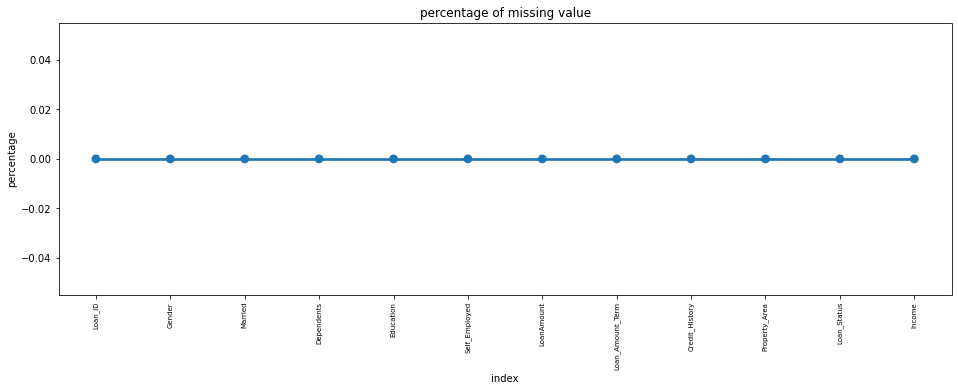

In [593]:
missing2 = pd.DataFrame((df_train_new.isnull().sum())*100/df_train_new.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data = missing2)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("percentage of missing value")
plt.ylabel("percentage")
plt.show()

In [594]:
df_train_new.isnull().any()

Loan_ID             False
Gender              False
Married             False
Dependents          False
Education           False
Self_Employed       False
LoanAmount          False
Loan_Amount_Term    False
Credit_History      False
Property_Area       False
Loan_Status         False
Income              False
dtype: bool

In [595]:
df_train_new.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

In [596]:
df_train_new.count()

Loan_ID             614
Gender              614
Married             614
Dependents          614
Education           614
Self_Employed       614
LoanAmount          614
Loan_Amount_Term    614
Credit_History      614
Property_Area       614
Loan_Status         614
Income              614
dtype: int64

In [597]:
df_train_new.max()

Loan_ID                 LP002990
Gender                      Male
Married                      Yes
Dependents                    3+
Education           Not Graduate
Self_Employed                Yes
LoanAmount                   700
Loan_Amount_Term             480
Credit_History                 1
Property_Area              Urban
Loan_Status                    Y
Income                     81000
dtype: object

In [598]:
df_train_new.min()

Loan_ID             LP001002
Gender                Female
Married                   No
Dependents                 0
Education           Graduate
Self_Employed             No
LoanAmount                 9
Loan_Amount_Term          12
Credit_History             0
Property_Area          Rural
Loan_Status                N
Income                  1442
dtype: object

In [599]:
range1 = (df_train_new['Income'].max()-df_train_new['Income'].min())

In [600]:
range1

79558.0

In [601]:
range3 = (df_train_new['LoanAmount'].max()-df_train_new['LoanAmount'].min())

In [602]:
range3

691.0

In [603]:
range4 = (df_train_new['Loan_Amount_Term'].max()-df_train_new['Loan_Amount_Term'].min())

In [604]:
range4

468.0

In [605]:
range5 = (df_train_new['Credit_History'].max()-df_train_new['Credit_History'].min())

In [606]:
range5

1.0

In [607]:
df_train_new['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [608]:
df_train_new['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [609]:
df_train_new['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [610]:
df_train_new['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [611]:
df_train_new['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [612]:
df_train_new['LoanAmount'].value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
187.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [613]:
df_train_new['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [614]:
df_train_new['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [615]:
mean_new = df_train_new.mean()

In [616]:
mean_new

LoanAmount           145.752443
Loan_Amount_Term     342.410423
Credit_History         0.855049
Income              7024.705081
dtype: float64

In [617]:
median_new = df_train_new.median()

In [618]:
median_new

LoanAmount           128.0
Loan_Amount_Term     360.0
Credit_History         1.0
Income              5416.5
dtype: float64

In [619]:
var_new = df_train_new.var()

In [620]:
var_new

LoanAmount          7.074027e+03
Loan_Amount_Term    4.151048e+03
Credit_History      1.241425e-01
Income              4.171434e+07
dtype: float64

In [621]:
std_new = df_train_new.var()

In [622]:
std_new

LoanAmount          7.074027e+03
Loan_Amount_Term    4.151048e+03
Credit_History      1.241425e-01
Income              4.171434e+07
dtype: float64

In [623]:
skew_new = df_train_new.skew()

In [624]:
skew_new

LoanAmount          2.743053
Loan_Amount_Term   -2.402112
Credit_History     -2.021971
Income              5.633449
dtype: float64

In [625]:
kurt_new = df_train_new.kurt()

In [626]:
kurt_new

LoanAmount          10.936695
Loan_Amount_Term     6.924993
Credit_History       2.095179
Income              45.784414
dtype: float64

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

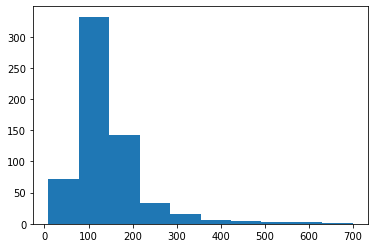

In [627]:
plt.hist(df_train_new.LoanAmount)

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 526.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

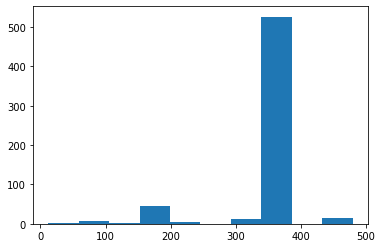

In [628]:
plt.hist(df_train_new.Loan_Amount_Term)

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

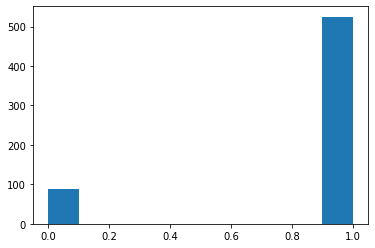

In [629]:
plt.hist(df_train_new.Credit_History)

(array([513.,  77.,  14.,   1.,   4.,   2.,   1.,   1.,   0.,   1.]),
 array([ 1442. ,  9397.8, 17353.6, 25309.4, 33265.2, 41221. , 49176.8,
        57132.6, 65088.4, 73044.2, 81000. ]),
 <BarContainer object of 10 artists>)

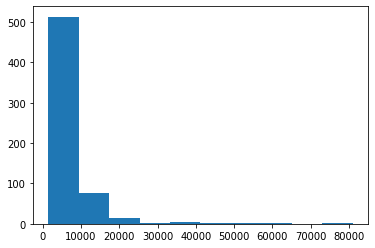

In [630]:
plt.hist(df_train_new.Income)

<AxesSubplot:xlabel='LoanAmount'>

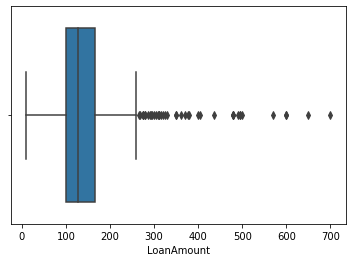

In [631]:
sns.boxplot(df_train_new.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term'>

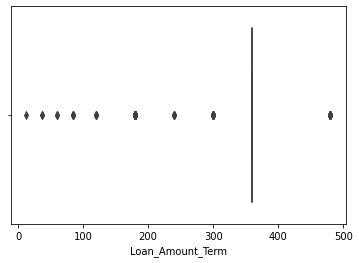

In [632]:
sns.boxplot(df_train_new.Loan_Amount_Term)

<AxesSubplot:xlabel='Credit_History'>

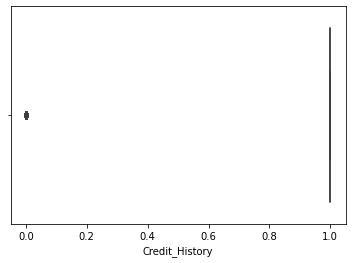

In [633]:
sns.boxplot(df_train_new.Credit_History)

<AxesSubplot:xlabel='Income'>

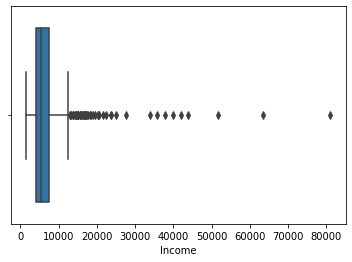

In [634]:
sns.boxplot(df_train_new.Income)

<AxesSubplot:>

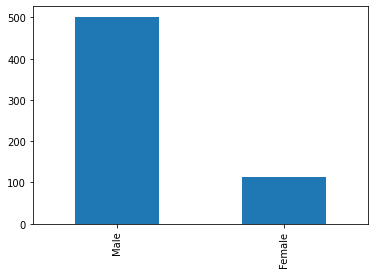

In [635]:
df_train_new['Gender'].value_counts().plot.bar()

<AxesSubplot:>

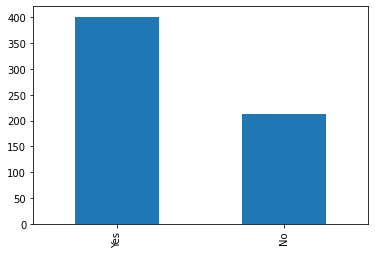

In [636]:
df_train_new['Married'].value_counts().plot.bar()

<AxesSubplot:>

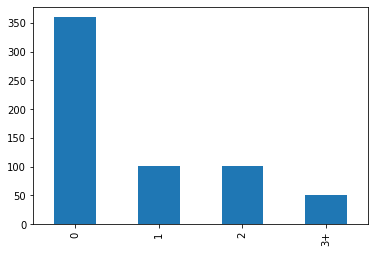

In [637]:
df_train_new['Dependents'].value_counts().plot.bar()

<AxesSubplot:>

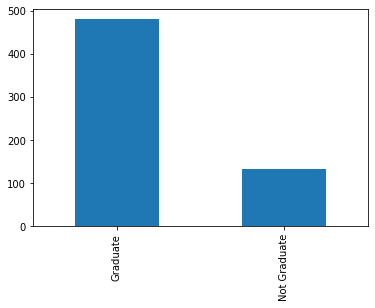

In [638]:
df_train_new['Education'].value_counts().plot.bar()

<AxesSubplot:>

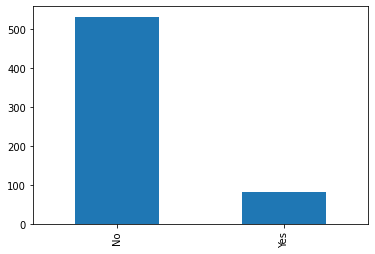

In [639]:
df_train_new['Self_Employed'].value_counts().plot.bar()

<AxesSubplot:>

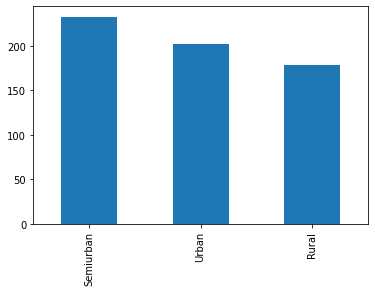

In [640]:
df_train_new['Property_Area'].value_counts().plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='Income'>

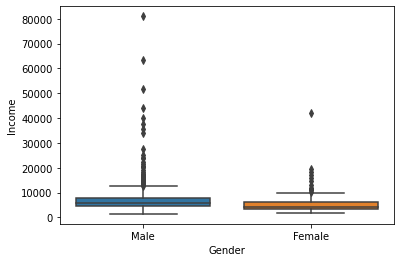

In [641]:
sns.boxplot(x = 'Gender', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

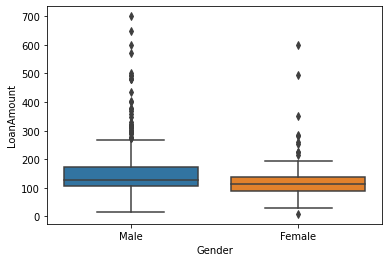

In [642]:
sns.boxplot(x = 'Gender', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

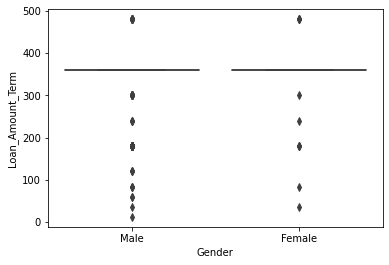

In [643]:
sns.boxplot(x = 'Gender', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

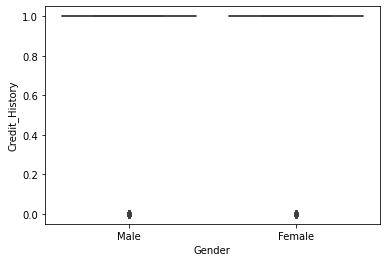

In [644]:
sns.boxplot(x = 'Gender', y = 'Credit_History', data = df_train_new)

<AxesSubplot:xlabel='Married', ylabel='Income'>

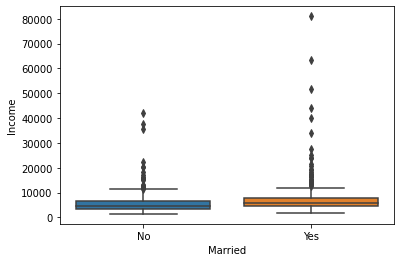

In [645]:
sns.boxplot(x = 'Married', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

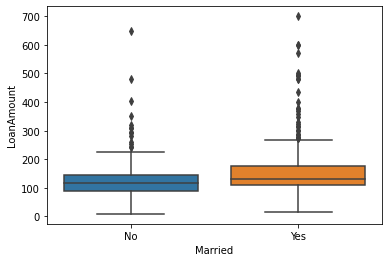

In [646]:
sns.boxplot(x = 'Married', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

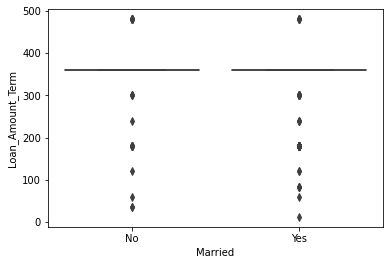

In [647]:
sns.boxplot(x = 'Married', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

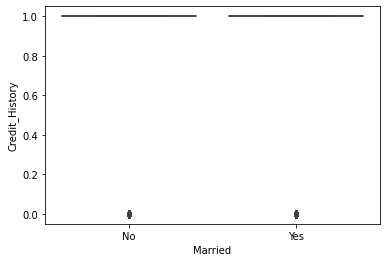

In [648]:
sns.boxplot(x = 'Married', y = 'Credit_History', data = df_train_new)

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

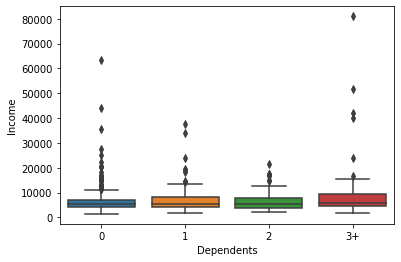

In [649]:
sns.boxplot(x = 'Dependents', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

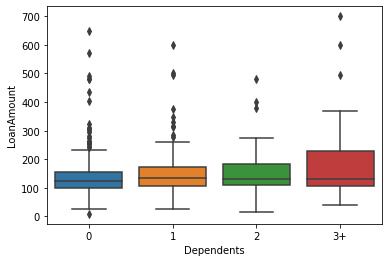

In [650]:
sns.boxplot(x = 'Dependents', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

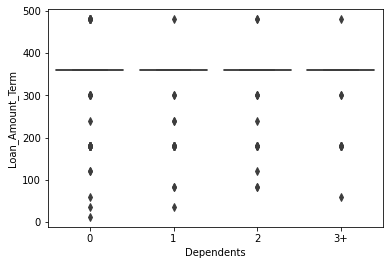

In [651]:
sns.boxplot(x = 'Dependents', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

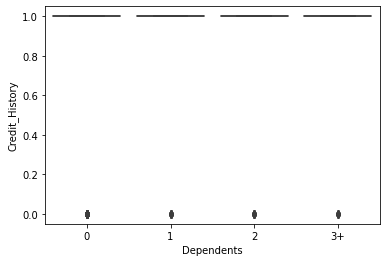

In [652]:
sns.boxplot(x = 'Dependents', y = 'Credit_History', data = df_train_new)

<AxesSubplot:xlabel='Education', ylabel='Income'>

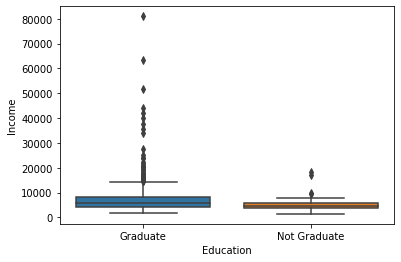

In [653]:
sns.boxplot(x = 'Education', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

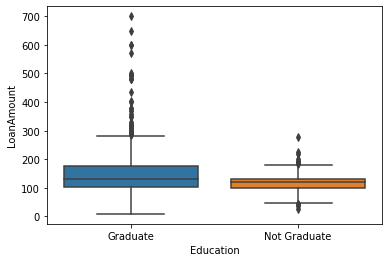

In [654]:
sns.boxplot(x = 'Education', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

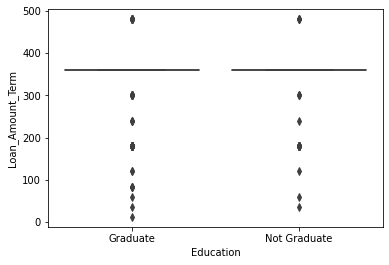

In [655]:
sns.boxplot(x = 'Education', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

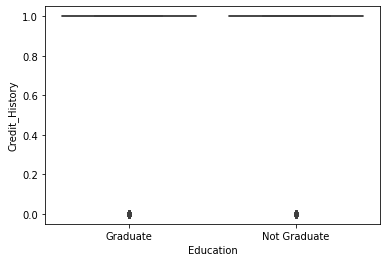

In [656]:
sns.boxplot(x = 'Education', y = 'Credit_History', data = df_train_new)

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

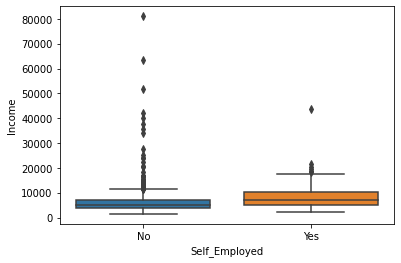

In [657]:
sns.boxplot(x = 'Self_Employed', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

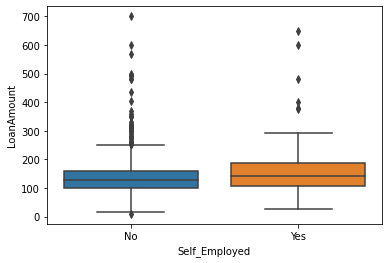

In [658]:
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

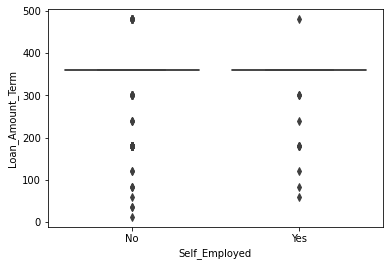

In [659]:
sns.boxplot(x = 'Self_Employed', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

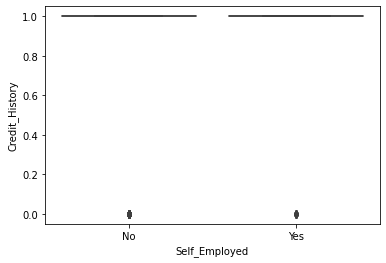

In [660]:
sns.boxplot(x = 'Self_Employed', y = 'Credit_History', data = df_train_new)

<AxesSubplot:xlabel='Property_Area', ylabel='Income'>

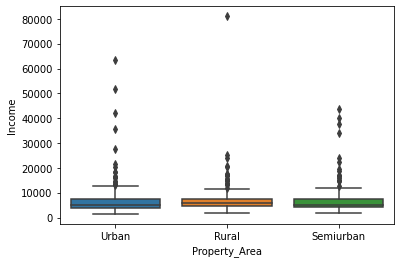

In [661]:
sns.boxplot(x = 'Property_Area', y = 'Income', data = df_train_new)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

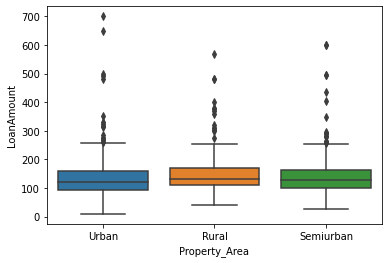

In [662]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df_train_new)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

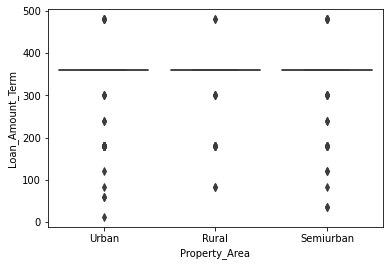

In [663]:
sns.boxplot(x = 'Property_Area', y = 'Loan_Amount_Term', data = df_train_new)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

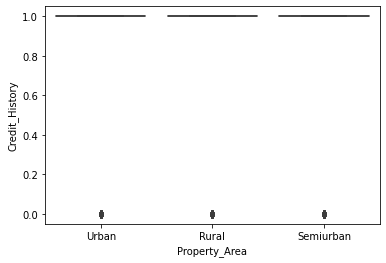

In [664]:
sns.boxplot(x = 'Property_Area', y = 'Credit_History', data = df_train_new)

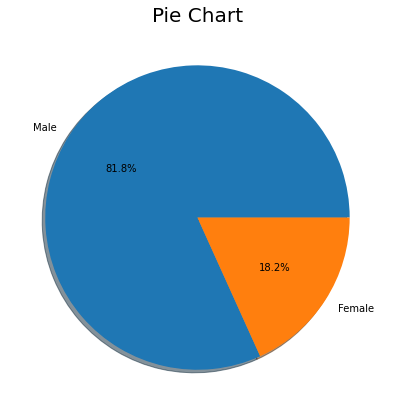

In [665]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Gender'].value_counts().values,
        labels=df_train_new['Gender'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

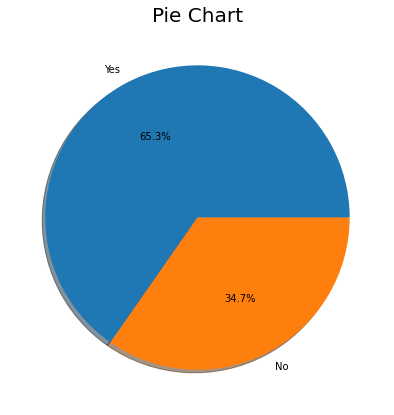

In [666]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Married'].value_counts().values,
        labels=df_train_new['Married'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

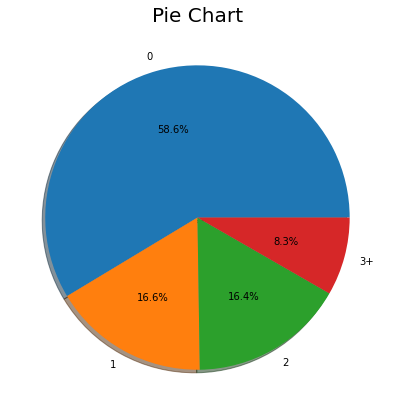

In [667]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Dependents'].value_counts().values,
        labels=df_train_new['Dependents'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

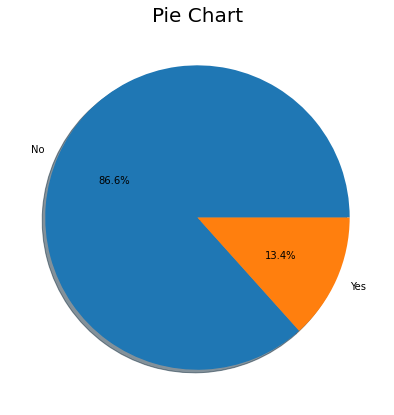

In [668]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Self_Employed'].value_counts().values,
        labels=df_train_new['Self_Employed'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

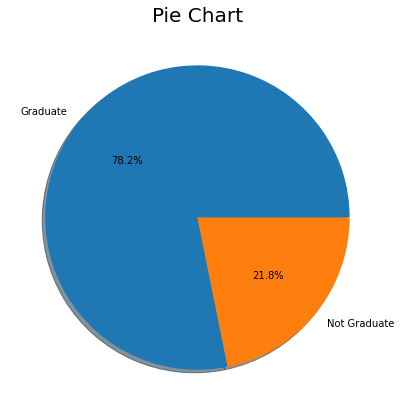

In [669]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Education'].value_counts().values,
        labels=df_train_new['Education'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

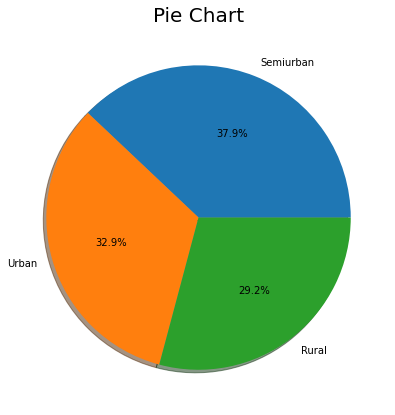

In [670]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Property_Area'].value_counts().values,
        labels=df_train_new['Property_Area'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0,0.0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

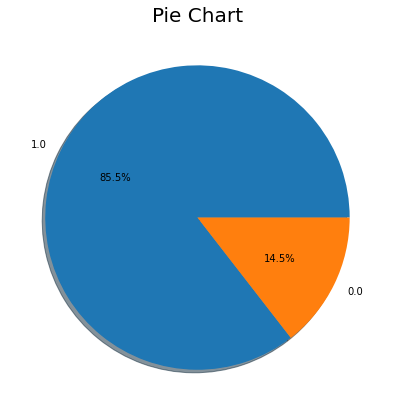

In [671]:
plt.figure(figsize=(7,7))
plt.pie(df_train_new['Credit_History'].value_counts().values,
        labels=df_train_new['Credit_History'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        explode=[0,0])
plt.title('Pie Chart',color='Black',fontsize=20)
plt.show()

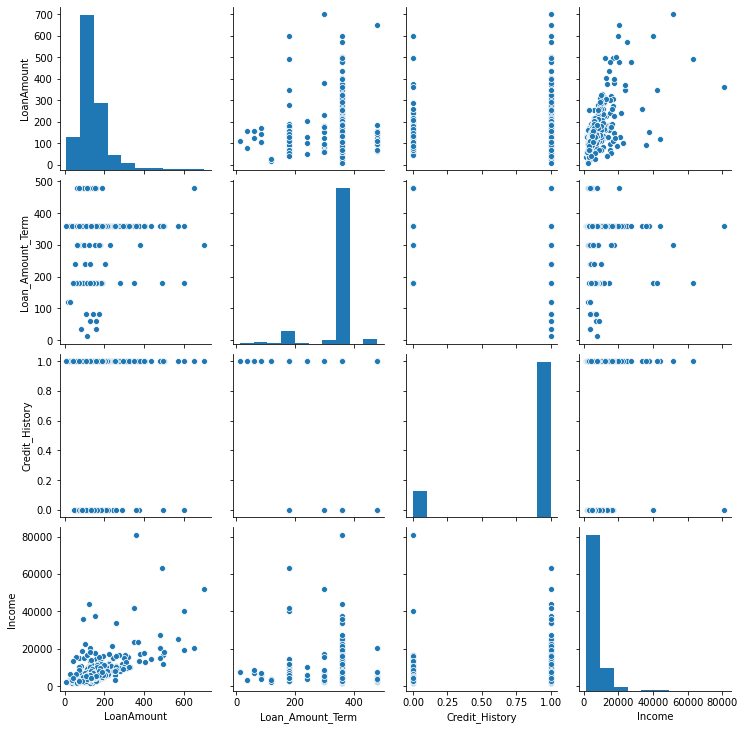

In [672]:
sns.pairplot(df_train_new)

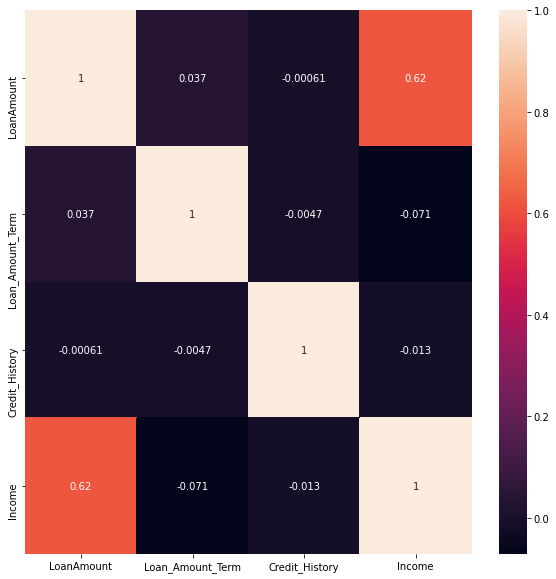

In [673]:
corrmat = df_train_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_train_new[top_corr_features].corr(),annot=True)

In [674]:
df_train_new1 = df_train_new.drop('Loan_ID',axis = 1)

In [675]:
df_train_new1['Loan_Status'].replace('N',0,inplace = True)
df_train_new1['Loan_Status'].replace('Y',1,inplace = True)

In [676]:
df_train_new1.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  Income  
0             360.0             1.0         Urban            1  5849.0  
1             360.0             1.0         Rural            0  6091.0  
2             360.0             1.0         Urban            1  3000.0  
3             360.0             1.0         Urban            1  4941.0  
4             360.0             1.0         Urban            1  6000.0

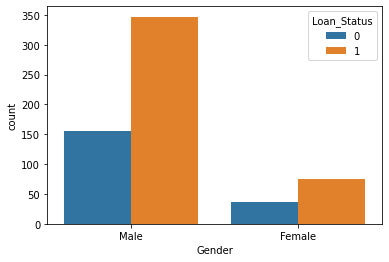

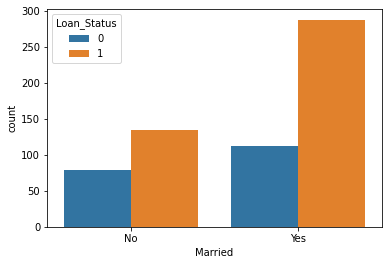

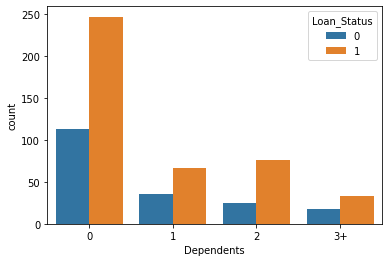

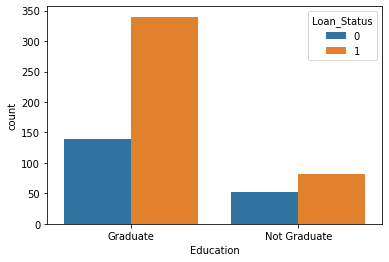

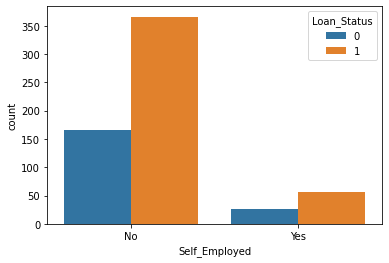

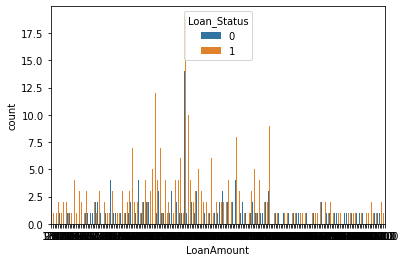

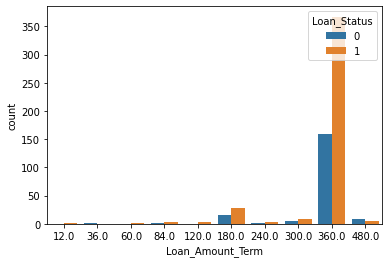

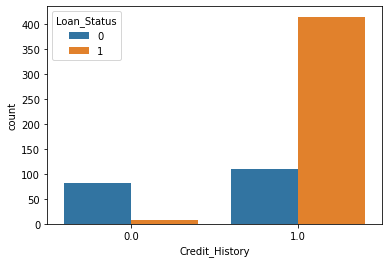

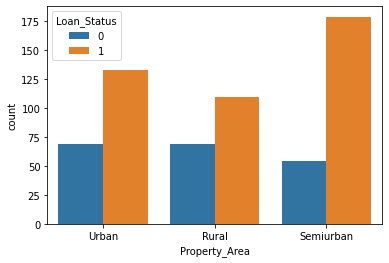

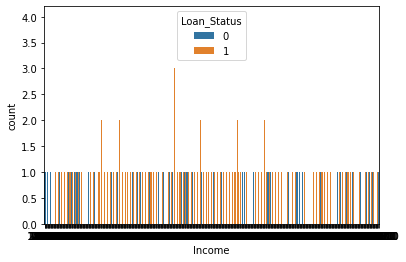

In [677]:
for i, predictor in enumerate(df_train_new1.drop(columns=['Loan_Status'])):
    plt.figure(i)
    sns.countplot(data=df_train_new1, x=predictor, hue='Loan_Status')

In [678]:
def plot_data(df_train_new1,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_train_new1[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df_train_new1[feature],dist='norm',plot=pylab)
    plt.show()

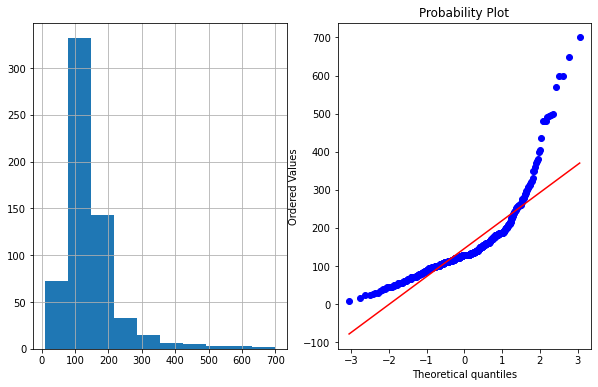

In [679]:
plot_data(df_train_new1,'LoanAmount')

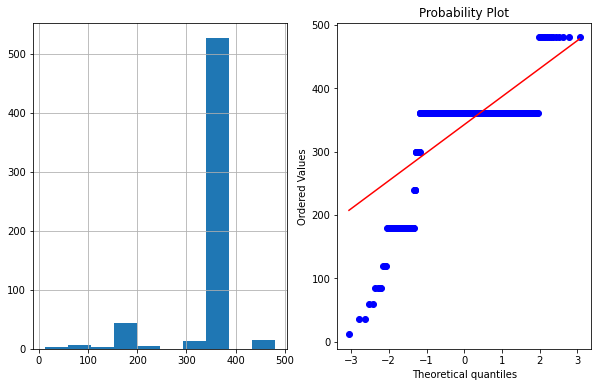

In [680]:
plot_data(df_train_new1,'Loan_Amount_Term')

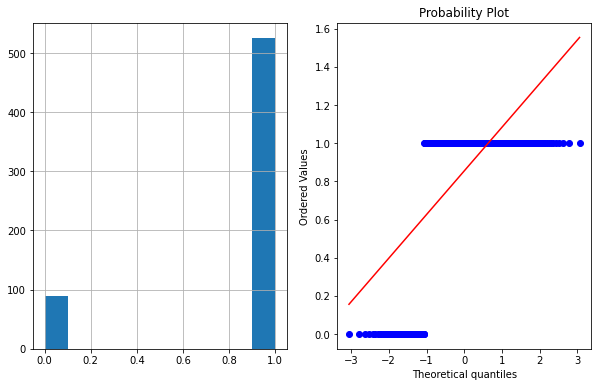

In [681]:
plot_data(df_train_new1,'Credit_History')

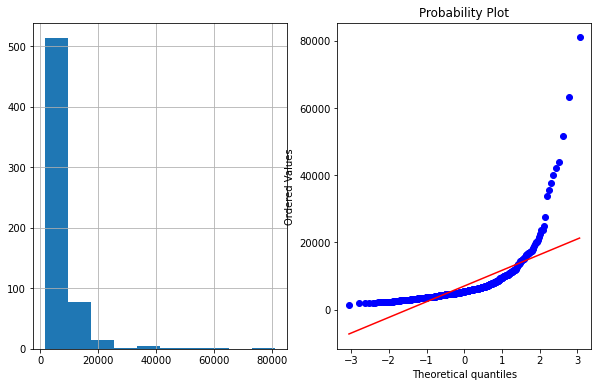

In [682]:
plot_data(df_train_new1,'Income')

In [683]:
df_train_new1.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  Income  
0             360.0             1.0         Urban            1  5849.0  
1             360.0             1.0         Rural            0  6091.0  
2             360.0             1.0         Urban            1  3000.0  
3             360.0             1.0         Urban            1  4941.0  
4             360.0             1.0         Urban            1  6000.0

#### Outliers Remove

In [684]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5+IQR)
    upper_range = Q3+(1.5+IQR)
    return lower_range,upper_range

In [685]:
upper_range,lower_range = remove_outliers(df_train_new1['LoanAmount'])
print(upper_range),print(lower_range)

34.25
230.75


(None, None)

In [686]:
df_train_new1['LoanAmount'] = np.where(df_train_new1['LoanAmount']<upper_range,upper_range,df_train_new1['LoanAmount'])
df_train_new1['LoanAmount'] = np.where(df_train_new1['LoanAmount']>lower_range,lower_range,df_train_new1['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

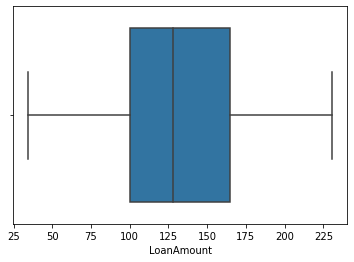

In [687]:
sns.boxplot(df_train_new1.LoanAmount)

In [688]:
upper_range,lower_range = remove_outliers(df_train_new1['Loan_Amount_Term'])
print(upper_range),print(lower_range)

358.5
361.5


(None, None)

In [689]:
df_train_new1['Loan_Amount_Term'] = np.where(df_train_new1['Loan_Amount_Term']<upper_range,upper_range,df_train_new1['Loan_Amount_Term'])
df_train_new1['Loan_Amount_Term'] = np.where(df_train_new1['Loan_Amount_Term']>lower_range,lower_range,df_train_new1['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

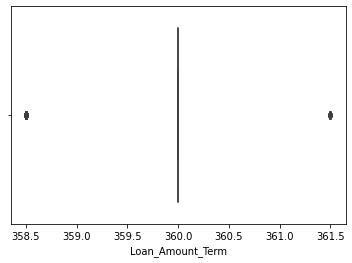

In [690]:
sns.boxplot(df_train_new1.Loan_Amount_Term)

In [691]:
upper_range,lower_range = remove_outliers(df_train_new1['Credit_History'])
print(upper_range),print(lower_range)

-0.5
2.5


(None, None)

In [692]:
df_train_new1['Credit_History'] = np.where(df_train_new1['Credit_History']<upper_range,upper_range,df_train_new1['Credit_History'])
df_train_new1['Credit_History'] = np.where(df_train_new1['Credit_History']>lower_range,lower_range,df_train_new1['Credit_History'])

<AxesSubplot:xlabel='Credit_History'>

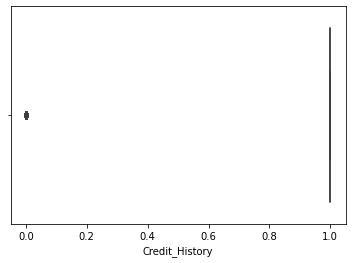

In [693]:
sns.boxplot(df_train_new1.Credit_History)

In [694]:
upper_range,lower_range = remove_outliers(df_train_new1['Income'])
print(upper_range),print(lower_range)

808.75
10879.0


(None, None)

In [695]:
df_train_new1['Income'] = np.where(df_train_new1['Income']<upper_range,upper_range,df_train_new1['Income'])
df_train_new1['Income'] = np.where(df_train_new1['Income']>lower_range,lower_range,df_train_new1['Income'])

<AxesSubplot:xlabel='Income'>

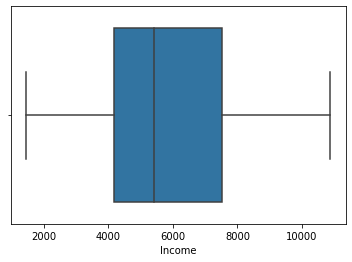

In [696]:
sns.boxplot(df_train_new1.Income)

(array([ 24.,  39.,  44., 107., 137.,  72.,  48.,  53.,  20.,  70.]),
 array([ 34.25,  53.9 ,  73.55,  93.2 , 112.85, 132.5 , 152.15, 171.8 ,
        191.45, 211.1 , 230.75]),
 <BarContainer object of 10 artists>)

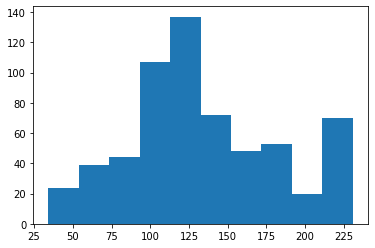

In [697]:
plt.hist(df_train_new1.LoanAmount)

(array([ 73.,   0.,   0.,   0.,   0., 526.,   0.,   0.,   0.,  15.]),
 array([358.5, 358.8, 359.1, 359.4, 359.7, 360. , 360.3, 360.6, 360.9,
        361.2, 361.5]),
 <BarContainer object of 10 artists>)

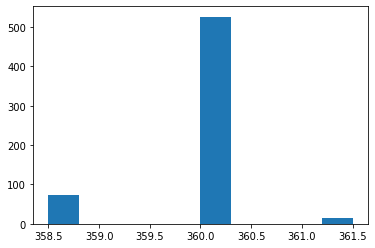

In [698]:
plt.hist(df_train_new1.Loan_Amount_Term)

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

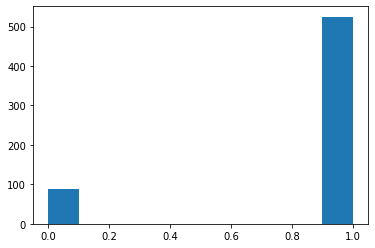

In [699]:
plt.hist(df_train_new1.Credit_History)

(array([ 16.,  52.,  97., 124.,  91.,  65.,  37.,  24.,  17.,  91.]),
 array([ 1442. ,  2385.7,  3329.4,  4273.1,  5216.8,  6160.5,  7104.2,
         8047.9,  8991.6,  9935.3, 10879. ]),
 <BarContainer object of 10 artists>)

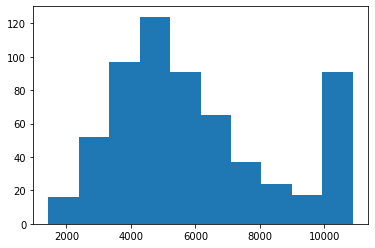

In [700]:
plt.hist(df_train_new1.Income)

In [701]:
df_train_new1.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  Income  
0             360.0             1.0         Urban            1  5849.0  
1             360.0             1.0         Rural            0  6091.0  
2             360.0             1.0         Urban            1  3000.0  
3             360.0             1.0         Urban            1  4941.0  
4             360.0             1.0         Urban            1  6000.0

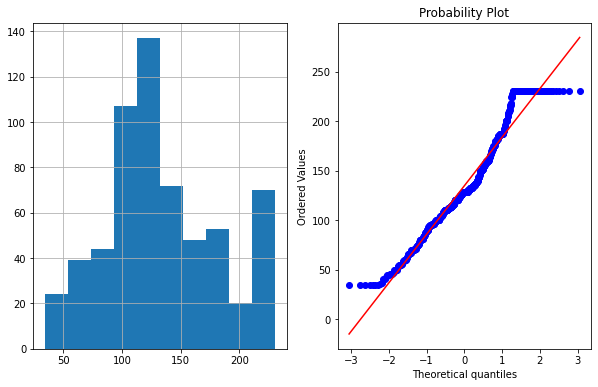

In [702]:
plot_data(df_train_new1,'LoanAmount')

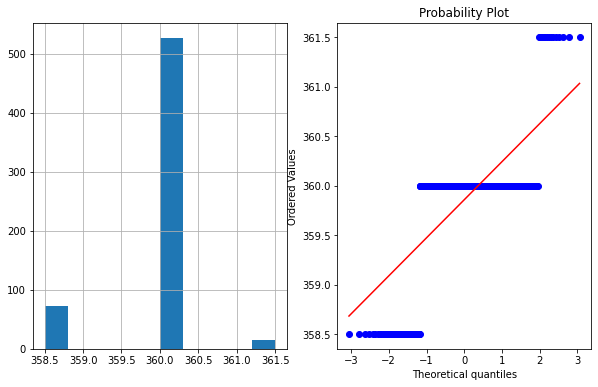

In [703]:
plot_data(df_train_new1,'Loan_Amount_Term')

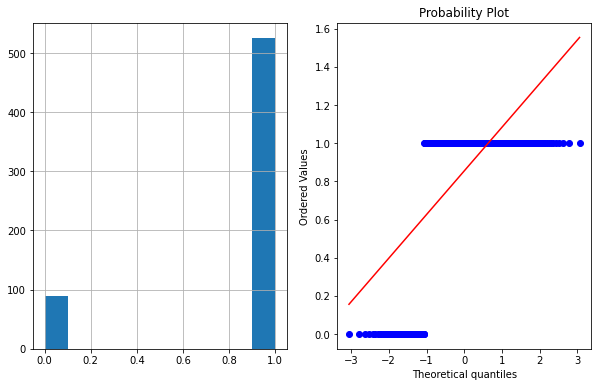

In [704]:
plot_data(df_train_new1,'Credit_History')

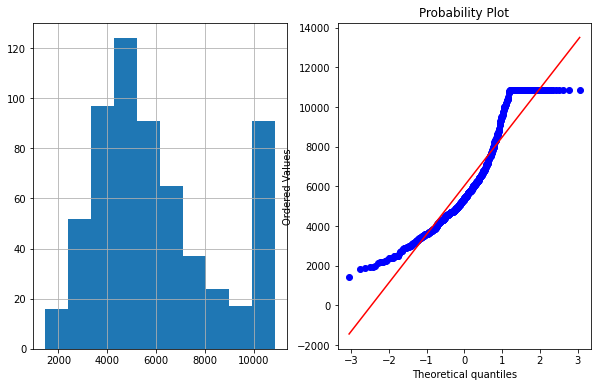

In [705]:
plot_data(df_train_new1,'Income')

In [706]:
df_train_new1.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [707]:
df_train_new1.corr()

LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
LoanAmount          1.000000          0.043705        0.001496    -0.044660   
Loan_Amount_Term    0.043705          1.000000        0.007481    -0.030060   
Credit_History      0.001496          0.007481        1.000000     0.540556   
Loan_Status        -0.044660         -0.030060        0.540556     1.000000   
Income              0.688096         -0.071114        0.034539     0.009745   

                    Income  
LoanAmount        0.688096  
Loan_Amount_Term -0.071114  
Credit_History    0.034539  
Loan_Status       0.009745  
Income            1.000000

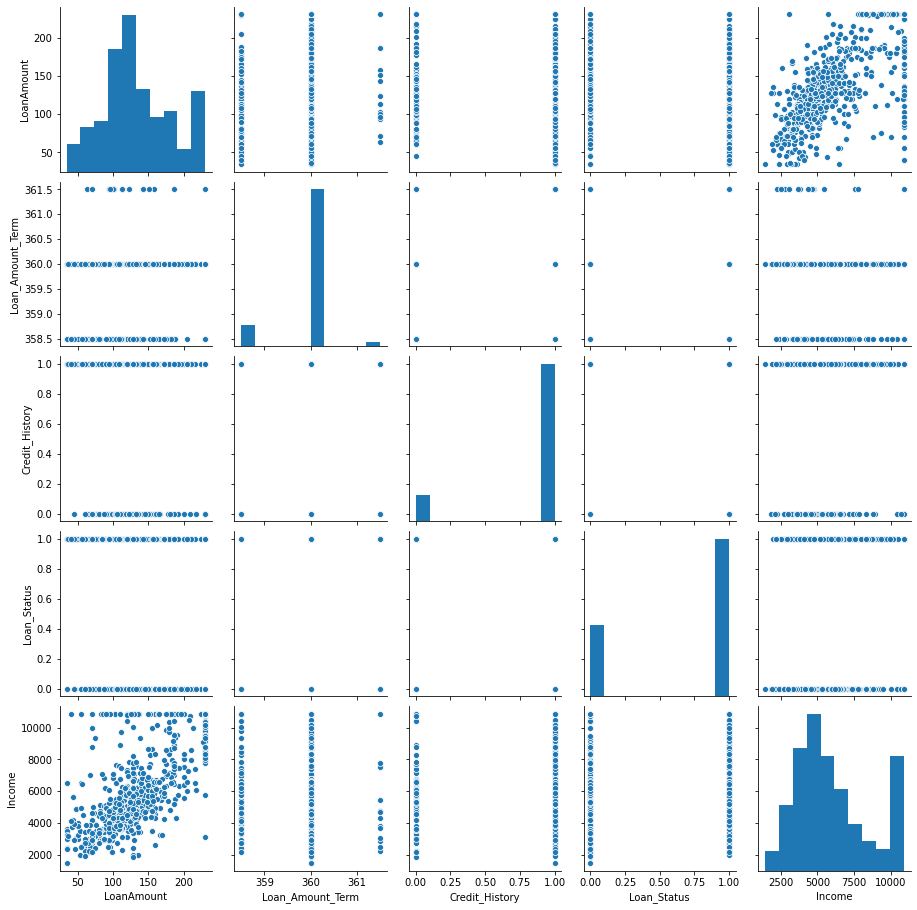

In [708]:
sns.pairplot(df_train_new1)

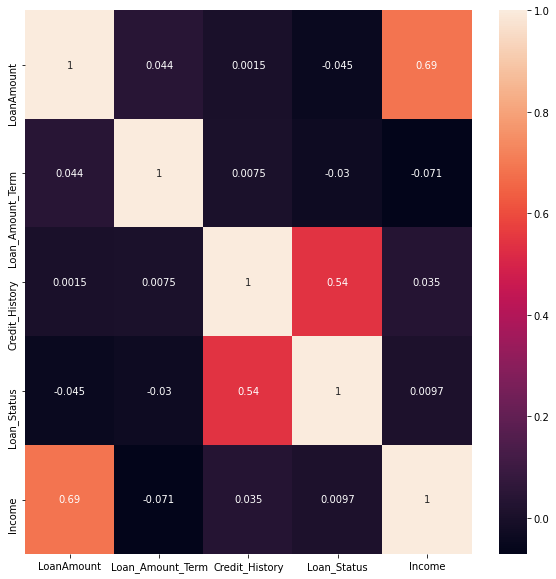

In [709]:
corrmat = df_train_new1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_train_new1[top_corr_features].corr(),annot=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

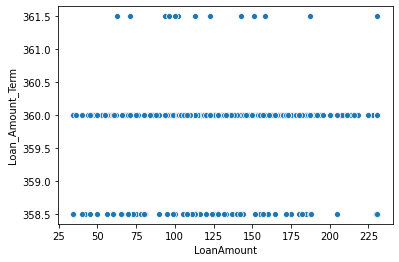

In [710]:
sns.scatterplot(data=df_train_new1, x='LoanAmount', y='Loan_Amount_Term')

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

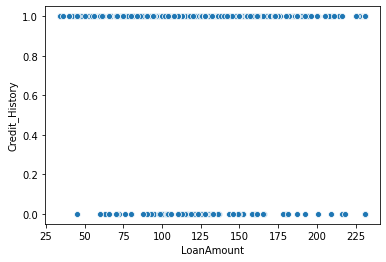

In [711]:
sns.scatterplot(data=df_train_new1, x='LoanAmount', y='Credit_History')

<AxesSubplot:xlabel='LoanAmount', ylabel='Income'>

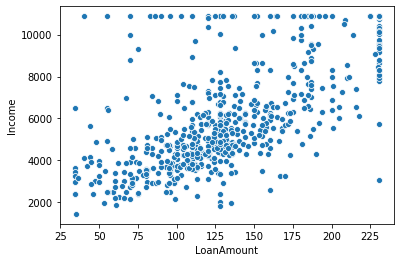

In [712]:
sns.scatterplot(data=df_train_new1, x='LoanAmount', y='Income')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

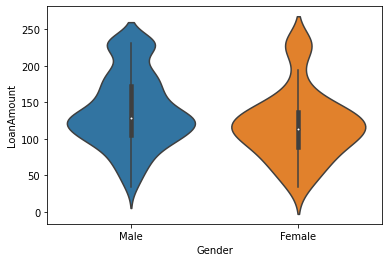

In [713]:
sns.violinplot(x='Gender', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

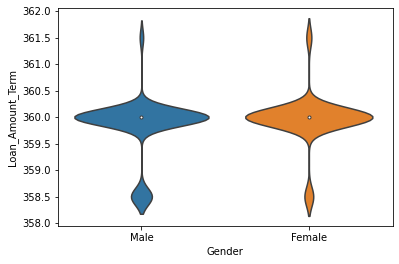

In [714]:
sns.violinplot(x='Gender', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

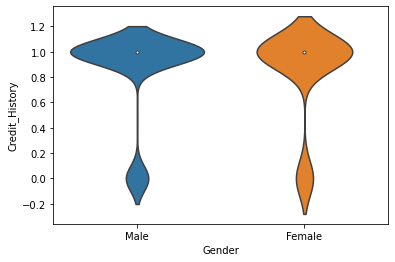

In [715]:
sns.violinplot(x='Gender', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

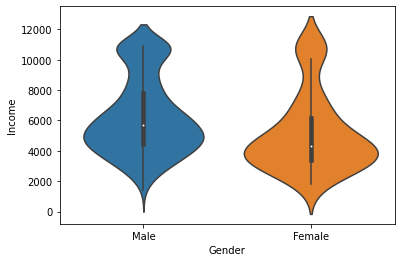

In [716]:
sns.violinplot(x='Gender', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

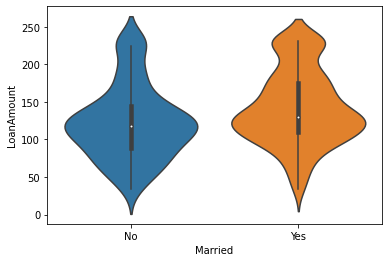

In [717]:
sns.violinplot(x='Married', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

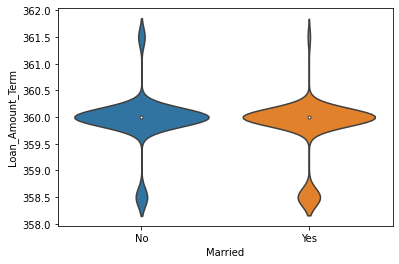

In [718]:
sns.violinplot(x='Married', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

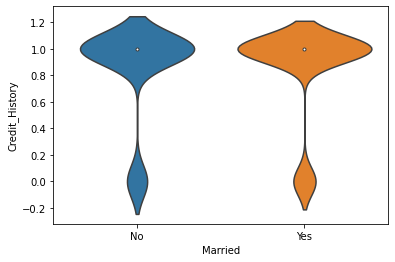

In [719]:
sns.violinplot(x='Married', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Income'>

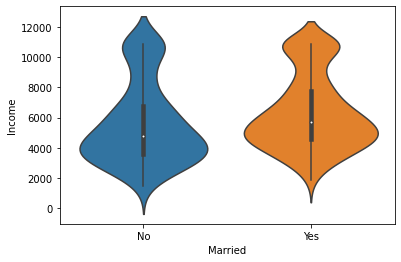

In [720]:
sns.violinplot(x='Married', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

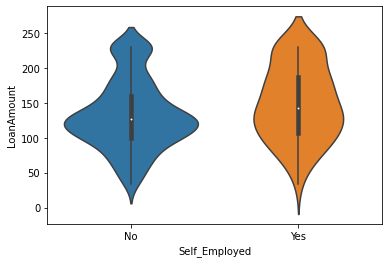

In [721]:
sns.violinplot(x='Self_Employed', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

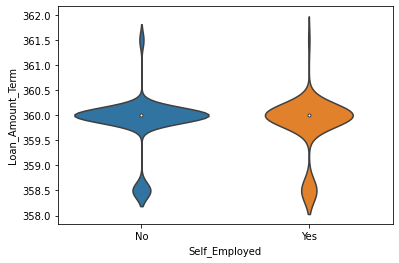

In [722]:
sns.violinplot(x='Self_Employed', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

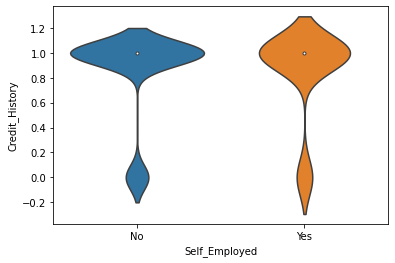

In [723]:
sns.violinplot(x='Self_Employed', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

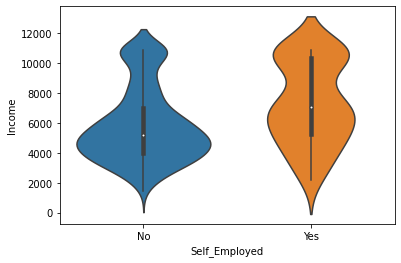

In [724]:
sns.violinplot(x='Self_Employed', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

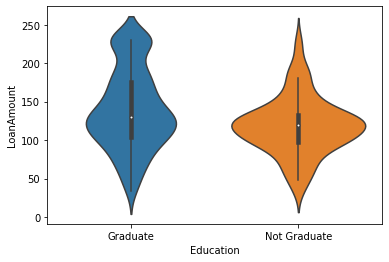

In [725]:
sns.violinplot(x='Education', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

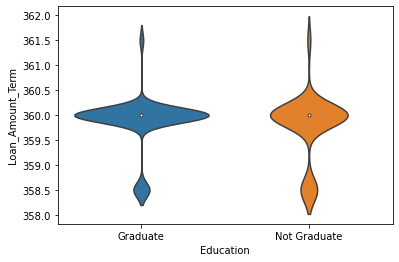

In [726]:
sns.violinplot(x='Education', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

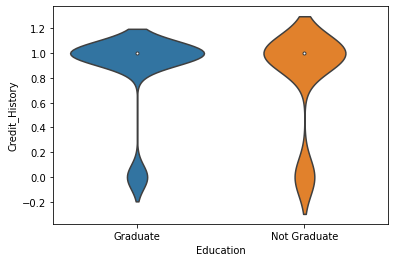

In [727]:
sns.violinplot(x='Education', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Income'>

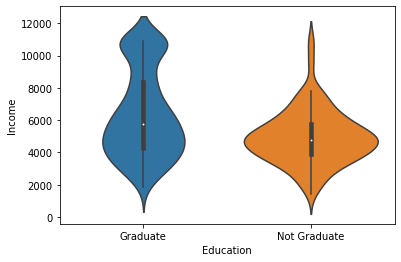

In [728]:
sns.violinplot(x='Education', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

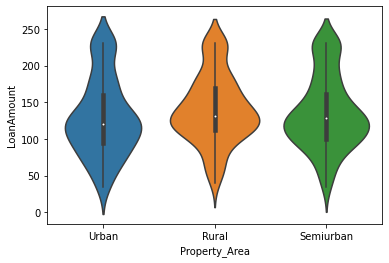

In [729]:
sns.violinplot(x='Property_Area', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

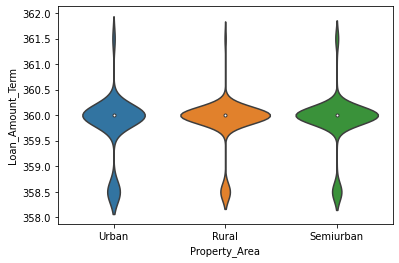

In [730]:
sns.violinplot(x='Property_Area', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

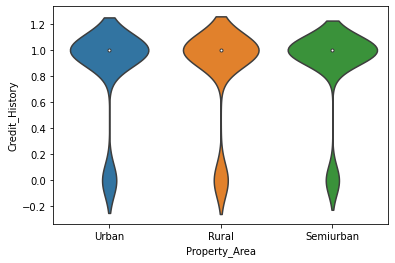

In [731]:
sns.violinplot(x='Property_Area', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Income'>

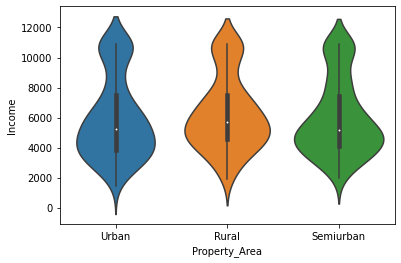

In [732]:
sns.violinplot(x='Property_Area', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

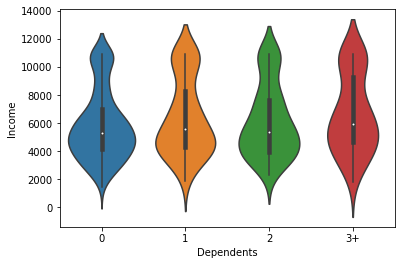

In [733]:
sns.violinplot(x='Dependents', y="Income", data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

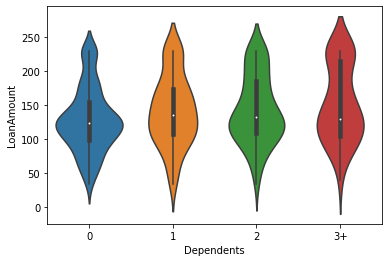

In [734]:
sns.violinplot(x='Dependents', y="LoanAmount", data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

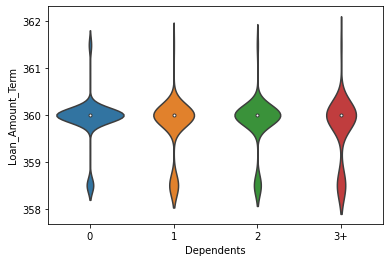

In [735]:
sns.violinplot(x='Dependents', y="Loan_Amount_Term", data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

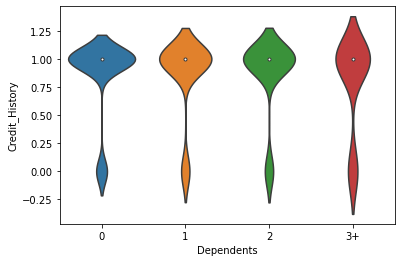

In [736]:
sns.violinplot(x='Dependents', y="Credit_History", data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

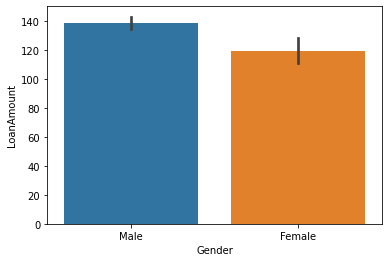

In [737]:
sns.barplot(x='Gender', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

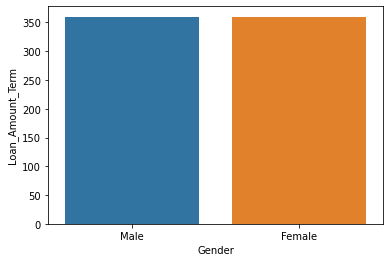

In [738]:
sns.barplot(x='Gender', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

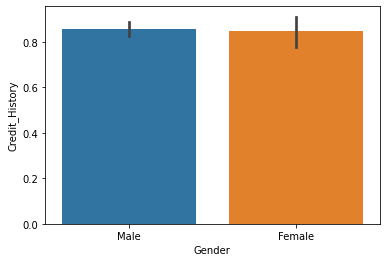

In [739]:
sns.barplot(x='Gender', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

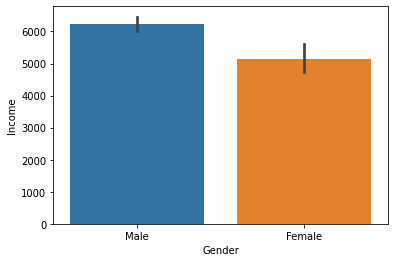

In [740]:
sns.barplot(x='Gender', y='Income', data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

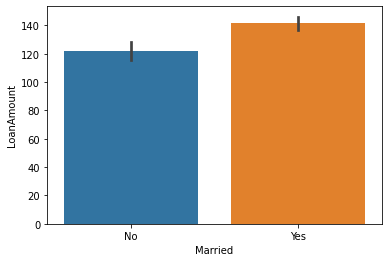

In [741]:
sns.barplot(x='Married', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

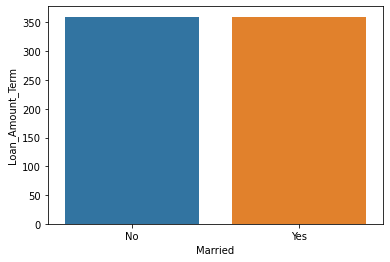

In [742]:
sns.barplot(x='Married', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

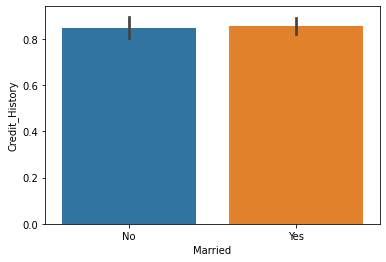

In [743]:
sns.barplot(x='Married', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Married', ylabel='Income'>

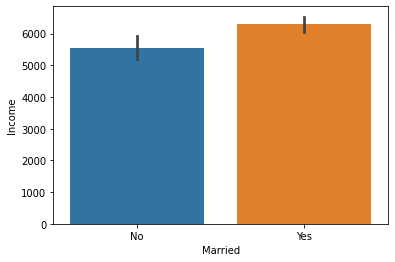

In [744]:
sns.barplot(x='Married', y='Income', data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

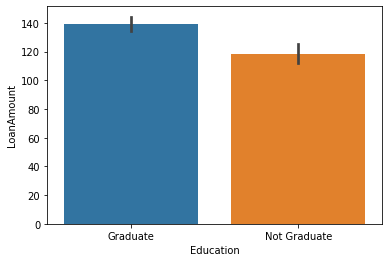

In [745]:
sns.barplot(x='Education', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

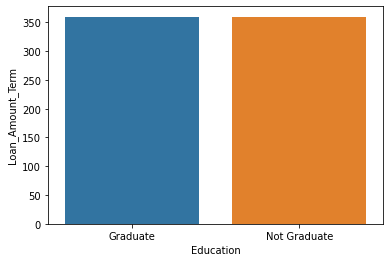

In [746]:
sns.barplot(x='Education', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Credit_History'>

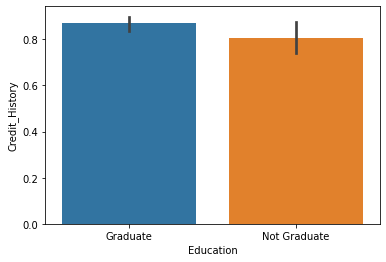

In [747]:
sns.barplot(x='Education', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Education', ylabel='Income'>

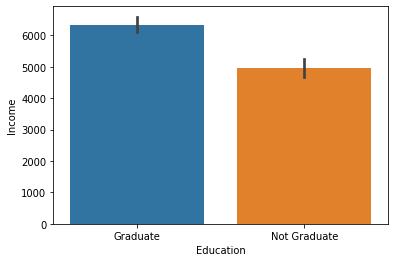

In [748]:
sns.barplot(x='Education', y='Income', data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

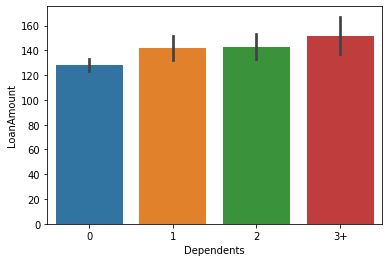

In [749]:
sns.barplot(x='Dependents', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

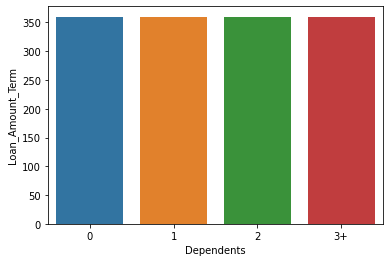

In [750]:
sns.barplot(x='Dependents', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Credit_History'>

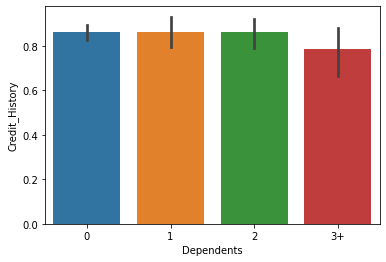

In [751]:
sns.barplot(x='Dependents', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Dependents', ylabel='Income'>

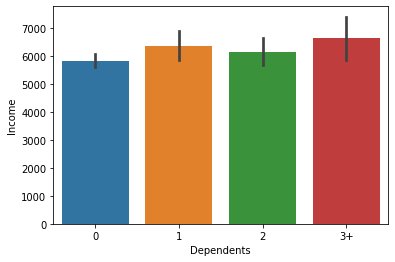

In [752]:
sns.barplot(x='Dependents', y='Income', data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

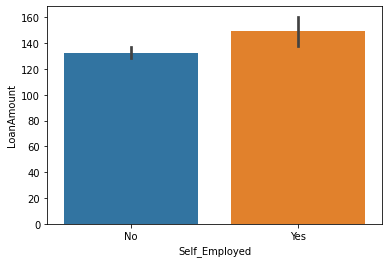

In [753]:
sns.barplot(x='Self_Employed', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

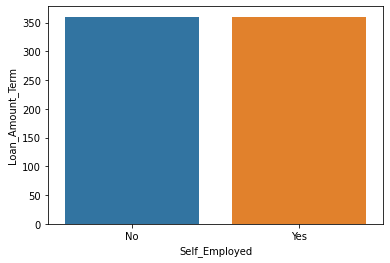

In [754]:
sns.barplot(x='Self_Employed', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>

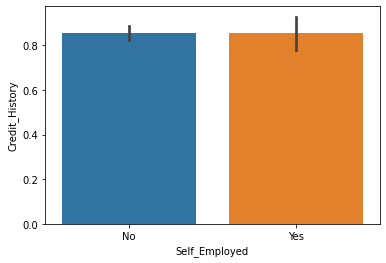

In [755]:
sns.barplot(x='Self_Employed', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Self_Employed', ylabel='Income'>

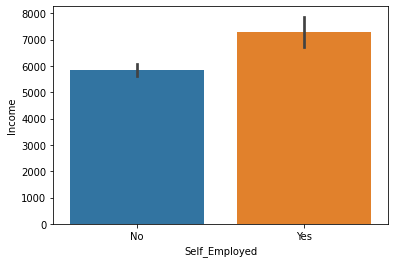

In [756]:
sns.barplot(x='Self_Employed', y='Income', data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

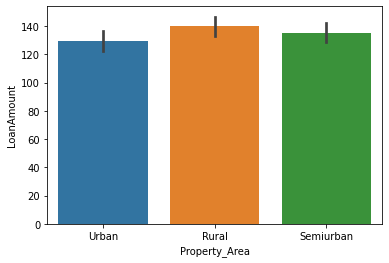

In [757]:
sns.barplot(x='Property_Area', y='LoanAmount', data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

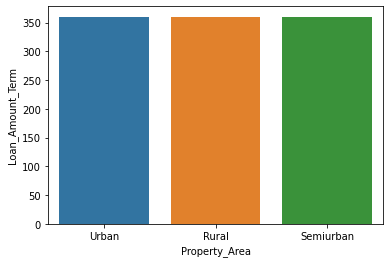

In [758]:
sns.barplot(x='Property_Area', y='Loan_Amount_Term', data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

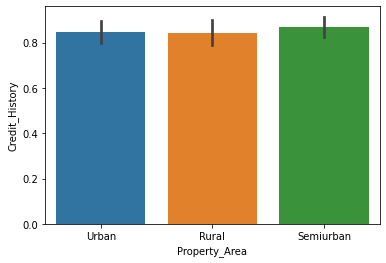

In [759]:
sns.barplot(x='Property_Area', y='Credit_History', data=df_train_new1)

<AxesSubplot:xlabel='Property_Area', ylabel='Income'>

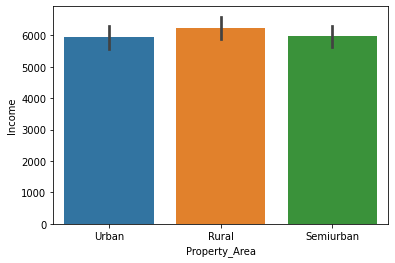

In [760]:
sns.barplot(x = 'Property_Area' , y = 'Income',data = df_train_new1)

In [761]:
df_train_new1.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  Income  
0             360.0             1.0         Urban            1  5849.0  
1             360.0             1.0         Rural            0  6091.0  
2             360.0             1.0         Urban            1  3000.0  
3             360.0             1.0         Urban            1  4941.0  
4             360.0             1.0         Urban            1  6000.0

In [762]:
df_train_new1.skew()

LoanAmount          0.381950
Loan_Amount_Term   -1.129835
Credit_History     -2.021971
Loan_Status        -0.809998
Income              0.669141
dtype: float64

In [763]:
df_train_new1.kurt()

LoanAmount         -0.441980
Loan_Amount_Term    3.407544
Credit_History      2.095179
Loan_Status        -1.348306
Income             -0.619423
dtype: float64

In [764]:
df_train_new1.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  Income  
0             360.0             1.0         Urban            1  5849.0  
1             360.0             1.0         Rural            0  6091.0  
2             360.0             1.0         Urban            1  3000.0  
3             360.0             1.0         Urban            1  4941.0  
4             360.0             1.0         Urban            1  6000.0

In [765]:
df_train_new1.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [766]:
df_train_new1['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [767]:
X = df_train_new1.drop('Loan_Status',axis = 1)

In [768]:
X.head()

Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No       128.0   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Income  
0             360.0             1.0         Urban  5849.0  
1             360.0             1.0         Rural  6091.0  
2             360.0             1.0         Urban  3000.0  
3             360.0             1.0         Urban  4941.0  
4             360.0             1.0         Urban  6000.0

In [769]:
y = df_train_new1['Loan_Status']

In [770]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [771]:
X1 = pd.get_dummies(X,drop_first = True)

In [772]:
X1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       128.0             360.0             1.0  5849.0            1   
1       128.0             360.0             1.0  6091.0            1   
2        66.0             360.0             1.0  3000.0            1   
3       120.0             360.0             1.0  4941.0            1   
4       141.0             360.0             1.0  6000.0            1   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0            0             0             0              0   
1            1             1             0              0   
2            1             0             0              0   
3            1             0             0              0   
4            0             0             0              0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  1                        0   
3                       1                  0                        0   
4                       0                  0                        0   

   Property_Area_Urban  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1

In [773]:
X1.shape

(614, 13)

In [774]:
X1['Education_Not_Graduate'] = X1['Education_Not Graduate']
X1['Dependents_3'] = X1['Dependents_3+']

In [775]:
X1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       128.0             360.0             1.0  5849.0            1   
1       128.0             360.0             1.0  6091.0            1   
2        66.0             360.0             1.0  3000.0            1   
3       120.0             360.0             1.0  4941.0            1   
4       141.0             360.0             1.0  6000.0            1   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0            0             0             0              0   
1            1             1             0              0   
2            1             0             0              0   
3            1             0             0              0   
4            0             0             0              0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  1                        0   
3                       1                  0                        0   
4                       0                  0                        0   

   Property_Area_Urban  Education_Not_Graduate  Dependents_3  
0                    1                       0             0  
1                    0                       0             0  
2                    1                       0             0  
3                    1                       1             0  
4                    1                       0             0

In [776]:
X1 = X1.drop(['Education_Not Graduate' , 'Dependents_3+'],axis = 1,inplace = False)

In [777]:
X1.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       128.0             360.0             1.0  5849.0            1   
1       128.0             360.0             1.0  6091.0            1   
2        66.0             360.0             1.0  3000.0            1   
3       120.0             360.0             1.0  4941.0            1   
4       141.0             360.0             1.0  6000.0            1   

   Married_Yes  Dependents_1  Dependents_2  Self_Employed_Yes  \
0            0             0             0                  0   
1            1             1             0                  0   
2            1             0             0                  1   
3            1             0             0                  0   
4            0             0             0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Education_Not_Graduate  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    1                       0   
3                        0                    1                       1   
4                        0                    1                       0   

   Dependents_3  
0             0  
1             0  
2             0  
3             0  
4             0

In [778]:
X2 = X1.copy()

In [779]:
X2.head()

LoanAmount  Loan_Amount_Term  Credit_History  Income  Gender_Male  \
0       128.0             360.0             1.0  5849.0            1   
1       128.0             360.0             1.0  6091.0            1   
2        66.0             360.0             1.0  3000.0            1   
3       120.0             360.0             1.0  4941.0            1   
4       141.0             360.0             1.0  6000.0            1   

   Married_Yes  Dependents_1  Dependents_2  Self_Employed_Yes  \
0            0             0             0                  0   
1            1             1             0                  0   
2            1             0             0                  1   
3            1             0             0                  0   
4            0             0             0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Education_Not_Graduate  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    1                       0   
3                        0                    1                       1   
4                        0                    1                       0   

   Dependents_3  
0             0  
1             0  
2             0  
3             0  
4             0

In [780]:
from imblearn.over_sampling import RandomOverSampler

In [781]:
from collections import Counter

In [782]:
ros = RandomOverSampler(random_state = 42)

In [783]:
X_ros,y_ros = ros.fit_resample(X2,y)

In [784]:
print('original dataset shape', Counter(y))

original dataset shape Counter({1: 422, 0: 192})


In [785]:
print('Resample dataset shape', Counter(y_ros))

Resample dataset shape Counter({1: 422, 0: 422})


In [786]:
from sklearn.model_selection import train_test_split

In [787]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_ros,y_ros,test_size = 0.3,random_state = 100 , stratify = y_ros)

##### Feture Selection

In [788]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [789]:
best_feature = SelectKBest(score_func = chi2,k = 13)

In [790]:
fit = best_feature.fit(X1,y)

In [791]:
X1scores = pd.DataFrame(fit.scores_,columns = ['Score'])

In [792]:
X1columns = pd.DataFrame(X1.columns)

In [793]:
features_rank = pd.concat([X1columns,X1scores],axis = 1)

In [794]:
features_rank.columns = ['feature','Score']

In [795]:
features_rank.nlargest(13,'Score')

feature      Score
3                    Income  62.731327
2            Credit_History  26.005877
0                LoanAmount  22.631446
9   Property_Area_Semiurban   7.103093
11   Education_Not_Graduate   3.540502
7              Dependents_2   1.996446
5               Married_Yes   1.782425
10      Property_Area_Urban   0.783946
6              Dependents_1   0.768400
12             Dependents_3   0.384200
4               Gender_Male   0.036234
8         Self_Employed_Yes   0.007285
1          Loan_Amount_Term   0.000466

In [796]:
from sklearn.ensemble import ExtraTreesClassifier

In [797]:
model = ExtraTreesClassifier()

In [798]:
model

ExtraTreesClassifier()

In [799]:
model.fit(X1,y)

ExtraTreesClassifier()

In [800]:
print(model.feature_importances_)

[0.2217293  0.04220597 0.27285672 0.23599636 0.02790238 0.02551095
 0.02444309 0.0175887  0.03143617 0.0289111  0.02559037 0.02726573
 0.01856315]


In [801]:
rank_features = pd.Series(model.feature_importances_,index = X1.columns)

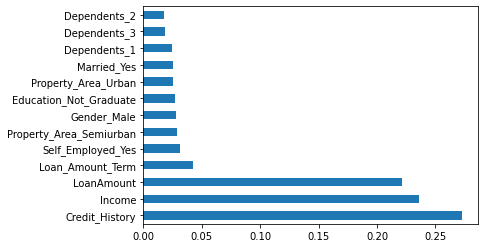

In [802]:
rank_features.nlargest(13,keep = 'first').plot(kind = 'barh')
plt.show()

In [803]:
corr = X1.corr()

<AxesSubplot:>

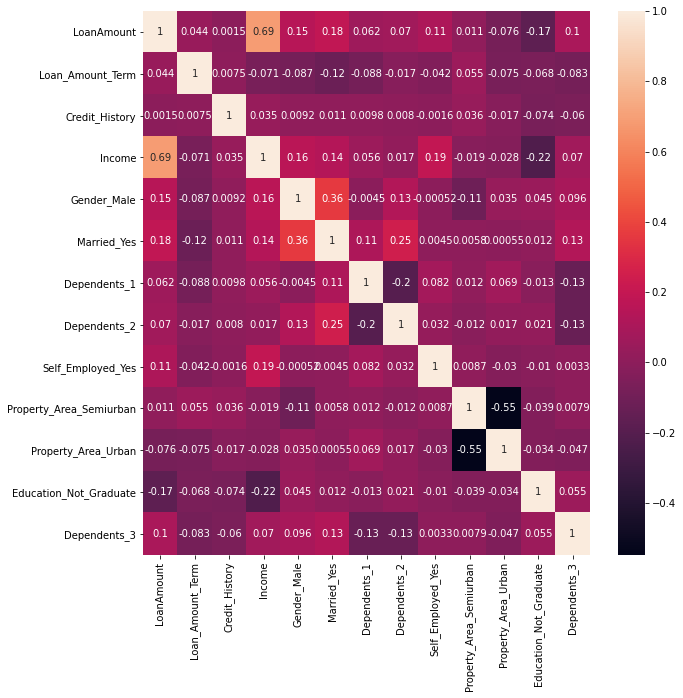

In [804]:
top_features = corr.index
plt.figure(figsize = (10,10))
sns.heatmap(X1[top_features].corr(),annot = True)

In [805]:
X1 = X1[['Credit_History','Income','LoanAmount','Loan_Amount_Term','Property_Area_Semiurban','Education_Not_Graduate','Property_Area_Urban','Married_Yes','Dependents_2','Dependents_1','Dependents_3']]

In [806]:
X1.head()

Credit_History  Income  LoanAmount  Loan_Amount_Term  \
0             1.0  5849.0       128.0             360.0   
1             1.0  6091.0       128.0             360.0   
2             1.0  3000.0        66.0             360.0   
3             1.0  4941.0       120.0             360.0   
4             1.0  6000.0       141.0             360.0   

   Property_Area_Semiurban  Education_Not_Graduate  Property_Area_Urban  \
0                        0                       0                    1   
1                        0                       0                    0   
2                        0                       0                    1   
3                        0                       1                    1   
4                        0                       0                    1   

   Married_Yes  Dependents_2  Dependents_1  Dependents_3  
0            0             0             0             0  
1            1             0             1             0  
2            1             0             0             0  
3            1             0             0             0  
4            0             0             0             0

In [807]:
X1.shape

(614, 11)

In [808]:
ros1 = RandomOverSampler(random_state = 40)

In [809]:
X_ros1,y_ros1 = ros1.fit_resample(X1,y)

In [810]:
print('original dataset shape', Counter(y))

original dataset shape Counter({1: 422, 0: 192})


In [811]:
print('Resample dataset shape', Counter(y_ros1))

Resample dataset shape Counter({1: 422, 0: 422})


In [812]:
x_train,x_test,y_train,y_test = train_test_split(X_ros1,y_ros1,test_size = 0.3,random_state = 100,stratify = y_ros1)

In [813]:
x_train.shape

(590, 11)

In [814]:
y_train.shape

(590,)

#### Model Building
1. Decision Tree Model

In [815]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [816]:
from sklearn.tree import DecisionTreeClassifier

In [817]:
from sklearn.metrics import accuracy_score

In [818]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [819]:
model = DecisionTreeClassifier(criterion = 'entropy',max_features = 'sqrt' , min_samples_split = 10 , random_state = 100)

In [820]:
model.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=10, random_state=100)

In [821]:
model.score(x_train1,y_train1)

0.8593220338983051

In [822]:
pred1 = model.predict(x_test1)

In [823]:
accuracy_score(y_test1,pred1)

0.7362204724409449

In [824]:
print(confusion_matrix(y_test1, pred1))

[[107  20]
 [ 47  80]]


In [825]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       127
           1       0.80      0.63      0.70       127

    accuracy                           0.74       254
   macro avg       0.75      0.74      0.73       254
weighted avg       0.75      0.74      0.73       254



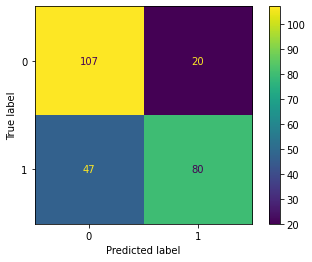

In [826]:
plot_confusion_matrix(model,x_test1,y_test1)

In [827]:
pred_test1 = model.predict(T1)

In [828]:
pred_test1

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [829]:
dt_rmse = sqrt(mean_squared_error(y_test1, pred1))
print(dt_rmse)

0.5135947113815086


In [830]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_features = 'sqrt' , min_samples_split = 10 , random_state = 100)

In [831]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=10, random_state=100)

In [832]:
model1.score(x_train,y_train)

0.8796610169491526

In [833]:
pred = model1.predict(x_test)

In [834]:
accuracy_score(y_test,pred)

0.7283464566929134

In [835]:
print(confusion_matrix(y_test, pred))

[[97 30]
 [39 88]]


In [836]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       127
           1       0.75      0.69      0.72       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



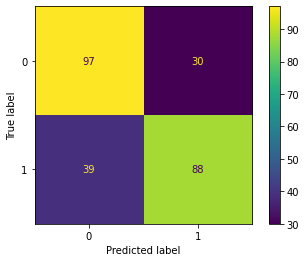

In [837]:
plot_confusion_matrix(model1,x_test,y_test)

In [838]:
pred_test = model1.predict(T2)

In [839]:
pred_test

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [840]:
dt2_rmse = sqrt(mean_squared_error(y_test,pred))
print(dt2_rmse)

0.5212039363887102


2. Random Forest

In [841]:
from sklearn.ensemble import RandomForestClassifier

In [842]:
rf = RandomForestClassifier(criterion='gini',min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto')

In [843]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [844]:
rf.score(x_train,y_train)

0.9966101694915255

In [845]:
rf_pred = rf.predict(x_test)

In [846]:
accuracy_score(y_test,rf_pred)

0.8188976377952756

In [847]:
print(confusion_matrix(y_test, rf_pred))

[[107  20]
 [ 26 101]]


In [848]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       127
           1       0.83      0.80      0.81       127

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



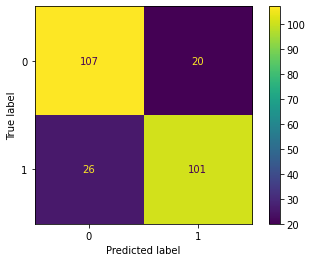

In [849]:
plot_confusion_matrix(rf,x_test,y_test)

In [850]:
rf_pred_test = rf.predict(T2)

In [851]:
rf_pred_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [852]:
rf_rmse = sqrt(mean_squared_error(y_test,rf_pred))
print(rf_rmse)

0.4255612320274539


3. XGBoost

In [853]:
from xgboost import XGBClassifier

In [854]:
xg = XGBClassifier()

In [855]:
xg.fit(x_train,y_train)

[11:40:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [856]:
xg.score(x_train,y_train)

0.9949152542372881

In [857]:
xg_pred = xg.predict(x_test)

In [858]:
accuracy_score(y_test,xg_pred)

0.8228346456692913

In [859]:
print(confusion_matrix(y_test, xg_pred))

[[107  20]
 [ 25 102]]


In [860]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       127
           1       0.84      0.80      0.82       127

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



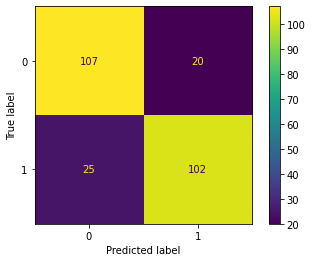

In [861]:
plot_confusion_matrix(xg,x_test,y_test)

In [862]:
xg_pred_test = xg.predict(T2)

In [863]:
xg_pred_test

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [864]:
xg_rmse = sqrt(mean_squared_error(y_test,xg_pred))
print(xg_rmse)

0.4209101499497353


4.GradientBoosting

In [865]:
from sklearn.ensemble import GradientBoostingClassifier

In [866]:
gb = GradientBoostingClassifier()

In [867]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [868]:
gb.score(x_train,y_train)

0.923728813559322

In [869]:
gb_pred = gb.predict(x_test)

In [870]:
accuracy_score(y_test , gb_pred)

0.7755905511811023

In [871]:
print(confusion_matrix(y_test,gb_pred))

[[ 96  31]
 [ 26 101]]


In [872]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       127
           1       0.77      0.80      0.78       127

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



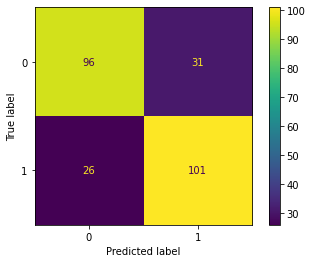

In [873]:
plot_confusion_matrix(gb,x_test,y_test)

In [874]:
gb_pred_test = gb.predict(T2)

In [875]:
gb_pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [876]:
gb_rmse = sqrt(mean_squared_error(y_test,gb_pred))
print(gb_rmse)

0.47371874442426026


5. Logistic Regression

In [877]:
X = X1.copy()

In [878]:
X.head()

Credit_History  Income  LoanAmount  Loan_Amount_Term  \
0             1.0  5849.0       128.0             360.0   
1             1.0  6091.0       128.0             360.0   
2             1.0  3000.0        66.0             360.0   
3             1.0  4941.0       120.0             360.0   
4             1.0  6000.0       141.0             360.0   

   Property_Area_Semiurban  Education_Not_Graduate  Property_Area_Urban  \
0                        0                       0                    1   
1                        0                       0                    0   
2                        0                       0                    1   
3                        0                       1                    1   
4                        0                       0                    1   

   Married_Yes  Dependents_2  Dependents_1  Dependents_3  
0            0             0             0             0  
1            1             0             1             0  
2            1             0             0             0  
3            1             0             0             0  
4            0             0             0             0

In [879]:
X.shape

(614, 11)

In [880]:
min_max_scaler = preprocessing.MinMaxScaler()

In [881]:
min_max_scaler

MinMaxScaler()

In [882]:
X['LoanAmount'] = min_max_scaler.fit_transform(X[['LoanAmount']])

In [883]:
X['Loan_Amount_Term'] = min_max_scaler.fit_transform(X[['Loan_Amount_Term']])

In [884]:
X['Credit_History'] = min_max_scaler.fit_transform(X[['Credit_History']])

In [885]:
X['Income'] = min_max_scaler.fit_transform(X[['Income']])

In [886]:
X.head()

Credit_History    Income  LoanAmount  Loan_Amount_Term  \
0             1.0  0.466992    0.477099               0.5   
1             1.0  0.492635    0.477099               0.5   
2             1.0  0.165095    0.161578               0.5   
3             1.0  0.370775    0.436387               0.5   
4             1.0  0.482992    0.543257               0.5   

   Property_Area_Semiurban  Education_Not_Graduate  Property_Area_Urban  \
0                        0                       0                    1   
1                        0                       0                    0   
2                        0                       0                    1   
3                        0                       1                    1   
4                        0                       0                    1   

   Married_Yes  Dependents_2  Dependents_1  Dependents_3  
0            0             0             0             0  
1            1             0             1             0  
2            1             0             0             0  
3            1             0             0             0  
4            0             0             0             0

In [887]:
ROS = RandomOverSampler(random_state = 40)

In [888]:
X_ROS,Y_ROS = ros1.fit_resample(X,y)

In [889]:
print('Original dataset shape',Counter(y))

Original dataset shape Counter({1: 422, 0: 192})


In [890]:
print('Resample dataset shape',Counter(Y_ROS))

Resample dataset shape Counter({1: 422, 0: 422})


In [891]:
X_train,X_test,Y_train,Y_test = train_test_split(X_ROS,Y_ROS,test_size = 0.3,random_state = 100,stratify = Y_ROS)

In [892]:
from sklearn.linear_model import LogisticRegression

In [893]:
logit_model = LogisticRegression()

In [894]:
logit_model.fit(X_train,Y_train)

LogisticRegression()

In [895]:
logit_model.score(X_train,Y_train)

0.7288135593220338

In [896]:
lr_pred = logit_model.predict(X_test)

In [897]:
accuracy_score(Y_test,lr_pred)

0.6850393700787402

In [898]:
print(confusion_matrix(Y_test,lr_pred))

[[76 51]
 [29 98]]


In [899]:
print(classification_report(Y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66       127
           1       0.66      0.77      0.71       127

    accuracy                           0.69       254
   macro avg       0.69      0.69      0.68       254
weighted avg       0.69      0.69      0.68       254



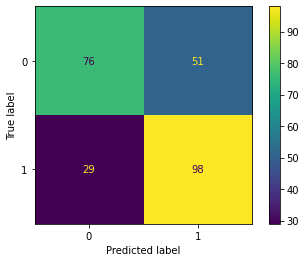

In [900]:
plot_confusion_matrix(logit_model,X_test,Y_test)

In [901]:
lr_pred_test = logit_model.predict(T2)

In [902]:
#lr_pred_test

In [903]:
lr_rmse = sqrt(mean_squared_error(Y_test, lr_pred))
print(lr_rmse)

0.5612135332663137


In [904]:
abc=[]
classifiers=['Decision Tree','Random Forest','XGBClassifier','GradientBoostingClassifier','Logistic Regression']
models=[LogisticRegression(),DecisionTreeClassifier(criterion = 'entropy',max_features = 'sqrt' , min_samples_split = 10 , random_state = 100), 
        RandomForestClassifier(), XGBClassifier(),GradientBoostingClassifier()]
for i in models:
    model = i
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

[11:40:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy
XGBClassifier               0.822835
GradientBoostingClassifier  0.822835
Logistic Regression         0.775591
Random Forest               0.728346
Decision Tree               0.677165

#### Hyperparameter Tunning

Randomized Search Cv

1.Random Forest

In [905]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [906]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [907]:
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [908]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [909]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [910]:
best_random_grid=rf_randomcv.best_estimator_

In [911]:
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[105  22]
 [ 22 105]]
Accuracy Score 0.8267716535433071
Classification report:               precision    recall  f1-score   support

           0       0.83      0.83      0.83       127
           1       0.83      0.83      0.83       127

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



2.Decision Tree

In [912]:
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid_dt = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid_dt)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [913]:
dt = DecisionTreeClassifier()
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid_dt,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [914]:
dt_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [915]:
dt_randomcv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'entropy'}

In [916]:
dt_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [917]:
best_random_grid_dt=dt_randomcv.best_estimator_

In [918]:
y_pred_dt=best_random_grid_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_dt)))
print("Classification report:{}".format(classification_report(y_test,y_pred_dt)))

[[110  17]
 [ 32  95]]
Accuracy Score 0.8070866141732284
Classification report:              precision    recall  f1-score   support

           0       0.77      0.87      0.82       127
           1       0.85      0.75      0.79       127

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



3.XGBoost

In [919]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt','log2']
# max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# min_samples_split = [2, 5, 10,14]
# min_samples_leaf = [1, 2, 4,6,8]
# random_grid_xg = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#               'criterion':['entropy','gini']}
# print(random_grid_xg)

In [920]:
# XG = XGBClassifier()
# XG_randomcv=RandomizedSearchCV(estimator=XG,param_distributions=random_grid_xg,n_iter=100,cv=3,verbose=2,
#                                random_state=100,n_jobs=-1)

In [921]:
# XG_randomcv.fit(x_train,y_train)

4.Gradient Boosting

In [922]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid_gb = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['friedman_mse', 'mse', 'mae']}
print(random_grid_gb)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['friedman_mse', 'mse', 'mae']}


In [923]:
GB = GradientBoostingClassifier()
GB_randomcv=RandomizedSearchCV(estimator=GB,param_distributions=random_grid_gb,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [924]:
GB_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.2min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   

In [925]:
GB_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'mae'}

In [926]:
GB_randomcv

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   

In [927]:
best_random_grid_gb=GB_randomcv.best_estimator_

In [928]:
y_pred_gb=best_random_grid_gb.predict(x_test)
print(confusion_matrix(y_test,y_pred_gb))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_gb)))
print("Classification report:{}".format(classification_report(y_test,y_pred_gb)))

[[107  20]
 [ 22 105]]
Accuracy Score 0.8346456692913385
Classification report:              precision    recall  f1-score   support

           0       0.83      0.84      0.84       127
           1       0.84      0.83      0.83       127

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



5.Logistic Regression

In [929]:
penalty = ['l1','l2','elasticnet']
fit_intercept = ['bool', 'True']
intercept_scaling = ['float', 1]
max_iter = ['int',100]
multi_class  = ['auto', 'ovr', 'multinomial']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
random_grid_lr = {'penalty' : penalty,
                  'fit_intercept' : fit_intercept,
                  'intercept_scaling' : intercept_scaling,
                  'max_iter' : max_iter,
                  'multi_class' : multi_class,
                  'solver' : solver}
print(random_grid_lr)

{'penalty': ['l1', 'l2', 'elasticnet'], 'fit_intercept': ['bool', 'True'], 'intercept_scaling': ['float', 1], 'max_iter': ['int', 100], 'multi_class': ['auto', 'ovr', 'multinomial'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [930]:
LR = LogisticRegression()
LR_randomcv=RandomizedSearchCV(estimator=LR,param_distributions=random_grid_lr,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [931]:
LR_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': ['bool', 'True'],
                                        'intercept_scaling': ['float', 1],
                                        'max_iter': ['int', 100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [932]:
LR_randomcv.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'multi_class': 'ovr',
 'max_iter': 100,
 'intercept_scaling': 1,
 'fit_intercept': 'bool'}

In [933]:
LR_randomcv

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': ['bool', 'True'],
                                        'intercept_scaling': ['float', 1],
                                        'max_iter': ['int', 100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [934]:
best_random_grid_lr=LR_randomcv.best_estimator_

In [935]:
y_pred_lr=best_random_grid_lr.predict(x_test)
print(confusion_matrix(y_test,y_pred_lr))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_lr)))
print("Classification report:{}".format(classification_report(y_test,y_pred_lr)))

[[ 77  50]
 [ 26 101]]
Accuracy Score 0.7007874015748031
Classification report:              precision    recall  f1-score   support

           0       0.75      0.61      0.67       127
           1       0.67      0.80      0.73       127

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.71      0.70      0.70       254



##### Save the model to reuse

In [936]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_randomcv, file)